In [9]:
#load the necessary functions
from __future__ import print_function
import matplotlib.pyplot as plt
import mdtraj as md
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pylab as pylab
import itertools
import seaborn as sns
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.weight':'medium', 
         'xtick.major.size':8,
         'ytick.major.size':8}
pylab.rcParams.update(params)

In [2]:
#load the trajectories that have been aligned through previous analysis
#alignmentacarbonsglycosylated1 = md.load('partial_glycosylation/trajectories/replicate1/no_lipids/alignmentacarbons.dcd', top='partial_glycosylation/trajectories/replicate1/no_lipids/subset.pdb')
#alignmentacarbonsglycosylated2 = md.load('partial_glycosylation/trajectories/replicate2/no_lipids/alignmentacarbons.dcd', top='partial_glycosylation/trajectories/replicate2/no_lipids/subset.pdb')
#alignmentacarbonsglycosylated3 = md.load('partial_glycosylation/trajectories/replicate3/no_lipids/alignmentacarbons.dcd', top='partial_glycosylation/trajectories/replicate3/no_lipids/subset.pdb')
#alignmentacarbonsunglycosylated1 = md.load('no_glycosylation/replicate1/no_lipids/alignmentacarbons.dcd', top='no_glycosylation/replicate1/no_lipids/subset.pdb')
#alignmentacarbonsunglycosylated2 = md.load('no_glycosylation/replicate2/no_lipids/alignmentacarbons.dcd', top='no_glycosylation/replicate2/no_lipids/subset.pdb')
#alignmentacarbonsunglycosylated3 = md.load('no_glycosylation/replicate3/no_lipids/alignmentacarbons.dcd', top='no_glycosylation/replicate3/no_lipids/subset.pdb')
#alignmentacarbonsvirion = md.load('whole_virion/alignmentacarbons.dcd', top='whole_virion/subset.pdb')
alignmentheadglycosylated1 = md.load('partial_glycosylation/trajectories/replicate1/no_lipids/alignmenthead.dcd', top='partial_glycosylation/trajectories/replicate1/no_lipids/subset.pdb')
alignmentheadglycosylated2 = md.load('partial_glycosylation/trajectories/replicate2/no_lipids/alignmenthead.dcd', top='partial_glycosylation/trajectories/replicate2/no_lipids/subset.pdb')
alignmentheadglycosylated3 = md.load('partial_glycosylation/trajectories/replicate3/no_lipids/alignmenthead.dcd', top='partial_glycosylation/trajectories/replicate3/no_lipids/subset.pdb')
alignmentheadunglycosylated1 = md.load('no_glycosylation/replicate1/no_lipids/alignmenthead.dcd', top='no_glycosylation/replicate1/no_lipids/subset.pdb')
alignmentheadunglycosylated2 = md.load('no_glycosylation/replicate2/no_lipids/alignmenthead.dcd', top='no_glycosylation/replicate2/no_lipids/subset.pdb')
alignmentheadunglycosylated3 = md.load('no_glycosylation/replicate3/no_lipids/alignmenthead.dcd', top='no_glycosylation/replicate3/no_lipids/subset.pdb')
alignmentheadvirion = md.load('whole_virion/alignmenthead.dcd', top='whole_virion/subset.pdb')
alignmentstalkglycosylated1 = md.load('partial_glycosylation/trajectories/replicate1/no_lipids/alignmentstalk.dcd', top='partial_glycosylation/trajectories/replicate1/no_lipids/subset.pdb')
alignmentstalkglycosylated2 = md.load('partial_glycosylation/trajectories/replicate2/no_lipids/alignmentstalk.dcd', top='partial_glycosylation/trajectories/replicate2/no_lipids/subset.pdb')
alignmentstalkglycosylated3 = md.load('partial_glycosylation/trajectories/replicate2/no_lipids/alignmentstalk.dcd', top='partial_glycosylation/trajectories/replicate3/no_lipids/subset.pdb')
alignmentstalkunglycosylated1 = md.load('no_glycosylation/replicate1/no_lipids/alignmentstalk.dcd', top='no_glycosylation/replicate1/no_lipids/subset.pdb')
alignmentstalkunglycosylated2 = md.load('no_glycosylation/replicate2/no_lipids/alignmentstalk.dcd', top='no_glycosylation/replicate2/no_lipids/subset.pdb')
alignmentstalkunglycosylated3 = md.load('no_glycosylation/replicate3/no_lipids/alignmentstalk.dcd', top='no_glycosylation/replicate3/no_lipids/subset.pdb')
alignmentstalkvirion = md.load('whole_virion/alignmentstalk.dcd', top='whole_virion/subset.pdb')

/home/cseitz/.local/lib/python3.7/site-packages/mdtraj/formats/pdb/pdbfile.py:194: RuntimeWarning: divide by zero encountered in true_divide
  particle_density = traj.top.n_atoms / traj.unitcell_volumes[0]
/home/cseitz/.local/lib/python3.7/site-packages/mdtraj/formats/pdb/pdbfile.py:198: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  'cell vectors.', category=UserWarning)


syntax examples for MDTraj

In [33]:
#new = alignmentheadglycosylated1.topology.select('resid 147')
#new = alignmentheadglycosylated1.topology.select('resid 0 1 2 3 and name CA')
#print(new)
b = alignmentheadglycosylated1.topology.residue(1055)
print(b)
a = alignmentheadvirion.topology.residue(1055)
print(a)
#c = crystal.topology.select('resid 1242 and name CA')
#print(c)
e = alignmentheadglycosylated1.topology.select('resid 200 to 2400 and not protein')
print(e)

ARG1092
PHE1048
[28320 28321 28322 ... 30098 30099 30100]


In [3]:
#eliminate the first frame since the whole system jumps there
#alignmentacarbonsglycosylated1 = alignmentacarbonsglycosylated1[1:44100]
#alignmentacarbonsglycosylated2 = alignmentacarbonsglycosylated2[1:44100]
#alignmentacarbonsglycosylated3 = alignmentacarbonsglycosylated3[1:44100]
#alignmentacarbonsunglycosylated1 = alignmentacarbonsunglycosylated1[1:44100]
#alignmentacarbonsunglycosylated2 = alignmentacarbonsunglycosylated2[1:44100]
#alignmentacarbonsunglycosylated3 = alignmentacarbonsunglycosylated3[1:44100]
#alignmentacarbonsvirion = alignmentacarbonsvirion[1:7350]
alignmentheadglycosylated1 = alignmentheadglycosylated1[1:44100]
alignmentheadglycosylated2 = alignmentheadglycosylated2[1:44100]
alignmentheadglycosylated3 = alignmentheadglycosylated3[1:44100]
alignmentheadunglycosylated1 = alignmentheadunglycosylated1[1:44100]
alignmentheadunglycosylated2 = alignmentheadunglycosylated2[1:44100]
alignmentheadunglycosylated3 = alignmentheadunglycosylated3[1:44100]
alignmentheadvirion = alignmentheadvirion[1:7350]
alignmentstalkglycosylated1 = alignmentstalkglycosylated1[1:44100]
alignmentstalkglycosylated2 = alignmentstalkglycosylated2[1:44100]
alignmentstalkglycosylated3 = alignmentstalkglycosylated3[1:44100]
alignmentstalkunglycosylated1 = alignmentstalkunglycosylated1[1:44100]
alignmentstalkunglycosylated2 = alignmentstalkunglycosylated2[1:44100]
alignmentstalkunglycosylated3 = alignmentstalkunglycosylated3[1:44100]
alignmentstalkvirion = alignmentstalkvirion[1:7350]

# RMSD section

In [4]:
#select alpha carbons over the whole protein, each monomer and head/stalk, excluding membrane regions and loop ends
#selectacarbons = alignmentacarbonsglycosylated1.topology.select('resid 0 to 1875 and not resid 0 to 7 and not resid 464 to 476 and not resid 933 to 945 and not resid 1402 to 1414 and not resid 1871 to 1875 and name CA')
selecthead = alignmentheadglycosylated1.topology.select('resid 0 to 1875 and not resid 0 to 90 and not resid 464 to 559 and not resid 933 to 1028 and not resid 1402 to 1497 and not resid 1871 to 1875 and name CA')
selectstalk = alignmentstalkglycosylated1.topology.select('resid 0 to 1875 and not resid 0 to 7 and not resid 91 to 476 and not resid 560 to 945 and not resid 1029 to 1414 and not resid 1498 to 1875 and name CA')
#selectall = alignmentallglycosylated1.topology.select('resid 0 to 1875 and not resid 0 to 7 and not resid 463 to 476 and not resid 932 to 945 and not resid 1402 to 1414 and not resid 1871 to 1875')
#selectacarbonsvirion = alignmentacarbonsvirion.topology.select('resid 0 to 1928 and not resid 0 to 7 and not resid 464 to 485 and not resid 942 to 989 and not resid 1446 to 1467 and not resid 1924 to 1928 and name CA')
selectheadvirion = alignmentheadvirion.topology.select('resid 0 to 1928 and not resid 0 to 90 and not resid 464 to 568 and not resid 942 to 1072 and not resid 1446 to 1550 and not resid 1924 to 1928 and name CA')
selectstalkvirion = alignmentstalkvirion.topology.select('resid 0 to 1928 and not resid 0 to 7 and not resid 91 to 485 and not resid 569 to 989 and not resid 1073 to 1467 and not resid 1551 to 1928 and name CA')

In [5]:
#generate RMSD for both just the alpha carbons, using aligned trajectories from above
#rmsdacarbonsglycosylated1 = md.rmsd(alignmentacarbonsglycosylated1, alignmentacarbonsglycosylated1, 0, atom_indices=selectacarbons)
#rmsdacarbonsglycosylated2 = md.rmsd(alignmentacarbonsglycosylated2, alignmentacarbonsglycosylated2, 0, atom_indices=selectacarbons)
#rmsdacarbonsglycosylated3 = md.rmsd(alignmentacarbonsglycosylated3, alignmentacarbonsglycosylated3, 0, atom_indices=selectacarbons)
#rmsdacarbonsunglycosylated1 = md.rmsd(alignmentacarbonsunglycosylated1, alignmentacarbonsunglycosylated1, 0, atom_indices=selectacarbons)
#rmsdacarbonsunglycosylated2 = md.rmsd(alignmentacarbonsunglycosylated2, alignmentacarbonsunglycosylated2, 0, atom_indices=selectacarbons)
#rmsdacarbonsunglycosylated3 = md.rmsd(alignmentacarbonsunglycosylated3, alignmentacarbonsunglycosylated3, 0, atom_indices=selectacarbons)
#rmsdacarbonsvirion = md.rmsd(alignmentacarbonsvirion, alignmentacarbonsvirion, 0, atom_indices=selectacarbonsvirion)
rmsdheadglycosylated1 = md.rmsd(alignmentheadglycosylated1, alignmentheadglycosylated1, 0, atom_indices=selecthead)
rmsdheadglycosylated2 = md.rmsd(alignmentheadglycosylated2, alignmentheadglycosylated2, 0, atom_indices=selecthead)
rmsdheadglycosylated3 = md.rmsd(alignmentheadglycosylated3, alignmentheadglycosylated3, 0, atom_indices=selecthead)
rmsdheadunglycosylated1 = md.rmsd(alignmentheadunglycosylated1, alignmentheadunglycosylated1, 0, atom_indices=selecthead)
rmsdheadunglycosylated2 = md.rmsd(alignmentheadunglycosylated2, alignmentheadunglycosylated2, 0, atom_indices=selecthead)
rmsdheadunglycosylated3 = md.rmsd(alignmentheadunglycosylated3, alignmentheadunglycosylated3, 0, atom_indices=selecthead)
rmsdheadvirion = md.rmsd(alignmentheadvirion, alignmentheadvirion, 0, atom_indices=selectheadvirion)
rmsdstalkglycosylated1 = md.rmsd(alignmentstalkglycosylated1, alignmentstalkglycosylated1, 0, atom_indices=selectstalk)
rmsdstalkglycosylated2 = md.rmsd(alignmentstalkglycosylated2, alignmentstalkglycosylated2, 0, atom_indices=selectstalk)
rmsdstalkglycosylated3 = md.rmsd(alignmentstalkglycosylated3, alignmentstalkglycosylated3, 0, atom_indices=selectstalk)
rmsdstalkunglycosylated1 = md.rmsd(alignmentstalkunglycosylated1, alignmentstalkunglycosylated1, 0, atom_indices=selectstalk)
rmsdstalkunglycosylated2 = md.rmsd(alignmentstalkunglycosylated2, alignmentstalkunglycosylated2, 0, atom_indices=selectstalk)
rmsdstalkunglycosylated3 = md.rmsd(alignmentstalkunglycosylated3, alignmentstalkunglycosylated3, 0, atom_indices=selectstalk)
rmsdstalkvirion = md.rmsd(alignmentstalkvirion, alignmentstalkvirion, 0, atom_indices=selectstalkvirion)

In [9]:
#plot the RMSD of alpha carbons in ns
#arrayrmsdacarbonsglycosylated = np.array([[rmsdacarbonsglycosylated1], [rmsdacarbonsglycosylated2], [rmsdacarbonsglycosylated3]])
#arrayrmsdacarbonsunglycosylated = np.array([[rmsdacarbonsunglycosylated1], [rmsdacarbonsunglycosylated2], [rmsdacarbonsunglycosylated3]])
#meanrmsdacarbonsglycosylated = np.mean(arrayrmsdacarbonsglycosylated, axis=0)
#meanrmsdacarbonsunglycosylated = np.mean(arrayrmsdacarbonsunglycosylated, axis=0)
#meanrmsdacarbonsglycosylated = np.reshape(meanrmsdacarbonsglycosylated, (-1, 1))
#meanrmsdacarbonsunglycosylated = np.reshape(meanrmsdacarbonsunglycosylated, (-1, 1))
#plt.plot(alignmentacarbonsglycosylated1.time*0.01, meanrmsdacarbonsunglycosylated*10, color='blue')
#plt.plot(alignmentacarbonsglycosylated1.time*0.01, meanrmsdacarbonsglycosylated*10, color='green')
#plt.plot(alignmentacarbonsvirion.time*0.06, rmsdacarbonsvirion*10, color='darkorange')
#plt.legend(['2009-H1N1-ungly', '2009-H1N1-gly', '2009-H1N1-vir'], loc='upper left')
#plt.xlabel('t in [ns]')
#plt.ylabel('RMSD in [Å]')
#plt.title('averaged RMSD α-carbons comparison')
#plt.savefig('analysis_rmsd/averaged rmsd a-carbon comparison.png')
#plt.show()

#plt.plot(alignmentacarbonsglycosylated1.time*0.01, rmsdacarbonsglycosylated1*10, color='skyblue')
#plt.plot(alignmentacarbonsglycosylated1.time*0.01, rmsdacarbonsglycosylated2*10, color='yellow')
#plt.plot(alignmentacarbonsglycosylated1.time*0.01, rmsdacarbonsglycosylated3*10, color='turquoise')
#plt.plot(alignmentacarbonsglycosylated1.time*0.01, rmsdacarbonsunglycosylated1*10, color='black')
#plt.plot(alignmentacarbonsglycosylated1.time*0.01, rmsdacarbonsunglycosylated2*10, color='maroon')
#plt.plot(alignmentacarbonsglycosylated1.time*0.01, rmsdacarbonsunglycosylated3*10, color='navy')
#plt.plot(alignmentacarbonsvirion.time*0.06, rmsdacarbonsvirion*10, color='darkorange')
#plt.xlabel('t in [ns]')
#plt.ylabel('RMSD in [Å]')
#plt.legend(['glycosylated rep1', 'glycosylated rep2', 'glycosylated rep3', 'unglycosylated rep1', 'unglycosylated rep2', 'unglycosylated rep3', 'virion'], loc='upper left')
#plt.title('RMSD α-carbon comparison by replicate')
#plt.savefig('analysis_rmsd/rmsd a-carbon comparison by replicate.png')
#plt.show()

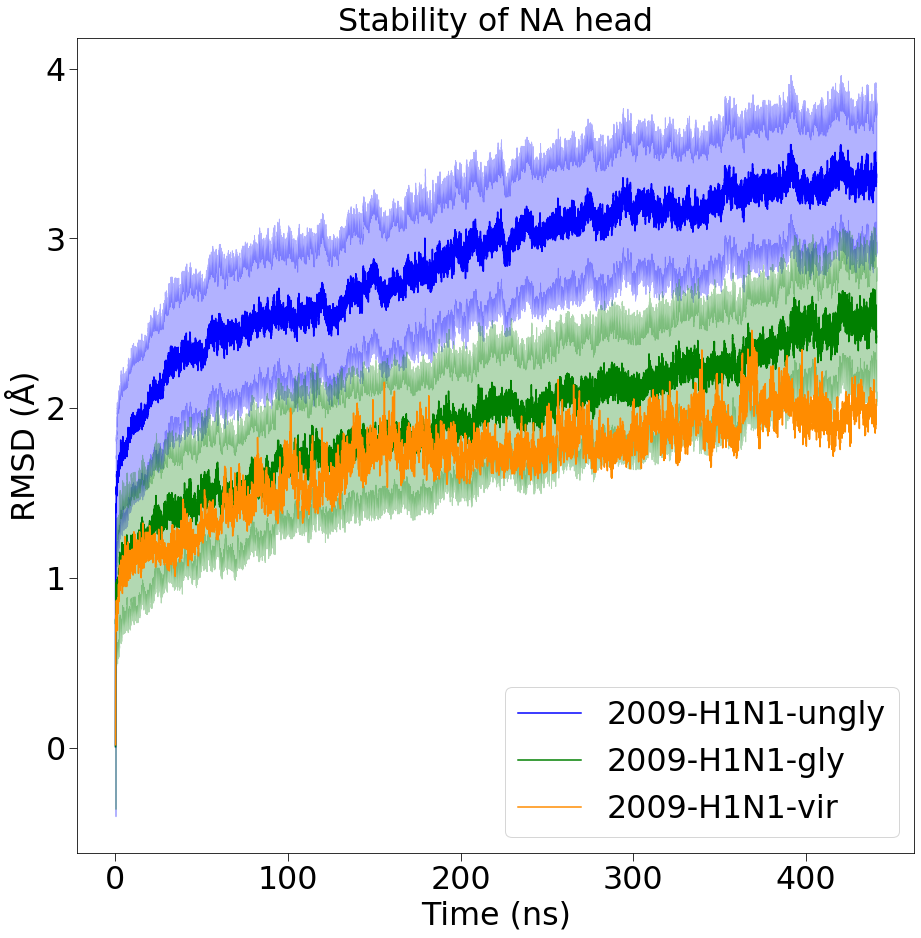

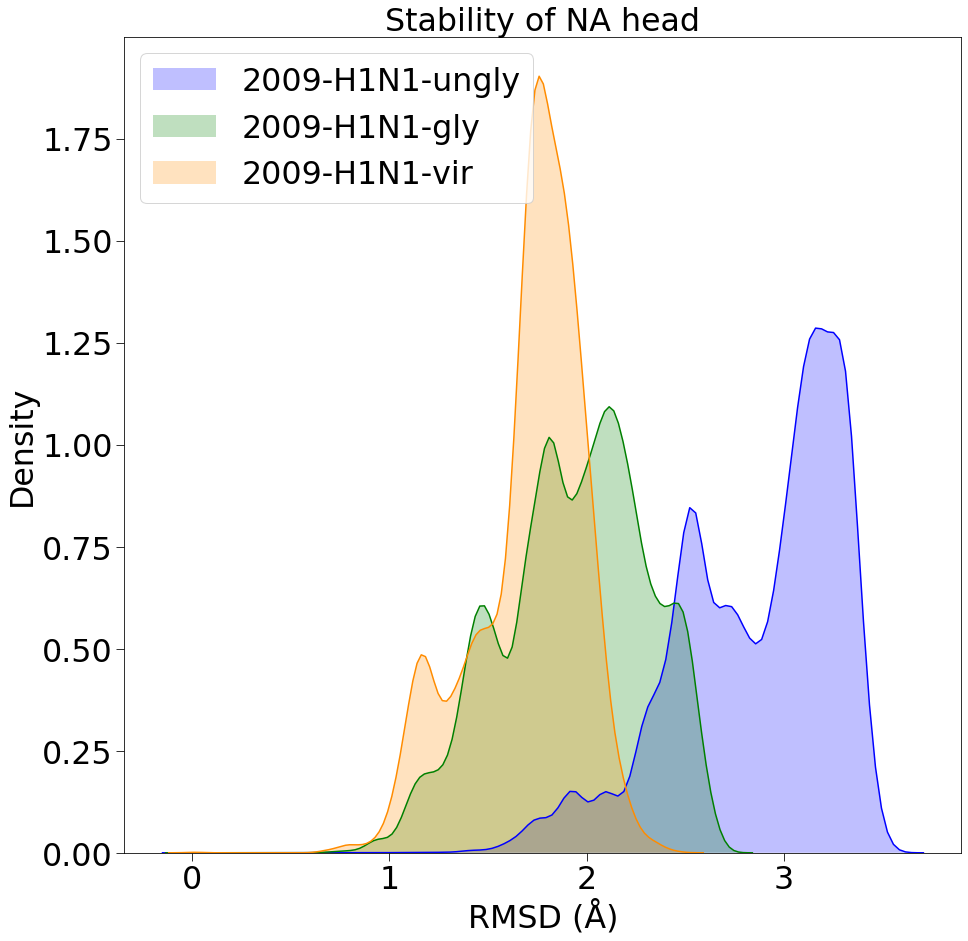

In [63]:
#plot the RMSD of the head in ns
x = np.arange(0, 440.98, 0.01)
arrayrmsdheadglycosylated = np.array([[rmsdheadglycosylated1], [rmsdheadglycosylated2], [rmsdheadglycosylated3]])
arrayrmsdheadunglycosylated = np.array([[rmsdheadunglycosylated1], [rmsdheadunglycosylated2], [rmsdheadunglycosylated3]])
meanrmsdheadglycosylated = np.mean(arrayrmsdheadglycosylated, axis=0)
meanrmsdheadunglycosylated = np.mean(arrayrmsdheadunglycosylated, axis=0)
meanrmsdheadglycosylated = np.reshape(meanrmsdheadglycosylated, (-1, 1))
meanrmsdheadunglycosylated = np.reshape(meanrmsdheadunglycosylated, (-1, 1))
stdrmsdheadglycosylated = np.std(meanrmsdheadglycosylated, axis=0)
stdplusrmsdheadglycosylated = meanrmsdheadglycosylated + stdrmsdheadglycosylated
stdplusrmsdheadglycosylated = stdplusrmsdheadglycosylated.flatten()
stdminusrmsdheadglycosylated = meanrmsdheadglycosylated - stdrmsdheadglycosylated
stdminusrmsdheadglycosylated = stdminusrmsdheadglycosylated.flatten()
stdrmsdheadunglycosylated = np.std(meanrmsdheadunglycosylated, axis=0)
stdplusrmsdheadunglycosylated = meanrmsdheadunglycosylated + stdrmsdheadunglycosylated
stdplusrmsdheadunglycosylated = stdplusrmsdheadunglycosylated.flatten()
stdminusrmsdheadunglycosylated = meanrmsdheadunglycosylated - stdrmsdheadunglycosylated
stdminusrmsdheadunglycosylated = stdminusrmsdheadunglycosylated.flatten()
plt.figure()
plt.plot(alignmentheadglycosylated1.time*0.01, meanrmsdheadunglycosylated*10, color='blue')
plt.fill_between(x, stdplusrmsdheadunglycosylated*10, stdminusrmsdheadunglycosylated*10, color='blue', alpha=0.3)
plt.plot(alignmentheadglycosylated1.time*0.01, meanrmsdheadglycosylated*10, color='green')
plt.fill_between(x, stdplusrmsdheadglycosylated*10, stdminusrmsdheadglycosylated*10, color='green', alpha=0.3)
plt.plot(alignmentheadvirion.time*0.06, rmsdheadvirion*10, color='darkorange')
plt.legend(['2009-H1N1-ungly', '2009-H1N1-gly', '2009-H1N1-vir'], loc='lower right')
plt.xlabel('Time (ns)')
plt.ylabel('RMSD (Å)')
plt.title('Stability of NA head')
plt.savefig('analysis_rmsd/averaged head a-carbon comparison.png')
plt.show()

meanrmsdheadunglycosylatedflattened = meanrmsdheadunglycosylated.flatten()
meanrmsdheadglycosylatedflattened = meanrmsdheadglycosylated.flatten()
rmsdheadvirionflattened = rmsdheadvirion.flatten()
sns.kdeplot(meanrmsdheadunglycosylatedflattened*10, color='blue', shade=True)
sns.kdeplot(meanrmsdheadglycosylatedflattened*10, color='green', shade=True)
sns.kdeplot(rmsdheadvirionflattened*10, color='darkorange', shade=True)
plt.legend(['2009-H1N1-ungly', '2009-H1N1-gly', '2009-H1N1-vir'], loc='upper left')
plt.xlabel('RMSD (Å)')
plt.ylabel('Density')
plt.title('Stability of NA head')
plt.savefig('analysis_rmsd/averaged head a-carbon comparison density.png')
plt.show()

#plt.plot(alignmentheadglycosylated1.time*0.01, rmsdheadglycosylated1*10, color='skyblue')
#plt.plot(alignmentheadglycosylated1.time*0.01, rmsdheadglycosylated2*10, color='yellow')
#plt.plot(alignmentheadglycosylated1.time*0.01, rmsdheadglycosylated3*10, color='turquoise')
#plt.plot(alignmentheadglycosylated1.time*0.01, rmsdheadunglycosylated1*10, color='black')
#plt.plot(alignmentheadglycosylated1.time*0.01, rmsdheadunglycosylated2*10, color='maroon')
#plt.plot(alignmentheadglycosylated1.time*0.01, rmsdheadunglycosylated3*10, color='navy')
#plt.plot(alignmentheadvirion.time*0.06, rmsdheadvirion*10, color='darkorange')
#plt.xlabel('t in [ns]')
#plt.ylabel('RMSD in [Å]')
#plt.legend(['glycosylated rep1', 'glycosylated rep2', 'glycosylated rep3', 'unglycosylated rep1', 'unglycosylated rep2', 'unglycosylated rep3', 'virion'], loc='lower right')
#plt.title('α-carbon head RMSD')
#plt.savefig('analysis_rmsd/head rmsd comparison by replicate.png')
#plt.show()

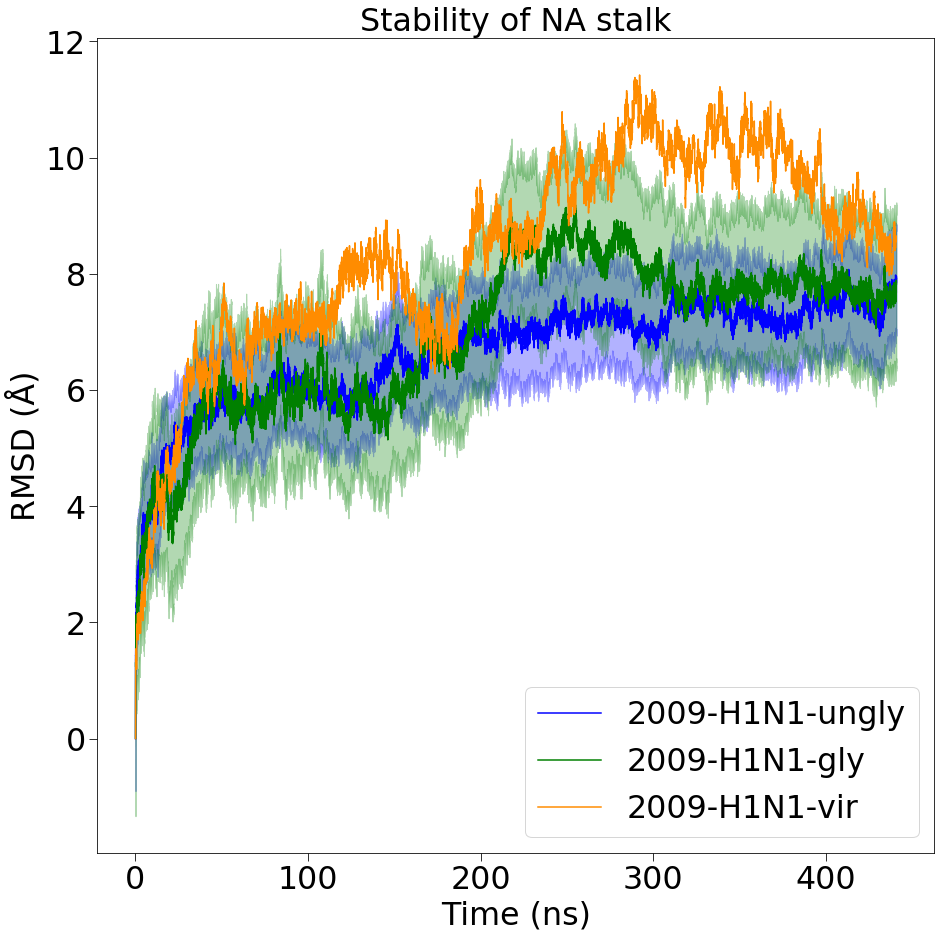

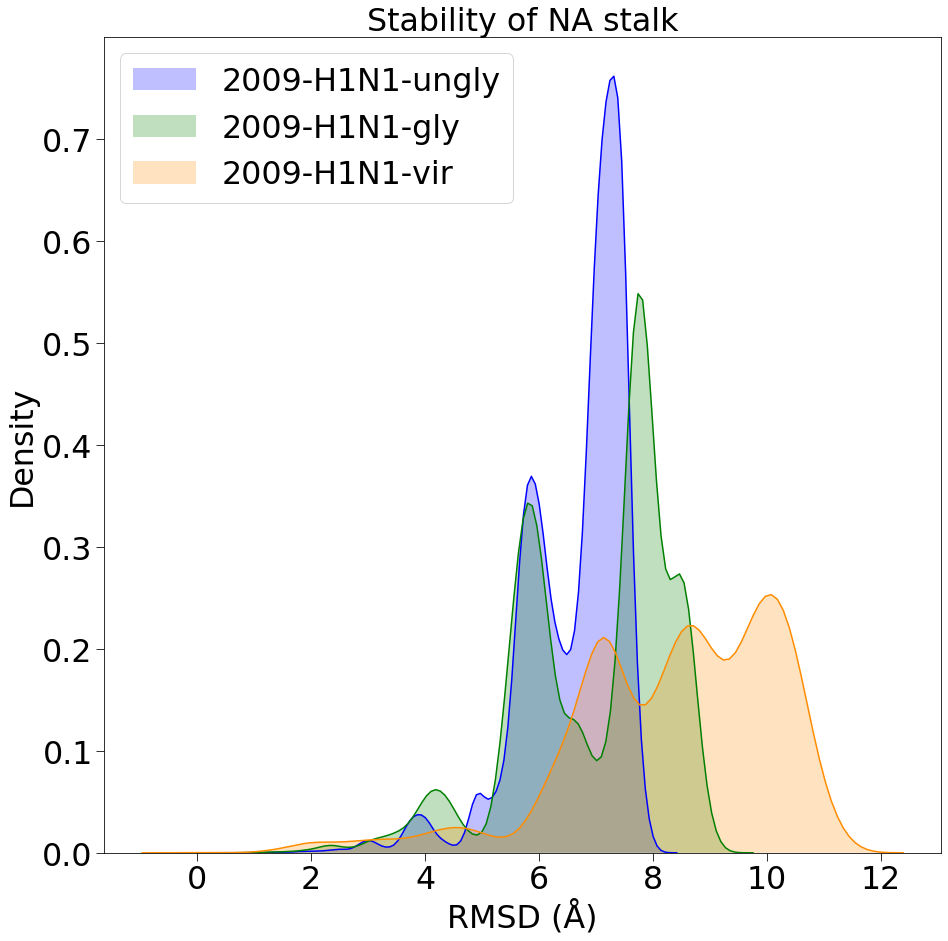

In [66]:
#plot the RMSD of the stalk in ns
arrayrmsdstalkglycosylated = np.array([[rmsdstalkglycosylated1], [rmsdstalkglycosylated2], [rmsdstalkglycosylated3]])
arrayrmsdstalkunglycosylated = np.array([[rmsdstalkunglycosylated1], [rmsdstalkunglycosylated2], [rmsdstalkunglycosylated3]])
meanrmsdstalkglycosylated = np.mean(arrayrmsdstalkglycosylated, axis=0)
meanrmsdstalkunglycosylated = np.mean(arrayrmsdstalkunglycosylated, axis=0)
meanrmsdstalkglycosylated = np.reshape(meanrmsdstalkglycosylated, (-1, 1))
meanrmsdstalkunglycosylated = np.reshape(meanrmsdstalkunglycosylated, (-1, 1))
stdrmsdstalkglycosylated = np.std(meanrmsdstalkglycosylated, axis=0)
stdplusrmsdstalkglycosylated = meanrmsdstalkglycosylated + stdrmsdstalkglycosylated
stdplusrmsdstalkglycosylated = stdplusrmsdstalkglycosylated.flatten()
stdminusrmsdstalkglycosylated = meanrmsdstalkglycosylated - stdrmsdstalkglycosylated
stdminusrmsdstalkglycosylated = stdminusrmsdstalkglycosylated.flatten()
stdrmsdstalkunglycosylated = np.std(meanrmsdstalkunglycosylated, axis=0)
stdplusrmsdstalkunglycosylated = meanrmsdstalkunglycosylated + stdrmsdstalkunglycosylated
stdplusrmsdstalkunglycosylated = stdplusrmsdstalkunglycosylated.flatten()
stdminusrmsdstalkunglycosylated = meanrmsdstalkunglycosylated - stdrmsdstalkunglycosylated
stdminusrmsdstalkunglycosylated = stdminusrmsdstalkunglycosylated.flatten()
plt.figure()
plt.plot(alignmentstalkglycosylated1.time*0.01, meanrmsdstalkunglycosylated*10, color='blue')
plt.fill_between(x, stdplusrmsdstalkunglycosylated*10, stdminusrmsdstalkunglycosylated*10, color='blue', alpha=0.3)
plt.plot(alignmentstalkglycosylated1.time*0.01, meanrmsdstalkglycosylated*10, color='green')
plt.fill_between(x, stdplusrmsdstalkglycosylated*10, stdminusrmsdstalkglycosylated*10, color='green', alpha=0.3)
plt.plot(alignmentstalkvirion.time*0.06, rmsdstalkvirion*10, color='darkorange')
plt.legend(['2009-H1N1-ungly', '2009-H1N1-gly', '2009-H1N1-vir'], loc='lower right')
plt.xlabel('Time (ns)')
plt.ylabel('RMSD (Å)')
plt.title('Stability of NA stalk')
plt.savefig('analysis_rmsd/averaged stalk a-carbon comparison.png')
plt.show()

meanrmsdstalkunglycosylatedflattened = meanrmsdstalkunglycosylated.flatten()
meanrmsdstalkglycosylatedflattened = meanrmsdstalkglycosylated.flatten()
rmsdstalkvirionflattened = rmsdstalkvirion.flatten()
sns.kdeplot(meanrmsdstalkunglycosylatedflattened*10, color='blue', shade=True)
sns.kdeplot(meanrmsdstalkglycosylatedflattened*10, color='green', shade=True)
sns.kdeplot(rmsdstalkvirionflattened*10, color='darkorange', shade=True)
plt.legend(['2009-H1N1-ungly', '2009-H1N1-gly', '2009-H1N1-vir'], loc='upper left')
plt.xlabel('RMSD (Å)')
plt.ylabel('Density')
plt.title('Stability of NA stalk')
plt.savefig('analysis_rmsd/averaged stalk a-carbon comparison density.png')
plt.show()

#plt.plot(alignmentstalkglycosylated1.time*0.01, rmsdstalkglycosylated1*10, color='skyblue')
#plt.plot(alignmentstalkglycosylated1.time*0.01, rmsdstalkglycosylated2*10, color='yellow')
#plt.plot(alignmentstalkglycosylated1.time*0.01, rmsdstalkglycosylated3*10, color='turquoise')
#plt.plot(alignmentstalkglycosylated1.time*0.01, rmsdstalkunglycosylated1*10, color='black')
#plt.plot(alignmentstalkglycosylated1.time*0.01, rmsdstalkunglycosylated2*10, color='maroon')
#plt.plot(alignmentstalkglycosylated1.time*0.01, rmsdstalkunglycosylated3*10, color='navy')
#plt.plot(alignmentstalkvirion.time*0.06, rmsdstalkvirion*10, color='darkorange')
#plt.xlabel('t in [ns]')
#plt.ylabel('RMSD in [Å]')
#plt.legend(['glycosylated rep1', 'glycosylated rep2', 'glycosylated rep3', 'unglycosylated rep1', 'unglycosylated rep2', 'unglycosylated rep3', 'virion'], loc='upper left')
#plt.title('α-carbon stalk RMSD')
#plt.savefig('analysis_rmsd/stalk rmsd comparison by replicate.png')
#plt.show()

# RMSF section

In [2]:
#load in the rmsf data
rmsfacarbonsglycosylated1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_acarbons.dat')
rmsfacarbonsglycosylated2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_rmsf_acarbons.dat')
rmsfacarbonsglycosylated3 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_rmsf_acarbons.dat')
rmsfacarbonsunglycosylated1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_acarbons.dat')
rmsfacarbonsunglycosylated2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_acarbons.dat')
rmsfacarbonsunglycosylated3 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_rmsf_acarbons.dat')
rmsfheadglycosylated1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_head.dat')
rmsfheadglycosylated2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_rmsf_head.dat')
rmsfheadglycosylated3 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_rmsf_head.dat')
rmsfheadunglycosylated1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_head.dat')
rmsfheadunglycosylated2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_head.dat')
rmsfheadunglycosylated3 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_rmsf_head.dat')
rmsfheadallglycosylated1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_all_head.dat')
rmsfheadallglycosylated2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_rmsf_all_head.dat')
rmsfheadallglycosylated3 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_rmsf_all_head.dat')
rmsfheadallunglycosylated1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_all_head.dat')
rmsfheadallunglycosylated2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_all_head.dat')
rmsfheadallunglycosylated3 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_rmsf_all_head.dat')
rmsfstalkglycosylated1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_stalk.dat')
rmsfstalkglycosylated2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_rmsf_stalk.dat')
rmsfstalkglycosylated3 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_rmsf_stalk.dat')
rmsfstalkunglycosylated1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_stalk.dat')
rmsfstalkunglycosylated2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_stalk.dat')
rmsfstalkunglycosylated3 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_rmsf_stalk.dat')
rmsfallglycosylated1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_all.dat')
rmsfallglycosylated2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_rmsf_all.dat')
rmsfallglycosylated3 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_rmsf_all.dat')
rmsfallunglycosylated1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_all.dat')
rmsfallunglycosylated2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_all.dat')
rmsfallunglycosylated3 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_rmsf_all.dat')
rmsfheadglycosylatedA1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_head_A.dat')
rmsfheadglycosylatedA2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_rmsf_head_A.dat')
rmsfheadglycosylatedA3 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_rmsf_head_A.dat')
rmsfheadunglycosylatedA1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_head_A.dat')
rmsfheadunglycosylatedA2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_head_A.dat')
rmsfheadunglycosylatedA3 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_rmsf_head_A.dat')
rmsfheadglycosylatedB1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_head_B.dat')
rmsfheadglycosylatedB2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_rmsf_head_B.dat')
rmsfheadglycosylatedB3 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_rmsf_head_B.dat')
rmsfheadunglycosylatedB1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_head_B.dat')
rmsfheadunglycosylatedB2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_head_B.dat')
rmsfheadunglycosylatedB3 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_rmsf_head_B.dat')
rmsfheadglycosylatedC1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_head_C.dat')
rmsfheadglycosylatedC2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_rmsf_head_C.dat')
rmsfheadglycosylatedC3 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_rmsf_head_C.dat')
rmsfheadunglycosylatedC1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_head_C.dat')
rmsfheadunglycosylatedC2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_head_C.dat')
rmsfheadunglycosylatedC3 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_rmsf_head_C.dat')
rmsfheadglycosylatedD1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_head_D.dat')
rmsfheadglycosylatedD2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_rmsf_head_D.dat')
rmsfheadglycosylatedD3 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_rmsf_head_D.dat')
rmsfheadunglycosylatedD1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_head_D.dat')
rmsfheadunglycosylatedD2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_head_D.dat')
rmsfheadunglycosylatedD3 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_rmsf_head_D.dat')
rmsfstalkglycosylatedA1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_stalk_A.dat')
rmsfstalkglycosylatedA2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_rmsf_stalk_A.dat')
rmsfstalkglycosylatedA3 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_rmsf_stalk_A.dat')
rmsfstalkunglycosylatedA1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_stalk_A.dat')
rmsfstalkunglycosylatedA2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_stalk_A.dat')
rmsfstalkunglycosylatedA3 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_rmsf_stalk_A.dat')
rmsfstalkglycosylatedB1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_stalk_B.dat')
rmsfstalkglycosylatedB2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_rmsf_stalk_B.dat')
rmsfstalkglycosylatedB3 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_rmsf_stalk_B.dat')
rmsfstalkunglycosylatedB1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_stalk_B.dat')
rmsfstalkunglycosylatedB2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_stalk_B.dat')
rmsfstalkunglycosylatedB3 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_rmsf_stalk_B.dat')
rmsfstalkglycosylatedC1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_stalk_C.dat')
rmsfstalkglycosylatedC2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_rmsf_stalk_C.dat')
rmsfstalkglycosylatedC3 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_rmsf_stalk_C.dat')
rmsfstalkunglycosylatedC1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_stalk_C.dat')
rmsfstalkunglycosylatedC2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_stalk_C.dat')
rmsfstalkunglycosylatedC3 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_rmsf_stalk_C.dat')
rmsfstalkglycosylatedD1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_stalk_D.dat')
rmsfstalkglycosylatedD2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_rmsf_stalk_D.dat')
rmsfstalkglycosylatedD3 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_rmsf_stalk_D.dat')
rmsfstalkunglycosylatedD1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_stalk_D.dat')
rmsfstalkunglycosylatedD2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_stalk_D.dat')
rmsfstalkunglycosylatedD3 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_rmsf_stalk_D.dat')
rmsfacarbonsvirion = np.loadtxt('whole_virion/rmsf_rmsf_acarbons.dat')
rmsfheadvirion = np.loadtxt('whole_virion/rmsf_rmsf_head.dat')
rmsfheadvirionA = np.loadtxt('whole_virion/rmsf_rmsf_head_A.dat')
rmsfheadvirionB = np.loadtxt('whole_virion/rmsf_rmsf_head_B.dat')
rmsfheadvirionC = np.loadtxt('whole_virion/rmsf_rmsf_head_C.dat')
rmsfheadvirionD = np.loadtxt('whole_virion/rmsf_rmsf_head_D.dat')
rmsfstalkvirion = np.loadtxt('whole_virion/rmsf_rmsf_stalk.dat')
rmsfstalkvirionA = np.loadtxt('whole_virion/rmsf_rmsf_stalk_A.dat')
rmsfstalkvirionB = np.loadtxt('whole_virion/rmsf_rmsf_stalk_B.dat')
rmsfstalkvirionC = np.loadtxt('whole_virion/rmsf_rmsf_stalk_C.dat')
rmsfstalkvirionD = np.loadtxt('whole_virion/rmsf_rmsf_stalk_D.dat')
rmsfglycanwithin5VA1 = np.loadtxt('whole_virion/rmsf_rmsf_within5A1.dat')
rmsfglycanwithin5VB4 = np.loadtxt('whole_virion/rmsf_rmsf_within5B4.dat')
rmsfglycanwithin5VC1 = np.loadtxt('whole_virion/rmsf_rmsf_within5C1.dat')
rmsfglycanwithin5VD2 = np.loadtxt('whole_virion/rmsf_rmsf_within5D2.dat')
rmsfglycanwithin5V = np.loadtxt('whole_virion/rmsf_rmsf_within5.dat')
rmsfglycanwithin10VA1 = np.loadtxt('whole_virion/rmsf_rmsf_within10A1.dat')
rmsfglycanwithin10VB4 = np.loadtxt('whole_virion/rmsf_rmsf_within10B4.dat')
rmsfglycanwithin10VC1 = np.loadtxt('whole_virion/rmsf_rmsf_within10C1.dat')
rmsfglycanwithin10VD2 = np.loadtxt('whole_virion/rmsf_rmsf_within10D2.dat')
rmsfglycanwithin10V = np.loadtxt('whole_virion/rmsf_rmsf_within10.dat')
rmsfglycanwithin15VA1 = np.loadtxt('whole_virion/rmsf_rmsf_within15A1.dat')
rmsfglycanwithin15VB4 = np.loadtxt('whole_virion/rmsf_rmsf_within15B4.dat')
rmsfglycanwithin15VC1 = np.loadtxt('whole_virion/rmsf_rmsf_within15C1.dat')
rmsfglycanwithin15VD2 = np.loadtxt('whole_virion/rmsf_rmsf_within15D2.dat')
rmsfglycanwithin15V = np.loadtxt('whole_virion/rmsf_rmsf_within15.dat')
rmsfglycanwithin20VA1 = np.loadtxt('whole_virion/rmsf_rmsf_within20A1.dat')
rmsfglycanwithin20VB4 = np.loadtxt('whole_virion/rmsf_rmsf_within20B4.dat')
rmsfglycanwithin20VC1 = np.loadtxt('whole_virion/rmsf_rmsf_within20C1.dat')
rmsfglycanwithin20VD2 = np.loadtxt('whole_virion/rmsf_rmsf_within20D2.dat')
rmsfglycanwithin20V = np.loadtxt('whole_virion/rmsf_rmsf_within20.dat')
rmsfglycanwithin25VA1 = np.loadtxt('whole_virion/rmsf_rmsf_within25A1.dat')
rmsfglycanwithin25VB4 = np.loadtxt('whole_virion/rmsf_rmsf_within25B4.dat')
rmsfglycanwithin25VC1 = np.loadtxt('whole_virion/rmsf_rmsf_within25C1.dat')
rmsfglycanwithin25VD2 = np.loadtxt('whole_virion/rmsf_rmsf_within25D2.dat')
rmsfglycanwithin30VA1 = np.loadtxt('whole_virion/rmsf_rmsf_within30A1.dat')
rmsfglycanwithin30VB4 = np.loadtxt('whole_virion/rmsf_rmsf_within30B4.dat')
rmsfglycanwithin30VC1 = np.loadtxt('whole_virion/rmsf_rmsf_within30C1.dat')
rmsfglycanwithin30VD2 = np.loadtxt('whole_virion/rmsf_rmsf_within30D2.dat')
rmsfglycanwithin5G1A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within5A1.dat')
rmsfglycanwithin5G1B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within5B4.dat')
rmsfglycanwithin5G1C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within5C1.dat')
rmsfglycanwithin5G1D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within5D2.dat')
rmsfglycanwithin5G1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within5.dat')
rmsfglycanwithin10G1A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within10A1.dat')
rmsfglycanwithin10G1B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within10B4.dat')
rmsfglycanwithin10G1C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within10C1.dat')
rmsfglycanwithin10G1D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within10D2.dat')
rmsfglycanwithin10G1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within10.dat')
rmsfglycanwithin15G1A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within15A1.dat')
rmsfglycanwithin15G1B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within15B4.dat')
rmsfglycanwithin15G1C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within15C1.dat')
rmsfglycanwithin15G1D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within15D2.dat')
rmsfglycanwithin15G1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within15.dat')
rmsfglycanwithin20G1A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within20A1.dat')
rmsfglycanwithin20G1B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within20B4.dat')
rmsfglycanwithin20G1C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within20C1.dat')
rmsfglycanwithin20G1D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within20D2.dat')
rmsfglycanwithin20G1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within20.dat')
rmsfglycanwithin25G1A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within25A1.dat')
rmsfglycanwithin25G1B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within25B4.dat')
rmsfglycanwithin25G1C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within25C1.dat')
rmsfglycanwithin25G1D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within25D2.dat')
rmsfglycanwithin30G1A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within30A1.dat')
rmsfglycanwithin30G1B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within30B4.dat')
rmsfglycanwithin30G1C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within30C1.dat')
rmsfglycanwithin30G1D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within30D2.dat')
rmsfglycanwithin5G2A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within5A1.dat')
rmsfglycanwithin5G2B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within5B4.dat')
rmsfglycanwithin5G2C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within5C1.dat')
rmsfglycanwithin5G2D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within5D2.dat')
rmsfglycanwithin5G2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within5.dat')
rmsfglycanwithin10G2A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within10A1.dat')
rmsfglycanwithin10G2B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within10B4.dat')
rmsfglycanwithin10G2C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within10C1.dat')
rmsfglycanwithin10G2D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within10D2.dat')
rmsfglycanwithin10G2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within10.dat')
rmsfglycanwithin15G2A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within15A1.dat')
rmsfglycanwithin15G2B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within15B4.dat')
rmsfglycanwithin15G2C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within15C1.dat')
rmsfglycanwithin15G2D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within15D2.dat')
rmsfglycanwithin15G2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within15.dat')
rmsfglycanwithin20G2A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within20A1.dat')
rmsfglycanwithin20G2B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within20B4.dat')
rmsfglycanwithin20G2C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within20C1.dat')
rmsfglycanwithin20G2D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within20D2.dat')
rmsfglycanwithin20G2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within20.dat')
rmsfglycanwithin25G2A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within25A1.dat')
rmsfglycanwithin25G2B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within25B4.dat')
rmsfglycanwithin25G2C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within25C1.dat')
rmsfglycanwithin25G2D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within25D2.dat')
rmsfglycanwithin30G2A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within30A1.dat')
rmsfglycanwithin30G2B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within30B4.dat')
rmsfglycanwithin30G2C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within30C1.dat')
rmsfglycanwithin30G2D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within30D2.dat')
rmsfglycanwithin5G3A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within5A1.dat')
rmsfglycanwithin5G3B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within5B4.dat')
rmsfglycanwithin5G3C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within5C1.dat')
rmsfglycanwithin5G3D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within5D2.dat')
rmsfglycanwithin5G3 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within5.dat')
rmsfglycanwithin10G3A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within10A1.dat')
rmsfglycanwithin10G3B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within10B4.dat')
rmsfglycanwithin10G3C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within10C1.dat')
rmsfglycanwithin10G3D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within10D2.dat')
rmsfglycanwithin10G3 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within10.dat')
rmsfglycanwithin15G3A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within15A1.dat')
rmsfglycanwithin15G3B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within15B4.dat')
rmsfglycanwithin15G3C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within15C1.dat')
rmsfglycanwithin15G3D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within15D2.dat')
rmsfglycanwithin15G3 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within15.dat')
rmsfglycanwithin20G3A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within20A1.dat')
rmsfglycanwithin20G3B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within20B4.dat')
rmsfglycanwithin20G3C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within20C1.dat')
rmsfglycanwithin20G3D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within20D2.dat')
rmsfglycanwithin20G3 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within20.dat')
rmsfglycanwithin25G3A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within25A1.dat')
rmsfglycanwithin25G3B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within25B4.dat')
rmsfglycanwithin25G3C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within25C1.dat')
rmsfglycanwithin25G3D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within25D2.dat')
rmsfglycanwithin30G3A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within30A1.dat')
rmsfglycanwithin30G3B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within30B4.dat')
rmsfglycanwithin30G3C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within30C1.dat')
rmsfglycanwithin30G3D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_rmsf_within30D2.dat')
rmsfglycanwithin5U1A1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within5A1.dat')
rmsfglycanwithin5U1B4 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within5B4.dat')
rmsfglycanwithin5U1C1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within5C1.dat')
rmsfglycanwithin5U1D2 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within5D2.dat')
rmsfglycanwithin5U1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within5.dat')
rmsfglycanwithin10U1A1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within10A1.dat')
rmsfglycanwithin10U1B4 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within10B4.dat')
rmsfglycanwithin10U1C1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within10C1.dat')
rmsfglycanwithin10U1D2 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within10D2.dat')
rmsfglycanwithin10U1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within10.dat')
rmsfglycanwithin15U1A1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within15A1.dat')
rmsfglycanwithin15U1B4 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within15B4.dat')
rmsfglycanwithin15U1C1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within15C1.dat')
rmsfglycanwithin15U1D2 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within15D2.dat')
rmsfglycanwithin15U1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within15.dat')
rmsfglycanwithin20U1A1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within20A1.dat')
rmsfglycanwithin20U1B4 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within20B4.dat')
rmsfglycanwithin20U1C1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within20C1.dat')
rmsfglycanwithin20U1D2 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within20D2.dat')
rmsfglycanwithin25U1A1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within25A1.dat')
rmsfglycanwithin25U1B4 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within25B4.dat')
rmsfglycanwithin25U1C1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within25C1.dat')
rmsfglycanwithin25U1D2 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within25D2.dat')
rmsfglycanwithin30U1A1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within30A1.dat')
rmsfglycanwithin30U1B4 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within30B4.dat')
rmsfglycanwithin30U1C1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within30C1.dat')
rmsfglycanwithin30U1D2 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within30D2.dat')
rmsfglycanwithin20U1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within20.dat')
rmsfglycanwithin5U2A1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within5A1.dat')
rmsfglycanwithin5U2B4 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within5B4.dat')
rmsfglycanwithin5U2C1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within5C1.dat')
rmsfglycanwithin5U2D2 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within5D2.dat')
rmsfglycanwithin5U2 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_rmsf_within5.dat')
rmsfglycanwithin10U2A1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within10A1.dat')
rmsfglycanwithin10U2B4 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within10B4.dat')
rmsfglycanwithin10U2C1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within10C1.dat')
rmsfglycanwithin10U2D2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within10D2.dat')
rmsfglycanwithin10U2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within10.dat')
rmsfglycanwithin15U2A1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within15A1.dat')
rmsfglycanwithin15U2B4 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within15B4.dat')
rmsfglycanwithin15U2C1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within15C1.dat')
rmsfglycanwithin15U2D2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within15D2.dat')
rmsfglycanwithin15U2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within15.dat')
rmsfglycanwithin20U2A1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within20A1.dat')
rmsfglycanwithin20U2B4 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within20B4.dat')
rmsfglycanwithin20U2C1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within20C1.dat')
rmsfglycanwithin20U2D2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within20D2.dat')
rmsfglycanwithin20U2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within20.dat')
rmsfglycanwithin25U2A1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within25A1.dat')
rmsfglycanwithin25U2B4 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within25B4.dat')
rmsfglycanwithin25U2C1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within25C1.dat')
rmsfglycanwithin25U2D2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within25D2.dat')
rmsfglycanwithin30U2A1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within30A1.dat')
rmsfglycanwithin30U2B4 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within30B4.dat')
rmsfglycanwithin30U2C1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within30C1.dat')
rmsfglycanwithin30U2D2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within30D2.dat')
rmsfglycanwithin5U3A1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within5A1.dat')
rmsfglycanwithin5U3B4 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within5B4.dat')
rmsfglycanwithin5U3C1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within5C1.dat')
rmsfglycanwithin5U3D2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within5D2.dat')
rmsfglycanwithin5U3 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within5.dat')
rmsfglycanwithin10U3A1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within10A1.dat')
rmsfglycanwithin10U3B4 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within10B4.dat')
rmsfglycanwithin10U3C1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within10C1.dat')
rmsfglycanwithin10U3D2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within10D2.dat')
rmsfglycanwithin10U3 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within10.dat')
rmsfglycanwithin15U3A1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within15A1.dat')
rmsfglycanwithin15U3B4 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within15B4.dat')
rmsfglycanwithin15U3C1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within15C1.dat')
rmsfglycanwithin15U3D2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within15D2.dat')
rmsfglycanwithin15U3 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within15.dat')
rmsfglycanwithin20U3A1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within20A1.dat')
rmsfglycanwithin20U3B4 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within20B4.dat')
rmsfglycanwithin20U3C1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within20C1.dat')
rmsfglycanwithin20U3D2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within20D2.dat')
rmsfglycanwithin20U3 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within20.dat')
rmsfglycanwithin25U3A1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within25A1.dat')
rmsfglycanwithin25U3B4 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within25B4.dat')
rmsfglycanwithin25U3C1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within25C1.dat')
rmsfglycanwithin25U3D2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within25D2.dat')
rmsfglycanwithin30U3A1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within30A1.dat')
rmsfglycanwithin30U3B4 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within30B4.dat')
rmsfglycanwithin30U3C1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within30C1.dat')
rmsfglycanwithin30U3D2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_rmsf_within30D2.dat')

indexacarbonsglycosylated = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_acarbons.dat')
indexheadglycosylated = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_head.dat')
indexheadallglycosylated = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_all_head.dat')
indexstalkglycosylated = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_stalk.dat')
indexallglycosylated = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_all.dat')
indexheadglycosylatedA = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_head_A.dat')
indexheadglycosylatedB = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_head_B.dat')
indexheadglycosylatedC = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_head_C.dat')
indexheadglycosylatedD = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_head_D.dat')
indexacarbonsunglycosylated = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_acarbons.dat')
indexheadunglycosylated = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_head.dat')
indexheadallunglycosylated = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_all_head.dat')
indexstalkunglycosylated = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_stalk.dat')
indexallunglycosylated = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_all.dat')
indexheadunglycosylatedA = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_head_A.dat')
indexheadunglycosylatedB = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_head_B.dat')
indexheadunglycosylatedC = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_head_C.dat')
indexheadunglycosylatedD = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_head_D.dat')
indexacarbonsvirion = np.loadtxt('whole_virion/rmsf_index_acarbons.dat')
indexheadvirion = np.loadtxt('whole_virion/rmsf_index_head.dat')
indexheadvirionA = np.loadtxt('whole_virion/rmsf_index_head_A.dat')
indexheadvirionB = np.loadtxt('whole_virion/rmsf_index_head_B.dat')
indexheadvirionC = np.loadtxt('whole_virion/rmsf_index_head_C.dat')
indexheadvirionD = np.loadtxt('whole_virion/rmsf_index_head_D.dat')
indexstalkvirion = np.loadtxt('whole_virion/rmsf_index_stalk.dat')
indexstalkvirionA = np.loadtxt('whole_virion/rmsf_index_stalk_A.dat')
indexstalkvirionB = np.loadtxt('whole_virion/rmsf_index_stalk_B.dat')
indexstalkvirionC = np.loadtxt('whole_virion/rmsf_index_stalk_C.dat')
indexstalkvirionD = np.loadtxt('whole_virion/rmsf_index_stalk_D.dat')
indexglycanwithin5VA1 = np.loadtxt('whole_virion/rmsf_index_within5A1.dat')
indexglycanwithin5VB4 = np.loadtxt('whole_virion/rmsf_index_within5B4.dat')
indexglycanwithin5VC1 = np.loadtxt('whole_virion/rmsf_index_within5C1.dat')
indexglycanwithin5VD2 = np.loadtxt('whole_virion/rmsf_index_within5D2.dat')
indexglycanwithin5V = np.loadtxt('whole_virion/rmsf_index_within5.dat')
indexglycanwithin10VA1 = np.loadtxt('whole_virion/rmsf_index_within10A1.dat')
indexglycanwithin10VB4 = np.loadtxt('whole_virion/rmsf_index_within10B4.dat')
indexglycanwithin10VC1 = np.loadtxt('whole_virion/rmsf_index_within10C1.dat')
indexglycanwithin10VD2 = np.loadtxt('whole_virion/rmsf_index_within10D2.dat')
indexglycanwithin10V = np.loadtxt('whole_virion/rmsf_index_within10.dat')
indexglycanwithin15VA1 = np.loadtxt('whole_virion/rmsf_index_within15A1.dat')
indexglycanwithin15VB4 = np.loadtxt('whole_virion/rmsf_index_within15B4.dat')
indexglycanwithin15VC1 = np.loadtxt('whole_virion/rmsf_index_within15C1.dat')
indexglycanwithin15VD2 = np.loadtxt('whole_virion/rmsf_index_within15D2.dat')
indexglycanwithin15V = np.loadtxt('whole_virion/rmsf_index_within15.dat')
indexglycanwithin20VA1 = np.loadtxt('whole_virion/rmsf_index_within20A1.dat')
indexglycanwithin20VB4 = np.loadtxt('whole_virion/rmsf_index_within20B4.dat')
indexglycanwithin20VC1 = np.loadtxt('whole_virion/rmsf_index_within20C1.dat')
indexglycanwithin20VD2 = np.loadtxt('whole_virion/rmsf_index_within20D2.dat')
indexglycanwithin20V = np.loadtxt('whole_virion/rmsf_index_within20.dat')
indexglycanwithin25VA1 = np.loadtxt('whole_virion/rmsf_index_within25A1.dat')
indexglycanwithin25VB4 = np.loadtxt('whole_virion/rmsf_index_within25B4.dat')
indexglycanwithin25VC1 = np.loadtxt('whole_virion/rmsf_index_within25C1.dat')
indexglycanwithin25VD2 = np.loadtxt('whole_virion/rmsf_index_within25D2.dat')
indexglycanwithin30VA1 = np.loadtxt('whole_virion/rmsf_index_within30A1.dat')
indexglycanwithin30VB4 = np.loadtxt('whole_virion/rmsf_index_within30B4.dat')
indexglycanwithin30VC1 = np.loadtxt('whole_virion/rmsf_index_within30C1.dat')
indexglycanwithin30VD2 = np.loadtxt('whole_virion/rmsf_index_within30D2.dat')
indexglycanwithin5G1A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within5A1.dat')
indexglycanwithin5G1B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within5B4.dat')
indexglycanwithin5G1C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within5C1.dat')
indexglycanwithin5G1D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within5D2.dat')
indexglycanwithin5G1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within5.dat')
indexglycanwithin10G1A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within10A1.dat')
indexglycanwithin10G1B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within10B4.dat')
indexglycanwithin10G1C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within10C1.dat')
indexglycanwithin10G1D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within10D2.dat')
indexglycanwithin10G1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within10.dat')
indexglycanwithin15G1A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within15A1.dat')
indexglycanwithin15G1B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within15B4.dat')
indexglycanwithin15G1C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within15C1.dat')
indexglycanwithin15G1D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within15D2.dat')
indexglycanwithin15G1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within15.dat')
indexglycanwithin20G1A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within20A1.dat')
indexglycanwithin20G1B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within20B4.dat')
indexglycanwithin20G1C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within20C1.dat')
indexglycanwithin20G1D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within20D2.dat')
indexglycanwithin20G1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within20.dat')
indexglycanwithin25G1A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within25A1.dat')
indexglycanwithin25G1B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within25B4.dat')
indexglycanwithin25G1C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within25C1.dat')
indexglycanwithin25G1D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within25D2.dat')
indexglycanwithin30G1A1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within30A1.dat')
indexglycanwithin30G1B4 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within30B4.dat')
indexglycanwithin30G1C1 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within30C1.dat')
indexglycanwithin30G1D2 = np.loadtxt('partial_glycosylation/trajectories/replicate1/no_lipids/rmsf_index_within30D2.dat')
indexglycanwithin5G2A1 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within5A1.dat')
indexglycanwithin5G2B4 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within5B4.dat')
indexglycanwithin5G2C1 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within5C1.dat')
indexglycanwithin5G2D2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within5D2.dat')
indexglycanwithin5G2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within5.dat')
indexglycanwithin10G2A1 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within10A1.dat')
indexglycanwithin10G2B4 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within10B4.dat')
indexglycanwithin10G2C1 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within10C1.dat')
indexglycanwithin10G2D2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within10D2.dat')
indexglycanwithin10G2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within10.dat')
indexglycanwithin15G2A1 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within15A1.dat')
indexglycanwithin15G2B4 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within15B4.dat')
indexglycanwithin15G2C1 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within15C1.dat')
indexglycanwithin15G2D2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within15D2.dat')
indexglycanwithin15G2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within15.dat')
indexglycanwithin20G2A1 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within20A1.dat')
indexglycanwithin20G2B4 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within20B4.dat')
indexglycanwithin20G2C1 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within20C1.dat')
indexglycanwithin20G2D2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within20D2.dat')
indexglycanwithin20G2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within20.dat')
indexglycanwithin25G2A1 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within25A1.dat')
indexglycanwithin25G2B4 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within25B4.dat')
indexglycanwithin25G2C1 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within25C1.dat')
indexglycanwithin25G2D2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within25D2.dat')
indexglycanwithin30G2A1 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within30A1.dat')
indexglycanwithin30G2B4 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within30B4.dat')
indexglycanwithin30G2C1 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within30C1.dat')
indexglycanwithin30G2D2 = np.loadtxt('partial_glycosylation/trajectories/replicate2/no_lipids/rmsf_index_within30D2.dat')
indexglycanwithin5G3A1 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within5A1.dat')
indexglycanwithin5G3B4 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within5B4.dat')
indexglycanwithin5G3C1 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within5C1.dat')
indexglycanwithin5G3D2 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within5D2.dat')
indexglycanwithin5G3 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within5.dat')
indexglycanwithin10G3A1 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within10A1.dat')
indexglycanwithin10G3B4 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within10B4.dat')
indexglycanwithin10G3C1 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within10C1.dat')
indexglycanwithin10G3D2 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within10D2.dat')
indexglycanwithin10G3 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within10.dat')
indexglycanwithin15G3A1 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within15A1.dat')
indexglycanwithin15G3B4 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within15B4.dat')
indexglycanwithin15G3C1 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within15C1.dat')
indexglycanwithin15G3D2 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within15D2.dat')
indexglycanwithin15G3 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within15.dat')
indexglycanwithin20G3A1 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within20A1.dat')
indexglycanwithin20G3B4 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within20B4.dat')
indexglycanwithin20G3C1 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within20C1.dat')
indexglycanwithin20G3D2 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within20D2.dat')
indexglycanwithin20G3 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within20.dat')
indexglycanwithin25G3A1 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within25A1.dat')
indexglycanwithin25G3B4 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within25B4.dat')
indexglycanwithin25G3C1 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within25C1.dat')
indexglycanwithin25G3D2 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within25D2.dat')
indexglycanwithin30G3A1 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within30A1.dat')
indexglycanwithin30G3B4 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within30B4.dat')
indexglycanwithin30G3C1 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within30C1.dat')
indexglycanwithin30G3D2 = np.loadtxt('partial_glycosylation/trajectories/replicate3/no_lipids/rmsf_index_within30D2.dat')
indexglycanwithin5U1A1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within5A1.dat')
indexglycanwithin5U1B4 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within5B4.dat')
indexglycanwithin5U1C1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within5C1.dat')
indexglycanwithin5U1D2 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within5D2.dat')
indexglycanwithin5U1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within5.dat')
indexglycanwithin10U1A1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within10A1.dat')
indexglycanwithin10U1B4 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within10B4.dat')
indexglycanwithin10U1C1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within10C1.dat')
indexglycanwithin10U1D2 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within10D2.dat')
indexglycanwithin10U1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within10.dat')
indexglycanwithin15U1A1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within15A1.dat')
indexglycanwithin15U1B4 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within15B4.dat')
indexglycanwithin15U1C1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within15C1.dat')
indexglycanwithin15U1D2 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within15D2.dat')
indexglycanwithin15U1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within15.dat')
indexglycanwithin20U1A1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within20A1.dat')
indexglycanwithin20U1B4 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within20B4.dat')
indexglycanwithin20U1C1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within20C1.dat')
indexglycanwithin20U1D2 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within20D2.dat')
indexglycanwithin20U1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within20.dat')
indexglycanwithin25U1A1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within25A1.dat')
indexglycanwithin25U1B4 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within25B4.dat')
indexglycanwithin25U1C1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within25C1.dat')
indexglycanwithin25U1D2 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within25D2.dat')
indexglycanwithin30U1A1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within30A1.dat')
indexglycanwithin30U1B4 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within30B4.dat')
indexglycanwithin30U1C1 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within30C1.dat')
indexglycanwithin30U1D2 = np.loadtxt('no_glycosylation/replicate1/no_lipids/rmsf_index_within30D2.dat')
indexglycanwithin5U2A1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within5A1.dat')
indexglycanwithin5U2B4 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within5B4.dat')
indexglycanwithin5U2C1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within5C1.dat')
indexglycanwithin5U2D2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within5D2.dat')
indexglycanwithin5U2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within5.dat')
indexglycanwithin10U2A1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within10A1.dat')
indexglycanwithin10U2B4 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within10B4.dat')
indexglycanwithin10U2C1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within10C1.dat')
indexglycanwithin10U2D2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within10D2.dat')
indexglycanwithin10U2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within10.dat')
indexglycanwithin15U2A1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within15A1.dat')
indexglycanwithin15U2B4 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within15B4.dat')
indexglycanwithin15U2C1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within15C1.dat')
indexglycanwithin15U2D2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within15D2.dat')
indexglycanwithin15U2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within15.dat')
indexglycanwithin20U2A1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within20A1.dat')
indexglycanwithin20U2B4 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within20B4.dat')
indexglycanwithin20U2C1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within20C1.dat')
indexglycanwithin20U2D2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within20D2.dat')
indexglycanwithin20U2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within20.dat')
indexglycanwithin25U2A1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within25A1.dat')
indexglycanwithin25U2B4 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within25B4.dat')
indexglycanwithin25U2C1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within25C1.dat')
indexglycanwithin25U2D2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within25D2.dat')
indexglycanwithin30U2A1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within30A1.dat')
indexglycanwithin30U2B4 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within30B4.dat')
indexglycanwithin30U2C1 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within30C1.dat')
indexglycanwithin30U2D2 = np.loadtxt('no_glycosylation/replicate2/no_lipids/rmsf_index_within30D2.dat')
indexglycanwithin5U3A1 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within5A1.dat')
indexglycanwithin5U3B4 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within5B4.dat')
indexglycanwithin5U3C1 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within5C1.dat')
indexglycanwithin5U3D2 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within5D2.dat')
indexglycanwithin5U3 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within5.dat')
indexglycanwithin10U3A1 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within10A1.dat')
indexglycanwithin10U3B4 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within10B4.dat')
indexglycanwithin10U3C1 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within10C1.dat')
indexglycanwithin10U3D2 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within10D2.dat')
indexglycanwithin10U3 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within10.dat')
indexglycanwithin15U3A1 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within15A1.dat')
indexglycanwithin15U3B4 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within15B4.dat')
indexglycanwithin15U3C1 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within15C1.dat')
indexglycanwithin15U3D2 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within15D2.dat')
indexglycanwithin15U3 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within15.dat')
indexglycanwithin20U3A1 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within20A1.dat')
indexglycanwithin20U3B4 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within20B4.dat')
indexglycanwithin20U3C1 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within20C1.dat')
indexglycanwithin20U3D2 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within20D2.dat')
indexglycanwithin20U3 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within20.dat')
indexglycanwithin25U3A1 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within25A1.dat')
indexglycanwithin25U3B4 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within25B4.dat')
indexglycanwithin25U3C1 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within25C1.dat')
indexglycanwithin25U3D2 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within25D2.dat')
indexglycanwithin30U3A1 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within30A1.dat')
indexglycanwithin30U3B4 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within30B4.dat')
indexglycanwithin30U3C1 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within30C1.dat')
indexglycanwithin30U3D2 = np.loadtxt('no_glycosylation/replicate3/no_lipids/rmsf_index_within30D2.dat')

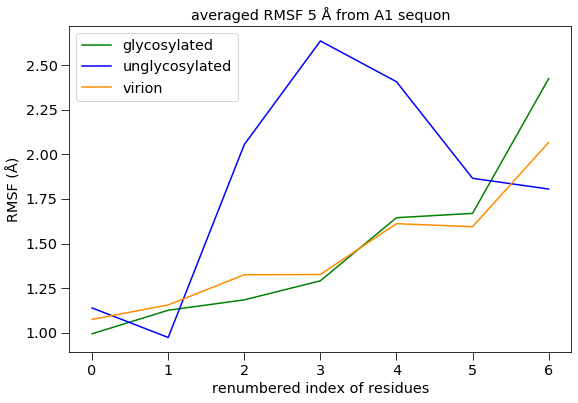

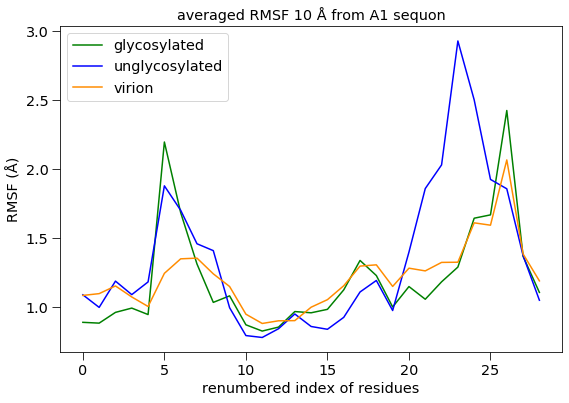

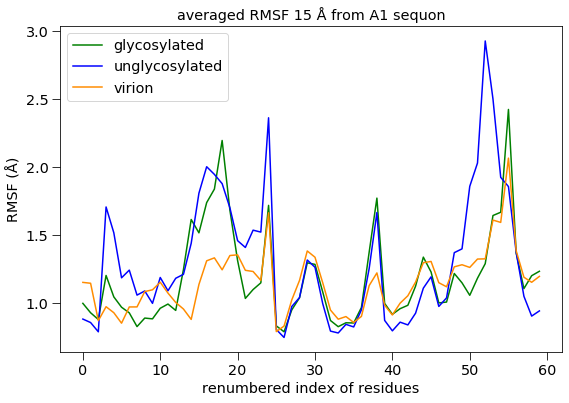

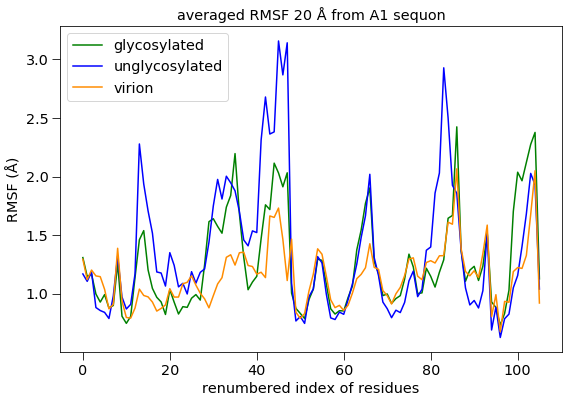

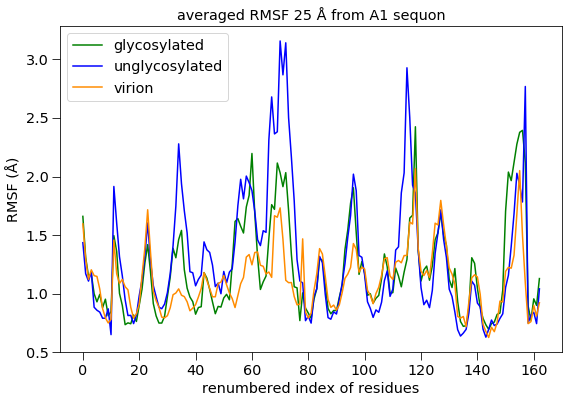

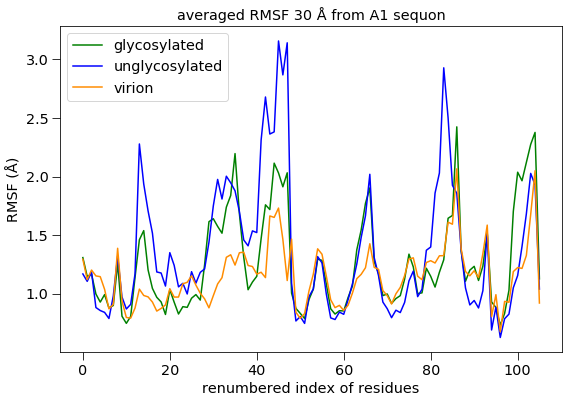

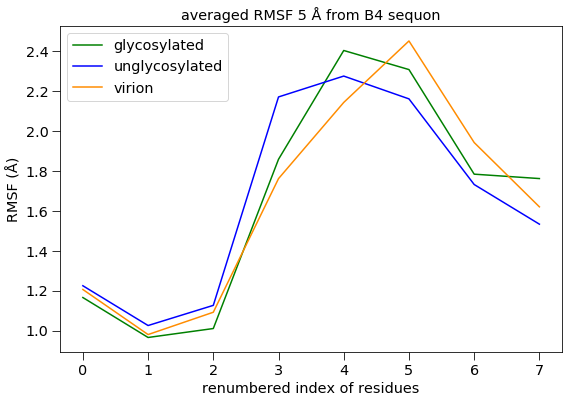

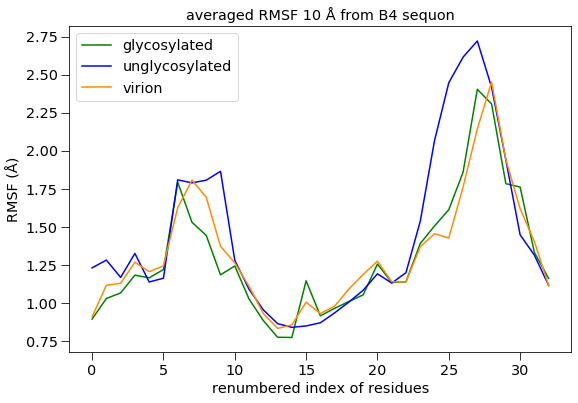

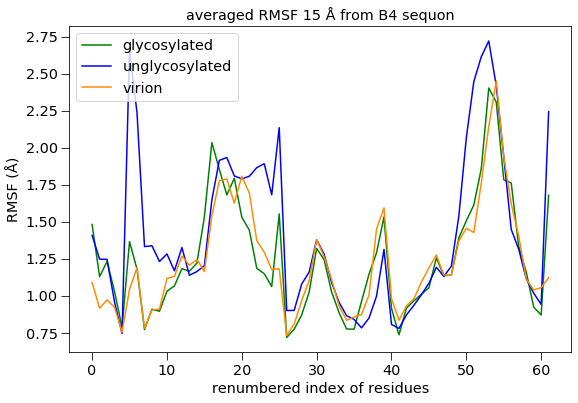

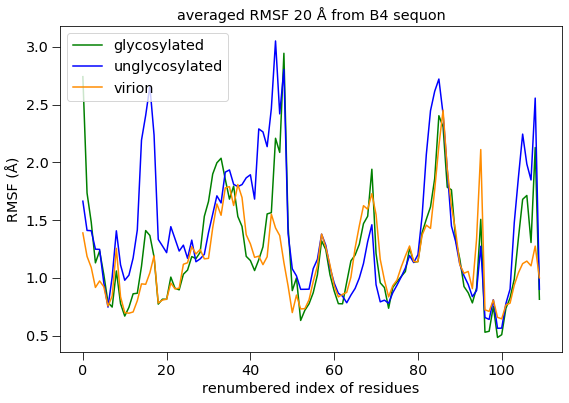

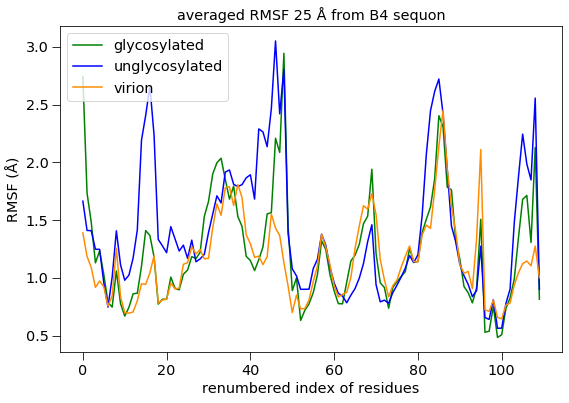

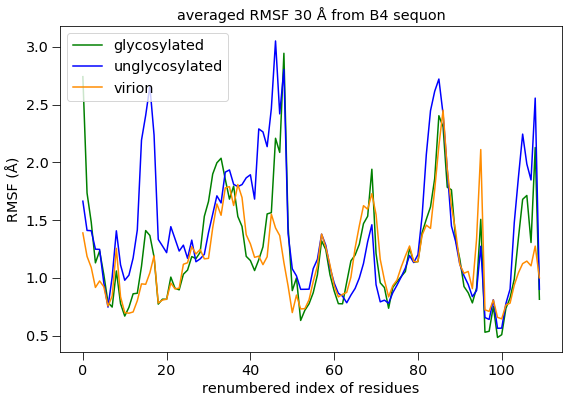

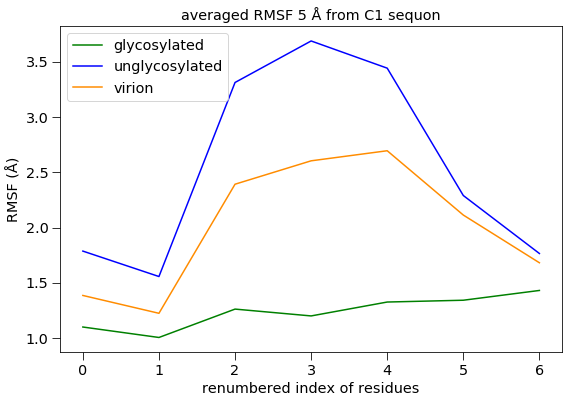

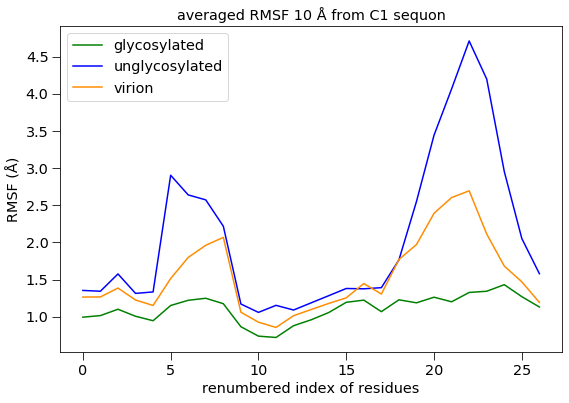

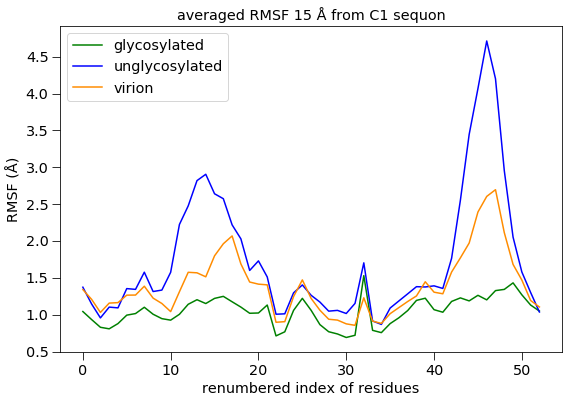

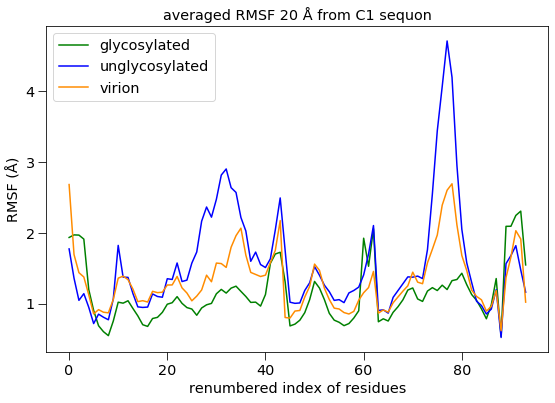

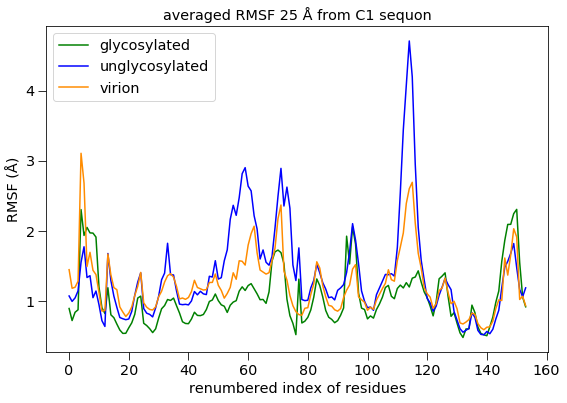

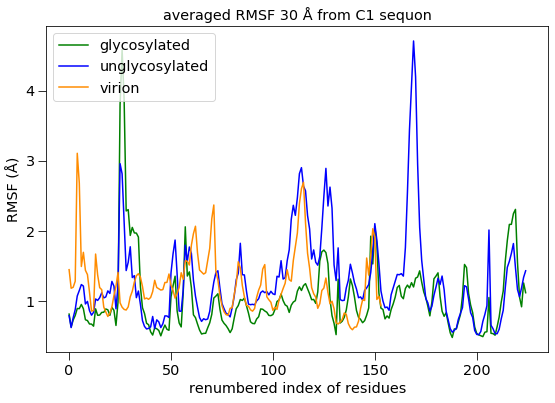

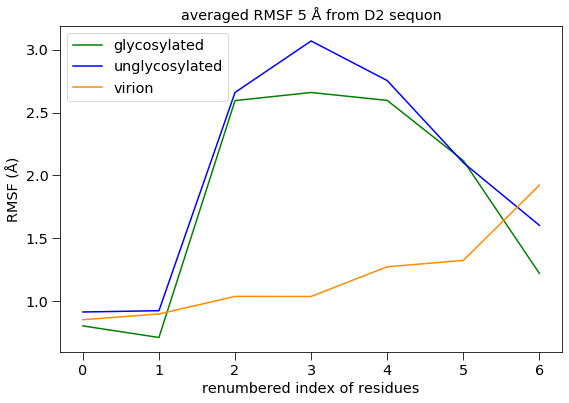

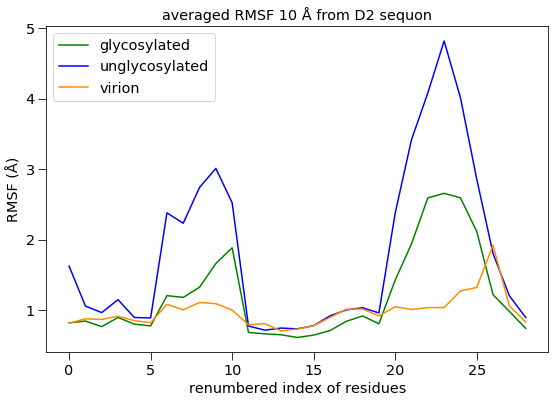

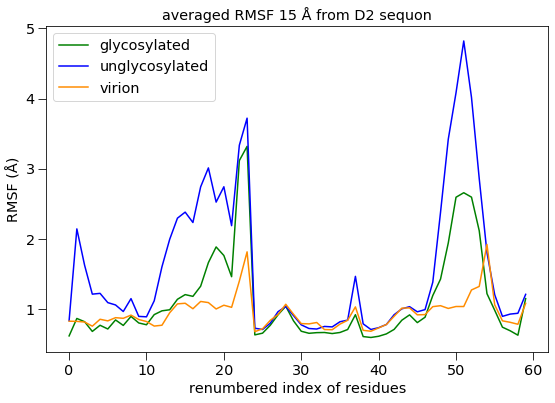

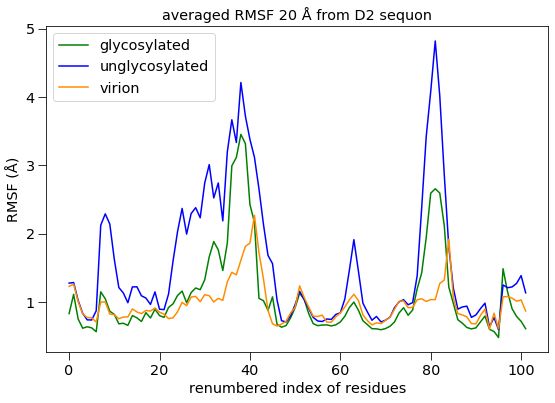

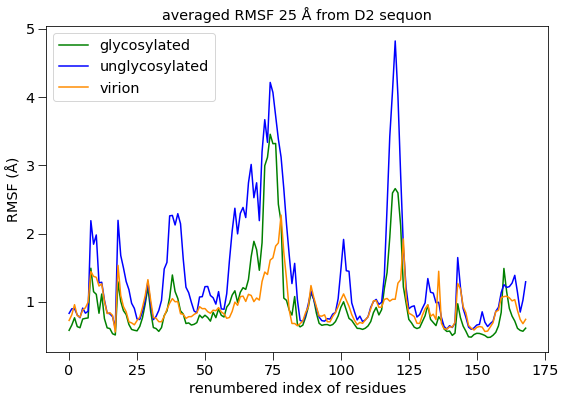

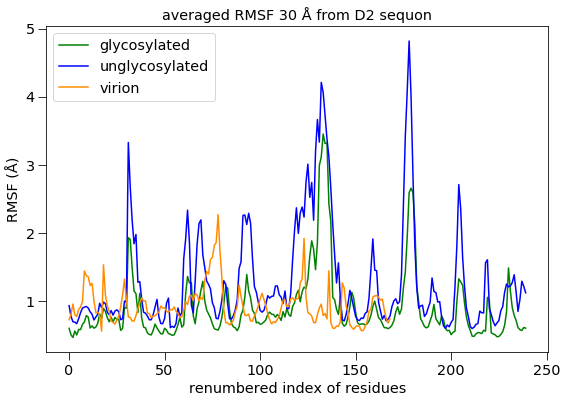

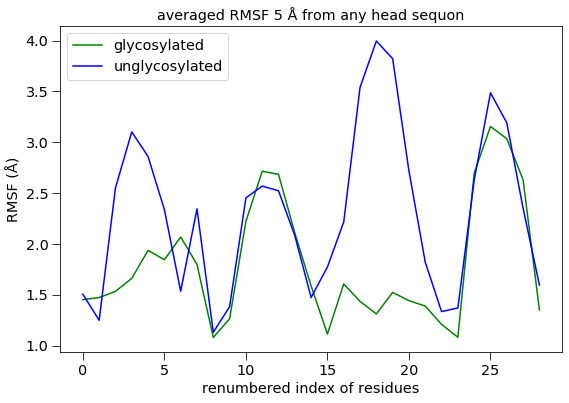

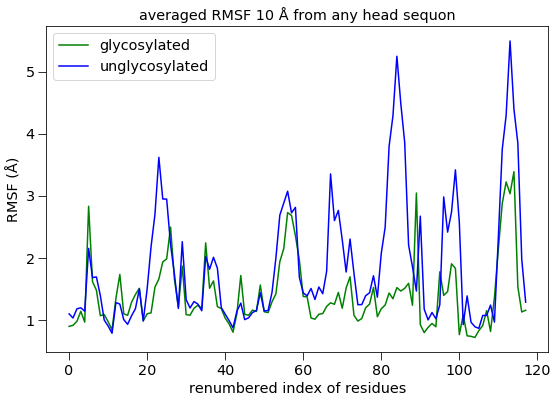

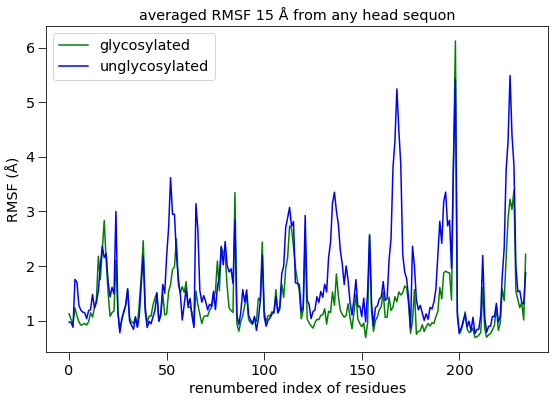

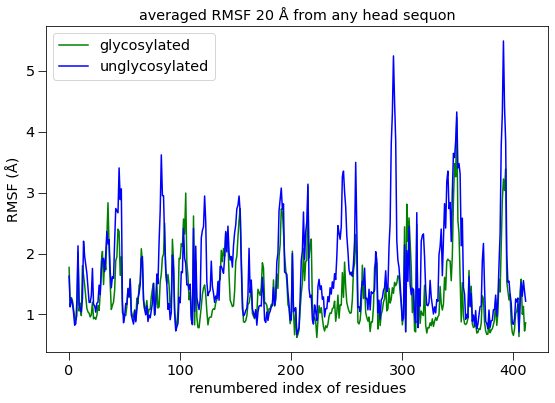

In [4]:
#rmsf of any protein head atoms within 5, 10, 15 and 20 A of any atom in the head glycans
## A1
#5 A away
arrayrmsfwithin5GA1 = np.array([[rmsfglycanwithin5G1A1], [rmsfglycanwithin5G2A1], [rmsfglycanwithin5G3A1]])
arrayrmsfwithin5UA1 = np.array([[rmsfglycanwithin5U1A1], [rmsfglycanwithin5U2A1], [rmsfglycanwithin5U3A1]])
meanrmsfwithin5GA1 = np.mean(arrayrmsfwithin5GA1, axis=0)
meanrmsfwithin5UA1 = np.mean(arrayrmsfwithin5UA1, axis=0)
meanrmsfwithin5GA1 = np.reshape(meanrmsfwithin5GA1, (-1, 1))
meanrmsfwithin5UA1 = np.reshape(meanrmsfwithin5UA1, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin5G1A1[:])), meanrmsfwithin5GA1[:], color='green')
plt.plot(range(len(indexglycanwithin5U1A1[:])), meanrmsfwithin5UA1[:], color='blue')
plt.plot(range(len(indexglycanwithin5VA1[:])), rmsfglycanwithin5VA1[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 5 Å from A1 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within5A1.png')
plt.show()
#10 A away
arrayrmsfwithin10GA1 = np.array([[rmsfglycanwithin10G1A1], [rmsfglycanwithin10G2A1], [rmsfglycanwithin10G3A1]])
arrayrmsfwithin10UA1 = np.array([[rmsfglycanwithin10U1A1], [rmsfglycanwithin10U2A1], [rmsfglycanwithin10U3A1]])
meanrmsfwithin10GA1 = np.mean(arrayrmsfwithin10GA1, axis=0)
meanrmsfwithin10UA1 = np.mean(arrayrmsfwithin10UA1, axis=0)
meanrmsfwithin10GA1 = np.reshape(meanrmsfwithin10GA1, (-1, 1))
meanrmsfwithin10UA1 = np.reshape(meanrmsfwithin10UA1, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin10G1A1[:])), meanrmsfwithin10GA1[:], color='green')
plt.plot(range(len(indexglycanwithin10U1A1[:])), meanrmsfwithin10UA1[:], color='blue')
plt.plot(range(len(indexglycanwithin10VA1[:])), rmsfglycanwithin10VA1[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 10 Å from A1 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within10A1.png')
plt.show()
#15 A away
arrayrmsfwithin15GA1 = np.array([[rmsfglycanwithin15G1A1], [rmsfglycanwithin15G2A1], [rmsfglycanwithin15G3A1]])
arrayrmsfwithin15UA1 = np.array([[rmsfglycanwithin15U1A1], [rmsfglycanwithin15U2A1], [rmsfglycanwithin15U3A1]])
meanrmsfwithin15GA1 = np.mean(arrayrmsfwithin15GA1, axis=0)
meanrmsfwithin15UA1 = np.mean(arrayrmsfwithin15UA1, axis=0)
meanrmsfwithin15GA1 = np.reshape(meanrmsfwithin15GA1, (-1, 1))
meanrmsfwithin15UA1 = np.reshape(meanrmsfwithin15UA1, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin15G1A1[:])), meanrmsfwithin15GA1[:], color='green')
plt.plot(range(len(indexglycanwithin15U1A1[:])), meanrmsfwithin15UA1[:], color='blue')
plt.plot(range(len(indexglycanwithin15VA1[:])), rmsfglycanwithin15VA1[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 15 Å from A1 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within15A1.png')
plt.show()
#20 A away
arrayrmsfwithin20GA1 = np.array([[rmsfglycanwithin20G1A1], [rmsfglycanwithin20G2A1], [rmsfglycanwithin20G3A1]])
arrayrmsfwithin20UA1 = np.array([[rmsfglycanwithin20U1A1], [rmsfglycanwithin20U2A1], [rmsfglycanwithin20U3A1]])
meanrmsfwithin20GA1 = np.mean(arrayrmsfwithin20GA1, axis=0)
meanrmsfwithin20UA1 = np.mean(arrayrmsfwithin20UA1, axis=0)
meanrmsfwithin20GA1 = np.reshape(meanrmsfwithin20GA1, (-1, 1))
meanrmsfwithin20UA1 = np.reshape(meanrmsfwithin20UA1, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin20G1A1[:])), meanrmsfwithin20GA1[:], color='green')
plt.plot(range(len(indexglycanwithin20U1A1[:])), meanrmsfwithin20UA1[:], color='blue')
plt.plot(range(len(indexglycanwithin20VA1[:])), rmsfglycanwithin20VA1[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 20 Å from A1 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within20A1.png')
#25 A away
arrayrmsfwithin25GA1 = np.array([[rmsfglycanwithin25G1A1], [rmsfglycanwithin25G2A1], [rmsfglycanwithin25G3A1]])
arrayrmsfwithin25UA1 = np.array([[rmsfglycanwithin25U1A1], [rmsfglycanwithin25U2A1], [rmsfglycanwithin25U3A1]])
meanrmsfwithin25GA1 = np.mean(arrayrmsfwithin25GA1, axis=0)
meanrmsfwithin25UA1 = np.mean(arrayrmsfwithin25UA1, axis=0)
meanrmsfwithin25GA1 = np.reshape(meanrmsfwithin25GA1, (-1, 1))
meanrmsfwithin25UA1 = np.reshape(meanrmsfwithin25UA1, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin25G1A1[:])), meanrmsfwithin25GA1[:], color='green')
plt.plot(range(len(indexglycanwithin25U1A1[:])), meanrmsfwithin25UA1[:], color='blue')
plt.plot(range(len(indexglycanwithin25VA1[:])), rmsfglycanwithin25VA1[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 25 Å from A1 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within25A1.png')
#30 A away
arrayrmsfwithin30GA1 = np.array([[rmsfglycanwithin30G1A1], [rmsfglycanwithin30G2A1], [rmsfglycanwithin30G3A1]])
arrayrmsfwithin30UA1 = np.array([[rmsfglycanwithin30U1A1], [rmsfglycanwithin30U2A1], [rmsfglycanwithin30U3A1]])
meanrmsfwithin30GA1 = np.mean(arrayrmsfwithin30GA1, axis=0)
meanrmsfwithin30UA1 = np.mean(arrayrmsfwithin30UA1, axis=0)
meanrmsfwithin30GA1 = np.reshape(meanrmsfwithin30GA1, (-1, 1))
meanrmsfwithin30UA1 = np.reshape(meanrmsfwithin30UA1, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin20G1A1[:])), meanrmsfwithin20GA1[:], color='green')
plt.plot(range(len(indexglycanwithin20U1A1[:])), meanrmsfwithin20UA1[:], color='blue')
plt.plot(range(len(indexglycanwithin20VA1[:])), rmsfglycanwithin20VA1[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 30 Å from A1 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within30A1.png')

##B4
#5 A away
arrayrmsfwithin5GB4 = np.array([[rmsfglycanwithin5G1B4], [rmsfglycanwithin5G2B4], [rmsfglycanwithin5G3B4]])
arrayrmsfwithin5UB4 = np.array([[rmsfglycanwithin5U1B4], [rmsfglycanwithin5U2B4], [rmsfglycanwithin5U3B4]])
meanrmsfwithin5GB4 = np.mean(arrayrmsfwithin5GB4, axis=0)
meanrmsfwithin5UB4 = np.mean(arrayrmsfwithin5UB4, axis=0)
meanrmsfwithin5GB4 = np.reshape(meanrmsfwithin5GB4, (-1, 1))
meanrmsfwithin5UB4 = np.reshape(meanrmsfwithin5UB4, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin5G1B4[:])), meanrmsfwithin5GB4[:], color='green')
plt.plot(range(len(indexglycanwithin5U1B4[:])), meanrmsfwithin5UB4[:], color='blue')
plt.plot(range(len(indexglycanwithin5VB4[:])), rmsfglycanwithin5VB4[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 5 Å from B4 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within5B4.png')
plt.show()
#10 A away
arrayrmsfwithin10GB4 = np.array([[rmsfglycanwithin10G1B4], [rmsfglycanwithin10G2B4], [rmsfglycanwithin10G3B4]])
arrayrmsfwithin10UB4 = np.array([[rmsfglycanwithin10U1B4], [rmsfglycanwithin10U2B4], [rmsfglycanwithin10U3B4]])
meanrmsfwithin10GB4 = np.mean(arrayrmsfwithin10GB4, axis=0)
meanrmsfwithin10UB4 = np.mean(arrayrmsfwithin10UB4, axis=0)
meanrmsfwithin10GB4 = np.reshape(meanrmsfwithin10GB4, (-1, 1))
meanrmsfwithin10UB4 = np.reshape(meanrmsfwithin10UB4, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin10G1B4[:])), meanrmsfwithin10GB4[:], color='green')
plt.plot(range(len(indexglycanwithin10U1B4[:])), meanrmsfwithin10UB4[:], color='blue')
plt.plot(range(len(indexglycanwithin10VB4[:])), rmsfglycanwithin10VB4[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 10 Å from B4 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within10B4.png')
plt.show()
#15 A away
arrayrmsfwithin15GB4 = np.array([[rmsfglycanwithin15G1B4], [rmsfglycanwithin15G2B4], [rmsfglycanwithin15G3B4]])
arrayrmsfwithin15UB4 = np.array([[rmsfglycanwithin15U1B4], [rmsfglycanwithin15U2B4], [rmsfglycanwithin15U3B4]])
meanrmsfwithin15GB4 = np.mean(arrayrmsfwithin15GB4, axis=0)
meanrmsfwithin15UB4 = np.mean(arrayrmsfwithin15UB4, axis=0)
meanrmsfwithin15GB4 = np.reshape(meanrmsfwithin15GB4, (-1, 1))
meanrmsfwithin15UB4 = np.reshape(meanrmsfwithin15UB4, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin15G1B4[:])), meanrmsfwithin15GB4[:], color='green')
plt.plot(range(len(indexglycanwithin15U1B4[:])), meanrmsfwithin15UB4[:], color='blue')
plt.plot(range(len(indexglycanwithin15VB4[:])), rmsfglycanwithin15VB4[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 15 Å from B4 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within15B4.png')
plt.show()
#20 A away
arrayrmsfwithin20GB4 = np.array([[rmsfglycanwithin20G1B4], [rmsfglycanwithin20G2B4], [rmsfglycanwithin20G3B4]])
arrayrmsfwithin20UB4 = np.array([[rmsfglycanwithin20U1B4], [rmsfglycanwithin20U2B4], [rmsfglycanwithin20U3B4]])
meanrmsfwithin20GB4 = np.mean(arrayrmsfwithin20GB4, axis=0)
meanrmsfwithin20UB4 = np.mean(arrayrmsfwithin20UB4, axis=0)
meanrmsfwithin20GB4 = np.reshape(meanrmsfwithin20GB4, (-1, 1))
meanrmsfwithin20UB4 = np.reshape(meanrmsfwithin20UB4, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin20G1B4[:])), meanrmsfwithin20GB4[:], color='green')
plt.plot(range(len(indexglycanwithin20U1B4[:])), meanrmsfwithin20UB4[:], color='blue')
plt.plot(range(len(indexglycanwithin20VB4[:])), rmsfglycanwithin20VB4[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 20 Å from B4 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within20B4.png')
#25 A away
arrayrmsfwithin25GB4 = np.array([[rmsfglycanwithin25G1B4], [rmsfglycanwithin25G2B4], [rmsfglycanwithin25G3B4]])
arrayrmsfwithin25UB4 = np.array([[rmsfglycanwithin25U1B4], [rmsfglycanwithin25U2B4], [rmsfglycanwithin25U3B4]])
meanrmsfwithin25GB4 = np.mean(arrayrmsfwithin25GB4, axis=0)
meanrmsfwithin25UB4 = np.mean(arrayrmsfwithin25UB4, axis=0)
meanrmsfwithin25GB4 = np.reshape(meanrmsfwithin25GB4, (-1, 1))
meanrmsfwithin25UB4 = np.reshape(meanrmsfwithin25UB4, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin20G1B4[:])), meanrmsfwithin20GB4[:], color='green')
plt.plot(range(len(indexglycanwithin20U1B4[:])), meanrmsfwithin20UB4[:], color='blue')
plt.plot(range(len(indexglycanwithin20VB4[:])), rmsfglycanwithin20VB4[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 25 Å from B4 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within25B4.png')
#30 A away
arrayrmsfwithin30GB4 = np.array([[rmsfglycanwithin30G1B4], [rmsfglycanwithin30G2B4], [rmsfglycanwithin30G3B4]])
arrayrmsfwithin30UB4 = np.array([[rmsfglycanwithin30U1B4], [rmsfglycanwithin30U2B4], [rmsfglycanwithin30U3B4]])
meanrmsfwithin30GB4 = np.mean(arrayrmsfwithin30GB4, axis=0)
meanrmsfwithin30UB4 = np.mean(arrayrmsfwithin30UB4, axis=0)
meanrmsfwithin30GB4 = np.reshape(meanrmsfwithin30GB4, (-1, 1))
meanrmsfwithin30UB4 = np.reshape(meanrmsfwithin30UB4, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin20G1B4[:])), meanrmsfwithin20GB4[:], color='green')
plt.plot(range(len(indexglycanwithin20U1B4[:])), meanrmsfwithin20UB4[:], color='blue')
plt.plot(range(len(indexglycanwithin20VB4[:])), rmsfglycanwithin20VB4[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 30 Å from B4 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within30B4.png')

##C1
#5 A away
arrayrmsfwithin5GC1 = np.array([[rmsfglycanwithin5G1C1], [rmsfglycanwithin5G2C1], [rmsfglycanwithin5G3C1]])
arrayrmsfwithin5UC1 = np.array([[rmsfglycanwithin5U1C1], [rmsfglycanwithin5U2C1], [rmsfglycanwithin5U3C1]])
meanrmsfwithin5GC1 = np.mean(arrayrmsfwithin5GC1, axis=0)
meanrmsfwithin5UC1 = np.mean(arrayrmsfwithin5UC1, axis=0)
meanrmsfwithin5GC1 = np.reshape(meanrmsfwithin5GC1, (-1, 1))
meanrmsfwithin5UC1 = np.reshape(meanrmsfwithin5UC1, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin5G1C1[:])), meanrmsfwithin5GC1[:], color='green')
plt.plot(range(len(indexglycanwithin5U1C1[:])), meanrmsfwithin5UC1[:], color='blue')
plt.plot(range(len(indexglycanwithin5VC1[:])), rmsfglycanwithin5VC1[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 5 Å from C1 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within5C1.png')
plt.show()
#10 A away
arrayrmsfwithin10GC1 = np.array([[rmsfglycanwithin10G1C1], [rmsfglycanwithin10G2C1], [rmsfglycanwithin10G3C1]])
arrayrmsfwithin10UC1 = np.array([[rmsfglycanwithin10U1C1], [rmsfglycanwithin10U2C1], [rmsfglycanwithin10U3C1]])
meanrmsfwithin10GC1 = np.mean(arrayrmsfwithin10GC1, axis=0)
meanrmsfwithin10UC1 = np.mean(arrayrmsfwithin10UC1, axis=0)
meanrmsfwithin10GC1 = np.reshape(meanrmsfwithin10GC1, (-1, 1))
meanrmsfwithin10UC1 = np.reshape(meanrmsfwithin10UC1, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin10G1C1[:27])), meanrmsfwithin10GC1[:27], color='green')
plt.plot(range(len(indexglycanwithin10U1C1[:27])), meanrmsfwithin10UC1[:27], color='blue')
plt.plot(range(len(indexglycanwithin10VC1[:27])), rmsfglycanwithin10VC1[:27], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 10 Å from C1 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within10C1.png')
plt.show()
#15 A away
arrayrmsfwithin15GC1 = np.array([[rmsfglycanwithin15G1C1], [rmsfglycanwithin15G2C1], [rmsfglycanwithin15G3C1]])
arrayrmsfwithin15UC1 = np.array([[rmsfglycanwithin15U1C1], [rmsfglycanwithin15U2C1], [rmsfglycanwithin15U3C1]])
meanrmsfwithin15GC1 = np.mean(arrayrmsfwithin15GC1, axis=0)
meanrmsfwithin15UC1 = np.mean(arrayrmsfwithin15UC1, axis=0)
meanrmsfwithin15GC1 = np.reshape(meanrmsfwithin15GC1, (-1, 1))
meanrmsfwithin15UC1 = np.reshape(meanrmsfwithin15UC1, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin15G1C1[:])), meanrmsfwithin15GC1[:], color='green')
plt.plot(range(len(indexglycanwithin15U1C1[:])), meanrmsfwithin15UC1[:], color='blue')
plt.plot(range(len(indexglycanwithin15VC1[:])), rmsfglycanwithin15VC1[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 15 Å from C1 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within15C1.png')
plt.show()
#20 A away
arrayrmsfwithin20GC1 = np.array([[rmsfglycanwithin20G1C1], [rmsfglycanwithin20G2C1], [rmsfglycanwithin20G3C1]])
arrayrmsfwithin20UC1 = np.array([[rmsfglycanwithin20U1C1], [rmsfglycanwithin20U2C1], [rmsfglycanwithin20U3C1]])
meanrmsfwithin20GC1 = np.mean(arrayrmsfwithin20GC1, axis=0)
meanrmsfwithin20UC1 = np.mean(arrayrmsfwithin20UC1, axis=0)
meanrmsfwithin20GC1 = np.reshape(meanrmsfwithin20GC1, (-1, 1))
meanrmsfwithin20UC1 = np.reshape(meanrmsfwithin20UC1, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin20G1C1[:])), meanrmsfwithin20GC1[:], color='green')
plt.plot(range(len(indexglycanwithin20U1C1[:])), meanrmsfwithin20UC1[:], color='blue')
plt.plot(range(len(indexglycanwithin20VC1[:])), rmsfglycanwithin20VC1[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 20 Å from C1 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within20C1.png')
#25 A away
arrayrmsfwithin25GC1 = np.array([[rmsfglycanwithin25G1C1], [rmsfglycanwithin25G2C1], [rmsfglycanwithin25G3C1]])
arrayrmsfwithin25UC1 = np.array([[rmsfglycanwithin25U1C1], [rmsfglycanwithin25U2C1], [rmsfglycanwithin25U3C1]])
meanrmsfwithin25GC1 = np.mean(arrayrmsfwithin25GC1, axis=0)
meanrmsfwithin25UC1 = np.mean(arrayrmsfwithin25UC1, axis=0)
meanrmsfwithin25GC1 = np.reshape(meanrmsfwithin25GC1, (-1, 1))
meanrmsfwithin25UC1 = np.reshape(meanrmsfwithin25UC1, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin25G1C1[:])), meanrmsfwithin25GC1[:], color='green')
plt.plot(range(len(indexglycanwithin25U1C1[:])), meanrmsfwithin25UC1[:], color='blue')
plt.plot(range(len(indexglycanwithin25VC1[:])), rmsfglycanwithin25VC1[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 25 Å from C1 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within25C1.png')
#30 A away
arrayrmsfwithin30GC1 = np.array([[rmsfglycanwithin30G1C1], [rmsfglycanwithin30G2C1], [rmsfglycanwithin30G3C1]])
arrayrmsfwithin30UC1 = np.array([[rmsfglycanwithin30U1C1], [rmsfglycanwithin30U2C1], [rmsfglycanwithin30U3C1]])
meanrmsfwithin30GC1 = np.mean(arrayrmsfwithin30GC1, axis=0)
meanrmsfwithin30UC1 = np.mean(arrayrmsfwithin30UC1, axis=0)
meanrmsfwithin30GC1 = np.reshape(meanrmsfwithin30GC1, (-1, 1))
meanrmsfwithin30UC1 = np.reshape(meanrmsfwithin30UC1, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin30G1C1[:])), meanrmsfwithin30GC1[:], color='green')
plt.plot(range(len(indexglycanwithin30U1C1[:])), meanrmsfwithin30UC1[:], color='blue')
plt.plot(range(len(indexglycanwithin30VC1[:])), rmsfglycanwithin30VC1[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 30 Å from C1 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within30C1.png')

##D2
#5 A away
arrayrmsfwithin5GD2 = np.array([[rmsfglycanwithin5G1D2], [rmsfglycanwithin5G2D2], [rmsfglycanwithin5G3D2]])
arrayrmsfwithin5UD2 = np.array([[rmsfglycanwithin5U1D2], [rmsfglycanwithin5U2D2], [rmsfglycanwithin5U3D2]])
meanrmsfwithin5GD2 = np.mean(arrayrmsfwithin5GD2, axis=0)
meanrmsfwithin5UD2 = np.mean(arrayrmsfwithin5UD2, axis=0)
meanrmsfwithin5GD2 = np.reshape(meanrmsfwithin5GD2, (-1, 1))
meanrmsfwithin5UD2 = np.reshape(meanrmsfwithin5UD2, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin5G1D2[:])), meanrmsfwithin5GD2[:], color='green')
plt.plot(range(len(indexglycanwithin5U1D2[:])), meanrmsfwithin5UD2[:], color='blue')
plt.plot(range(len(indexglycanwithin5VD2[:])), rmsfglycanwithin5VD2[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 5 Å from D2 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within5D2.png')
plt.show()
#10 A away
arrayrmsfwithin10GD2 = np.array([[rmsfglycanwithin10G1D2], [rmsfglycanwithin10G2D2], [rmsfglycanwithin10G3D2]])
arrayrmsfwithin10UD2 = np.array([[rmsfglycanwithin10U1D2], [rmsfglycanwithin10U2D2], [rmsfglycanwithin10U3D2]])
meanrmsfwithin10GD2 = np.mean(arrayrmsfwithin10GD2, axis=0)
meanrmsfwithin10UD2 = np.mean(arrayrmsfwithin10UD2, axis=0)
meanrmsfwithin10GD2 = np.reshape(meanrmsfwithin10GD2, (-1, 1))
meanrmsfwithin10UD2 = np.reshape(meanrmsfwithin10UD2, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin10G1D2[:])), meanrmsfwithin10GD2[:], color='green')
plt.plot(range(len(indexglycanwithin10U1D2[:])), meanrmsfwithin10UD2[:], color='blue')
plt.plot(range(len(indexglycanwithin10VD2[:])), rmsfglycanwithin10VD2[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 10 Å from D2 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within10D2.png')
plt.show()
#15 A away
arrayrmsfwithin15GD2 = np.array([[rmsfglycanwithin15G1D2], [rmsfglycanwithin15G2D2], [rmsfglycanwithin15G3D2]])
arrayrmsfwithin15UD2 = np.array([[rmsfglycanwithin15U1D2], [rmsfglycanwithin15U2D2], [rmsfglycanwithin15U3D2]])
meanrmsfwithin15GD2 = np.mean(arrayrmsfwithin15GD2, axis=0)
meanrmsfwithin15UD2 = np.mean(arrayrmsfwithin15UD2, axis=0)
meanrmsfwithin15GD2 = np.reshape(meanrmsfwithin15GD2, (-1, 1))
meanrmsfwithin15UD2 = np.reshape(meanrmsfwithin15UD2, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin15G1D2[:])), meanrmsfwithin15GD2[:], color='green')
plt.plot(range(len(indexglycanwithin15U1D2[:])), meanrmsfwithin15UD2[:], color='blue')
plt.plot(range(len(indexglycanwithin15VD2[:])), rmsfglycanwithin15VD2[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 15 Å from D2 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within15D2.png')
plt.show()
#20 A away
arrayrmsfwithin20GD2 = np.array([[rmsfglycanwithin20G1D2], [rmsfglycanwithin20G2D2], [rmsfglycanwithin20G3D2]])
arrayrmsfwithin20UD2 = np.array([[rmsfglycanwithin20U1D2], [rmsfglycanwithin20U2D2], [rmsfglycanwithin20U3D2]])
meanrmsfwithin20GD2 = np.mean(arrayrmsfwithin20GD2, axis=0)
meanrmsfwithin20UD2 = np.mean(arrayrmsfwithin20UD2, axis=0)
meanrmsfwithin20GD2 = np.reshape(meanrmsfwithin20GD2, (-1, 1))
meanrmsfwithin20UD2 = np.reshape(meanrmsfwithin20UD2, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin20G1D2[:])), meanrmsfwithin20GD2[:], color='green')
plt.plot(range(len(indexglycanwithin20U1D2[:])), meanrmsfwithin20UD2[:], color='blue')
plt.plot(range(len(indexglycanwithin20VD2[:])), rmsfglycanwithin20VD2[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 20 Å from D2 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within20D2.png')
#25 A away
arrayrmsfwithin25GD2 = np.array([[rmsfglycanwithin25G1D2], [rmsfglycanwithin25G2D2], [rmsfglycanwithin25G3D2]])
arrayrmsfwithin25UD2 = np.array([[rmsfglycanwithin25U1D2], [rmsfglycanwithin25U2D2], [rmsfglycanwithin25U3D2]])
meanrmsfwithin25GD2 = np.mean(arrayrmsfwithin25GD2, axis=0)
meanrmsfwithin25UD2 = np.mean(arrayrmsfwithin25UD2, axis=0)
meanrmsfwithin25GD2 = np.reshape(meanrmsfwithin25GD2, (-1, 1))
meanrmsfwithin25UD2 = np.reshape(meanrmsfwithin25UD2, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin25G1D2[:])), meanrmsfwithin25GD2[:], color='green')
plt.plot(range(len(indexglycanwithin25U1D2[:])), meanrmsfwithin25UD2[:], color='blue')
plt.plot(range(len(indexglycanwithin25VD2[:])), rmsfglycanwithin25VD2[:], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 25 Å from D2 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within25D2.png')
#30 A away
arrayrmsfwithin30GD2 = np.array([[rmsfglycanwithin30G1D2], [rmsfglycanwithin30G2D2], [rmsfglycanwithin30G3D2]])
arrayrmsfwithin30UD2 = np.array([[rmsfglycanwithin30U1D2], [rmsfglycanwithin30U2D2], [rmsfglycanwithin30U3D2]])
meanrmsfwithin30GD2 = np.mean(arrayrmsfwithin30GD2, axis=0)
meanrmsfwithin30UD2 = np.mean(arrayrmsfwithin30UD2, axis=0)
meanrmsfwithin30GD2 = np.reshape(meanrmsfwithin30GD2, (-1, 1))
meanrmsfwithin30UD2 = np.reshape(meanrmsfwithin30UD2, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin30G1D2[:240])), meanrmsfwithin30GD2[:240], color='green')
plt.plot(range(len(indexglycanwithin30U1D2[:240])), meanrmsfwithin30UD2[:240], color='blue')
plt.plot(range(len(indexglycanwithin30VD2[:240])), rmsfglycanwithin30VD2[:240], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 30 Å from D2 sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within30D2.png')

##all
#5 A away
arrayrmsfwithin5G = np.array([[rmsfglycanwithin5G1], [rmsfglycanwithin5G2], [rmsfglycanwithin5G3]])
arrayrmsfwithin5U = np.array([[rmsfglycanwithin5U1], [rmsfglycanwithin5U2], [rmsfglycanwithin5U3]])
meanrmsfwithin5G = np.mean(arrayrmsfwithin5G, axis=0)
meanrmsfwithin5U = np.mean(arrayrmsfwithin5U, axis=0)
meanrmsfwithin5G = np.reshape(meanrmsfwithin5G, (-1, 1))
meanrmsfwithin5U = np.reshape(meanrmsfwithin5U, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin5G1[:29])), meanrmsfwithin5G[:29], color='green')
plt.plot(range(len(indexglycanwithin5U1[:29])), meanrmsfwithin5U[:29], color='blue')
#plt.plot(range(len(indexglycanwithin5V[:29])), rmsfglycanwithin5V[:29], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 5 Å from any head sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within5.png')
plt.show()
#10 A away
arrayrmsfwithin10G = np.array([[rmsfglycanwithin10G1], [rmsfglycanwithin10G2], [rmsfglycanwithin10G3]])
arrayrmsfwithin10U = np.array([[rmsfglycanwithin10U1], [rmsfglycanwithin10U2], [rmsfglycanwithin10U3]])
meanrmsfwithin10G = np.mean(arrayrmsfwithin10G, axis=0)
meanrmsfwithin10U = np.mean(arrayrmsfwithin10U, axis=0)
meanrmsfwithin10G = np.reshape(meanrmsfwithin10G, (-1, 1))
meanrmsfwithin10U = np.reshape(meanrmsfwithin10U, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin10G1[:118])), meanrmsfwithin10G[:118], color='green')
plt.plot(range(len(indexglycanwithin10U1[:118])), meanrmsfwithin10U[:118], color='blue')
#plt.plot(range(len(indexglycanwithin10V[:118])), rmsfglycanwithin10V[:118], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 10 Å from any head sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within10.png')
plt.show()
#15 A away
arrayrmsfwithin15G = np.array([[rmsfglycanwithin15G1], [rmsfglycanwithin15G2], [rmsfglycanwithin15G3]])
arrayrmsfwithin15U = np.array([[rmsfglycanwithin15U1], [rmsfglycanwithin15U2], [rmsfglycanwithin15U3]])
meanrmsfwithin15G = np.mean(arrayrmsfwithin15G, axis=0)
meanrmsfwithin15U = np.mean(arrayrmsfwithin15U, axis=0)
meanrmsfwithin15G = np.reshape(meanrmsfwithin15G, (-1, 1))
meanrmsfwithin15U = np.reshape(meanrmsfwithin15U, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin15G1[:235])), meanrmsfwithin15G[:235], color='green')
plt.plot(range(len(indexglycanwithin15U1[:235])), meanrmsfwithin15U[:235], color='blue')
#plt.plot(range(len(indexglycanwithin15V[:235])), rmsfglycanwithin15V[:235], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 15 Å from any head sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within15.png')
plt.show()
#20 A away
arrayrmsfwithin20G = np.array([[rmsfglycanwithin20G1], [rmsfglycanwithin20G2], [rmsfglycanwithin20G3]])
arrayrmsfwithin20U = np.array([[rmsfglycanwithin20U1], [rmsfglycanwithin20U2], [rmsfglycanwithin20U3]])
meanrmsfwithin20G = np.mean(arrayrmsfwithin20G, axis=0)
meanrmsfwithin20U = np.mean(arrayrmsfwithin20U, axis=0)
meanrmsfwithin20G = np.reshape(meanrmsfwithin20G, (-1, 1))
meanrmsfwithin20U = np.reshape(meanrmsfwithin20U, (-1, 1))
plt.figure(figsize=(9,6))
plt.plot(range(len(indexglycanwithin20G1[:412])), meanrmsfwithin20G[:412], color='green')
plt.plot(range(len(indexglycanwithin20U1[:412])), meanrmsfwithin20U[:412], color='blue')
#plt.plot(range(len(indexglycanwithin20V[:412])), rmsfglycanwithin20V[:412], color='darkorange')
plt.legend(['glycosylated', 'unglycosylated', 'virion'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF (Å)')
plt.title('averaged RMSF 20 Å from any head sequon')
plt.savefig('analysis_rmsf/rmsf_averaged_bysystem_within20.png')

The percentage of unglycosylated residues within 5 Å of the A1 sequon that have a higher RMSF than the corresponding glycosylated residues is 71.42857142857143 %
The area under the curve per residue is [0.39780476] Å
The average RMSF difference per residue is [0.36391905] Å
The percentage of unglycosylated residues within 10 Å of the A1 sequon that have a higher RMSF than the corresponding glycosylated residues is 51.724137931034484 %
The area under the curve per residue is [0.14074368] Å
The average RMSF difference per residue is [0.14320345] Å
The percentage of unglycosylated residues within 15 Å of the A1 sequon that have a higher RMSF than the corresponding glycosylated residues is 51.66666666666667 %
The area under the curve per residue is [0.06802611] Å
The average RMSF difference per residue is [0.10947722] Å
The percentage of unglycosylated residues within 20 Å of the A1 sequon that have a higher RMSF than the corresponding glycosylated residues is 53.77358490566038 %
The area 

/software/repo/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:469: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/software/repo/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:492: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


The percentage of unglycosylated residues within 20 Å of the D2 sequon that have a higher RMSF than the corresponding glycosylated residues is 98.0392156862745 %
The area under the curve per residue is [0.48018317] Å
The average RMSF difference per residue is [0.48493725] Å
The percentage of unglycosylated residues within 25 Å of the D2 sequon that have a higher RMSF than the corresponding glycosylated residues is 98.81656804733728 %
The area under the curve per residue is [0.42460197] Å
The average RMSF difference per residue is [0.42734596] Å


/software/repo/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:515: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/software/repo/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:538: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


The percentage of unglycosylated residues within 30 Å of the D2 sequon that have a higher RMSF than the corresponding glycosylated residues is 93.75 %
The area under the curve per residue is [0.39440917] Å
The average RMSF difference per residue is [0.39618264] Å


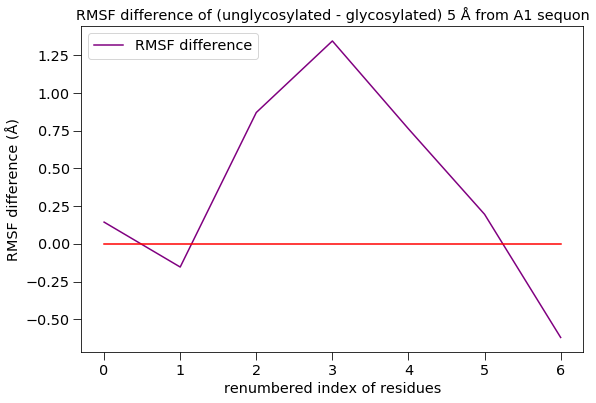

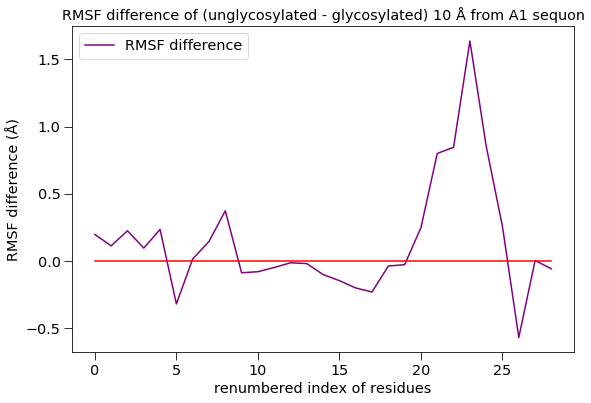

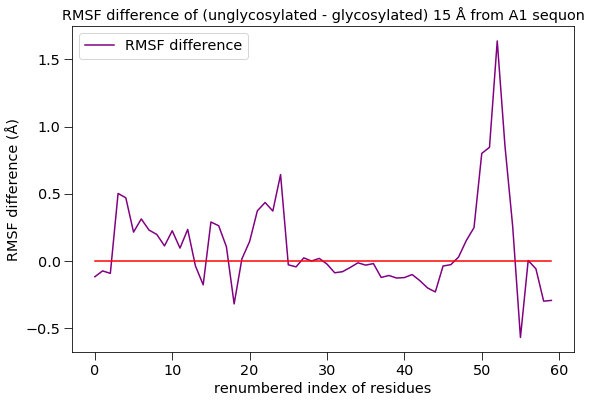

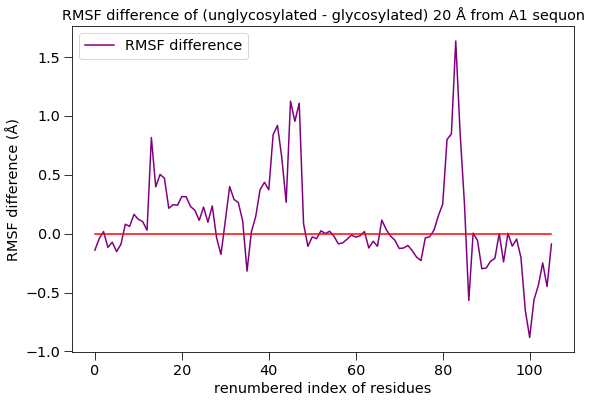

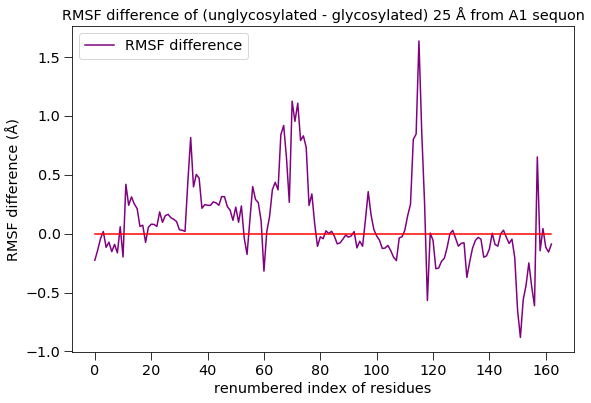

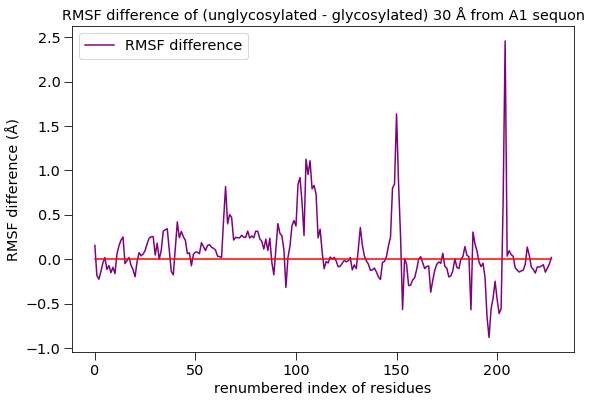

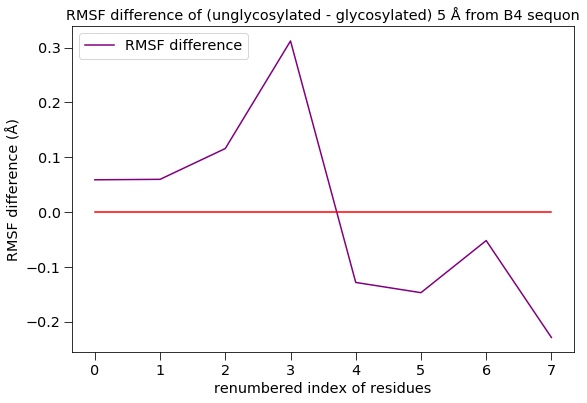

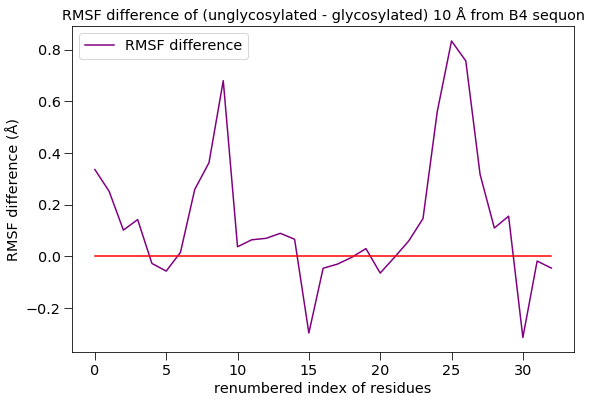

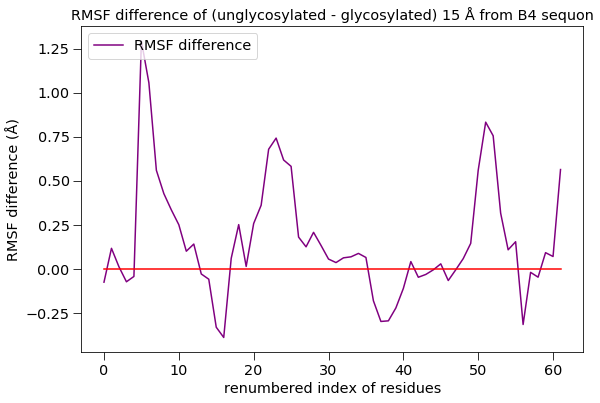

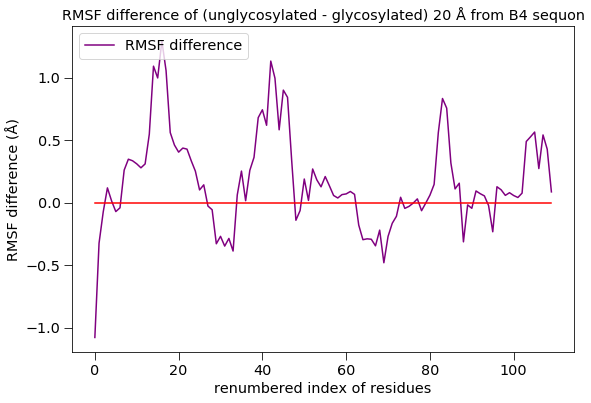

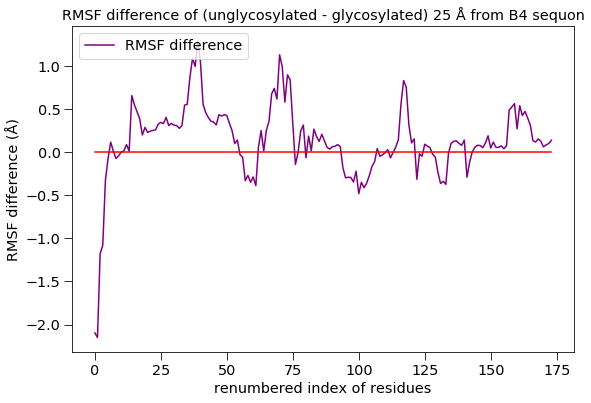

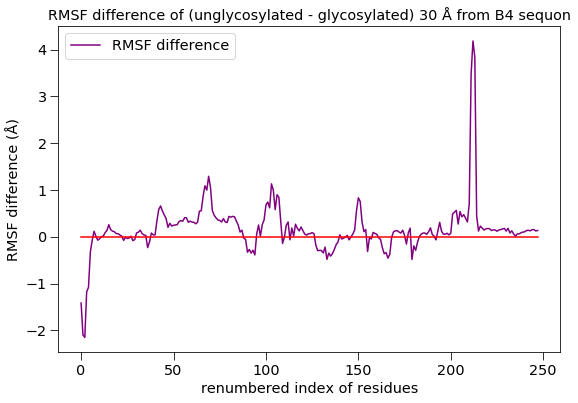

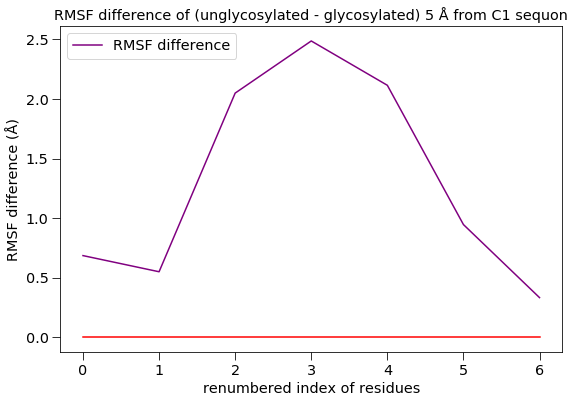

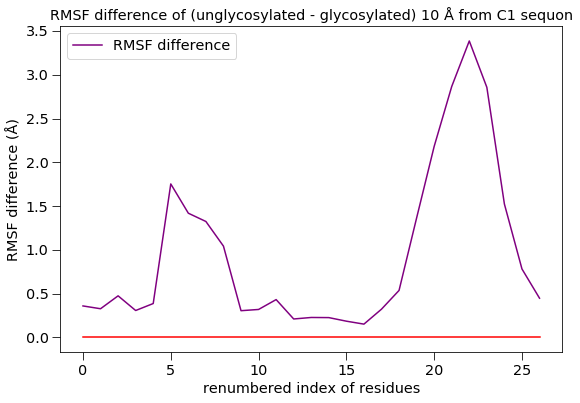

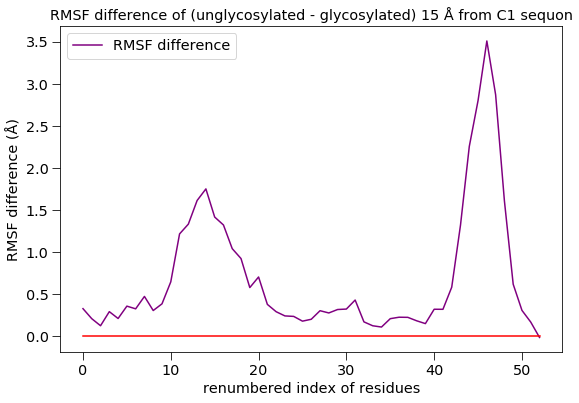

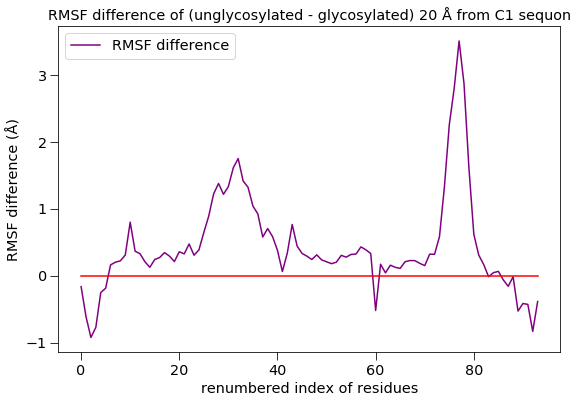

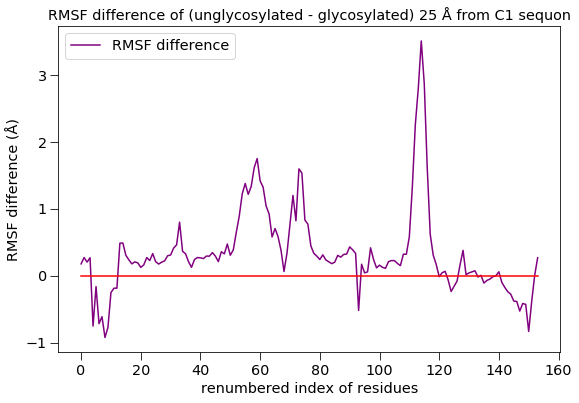

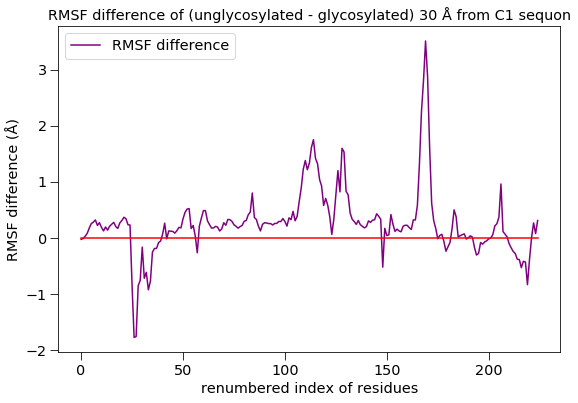

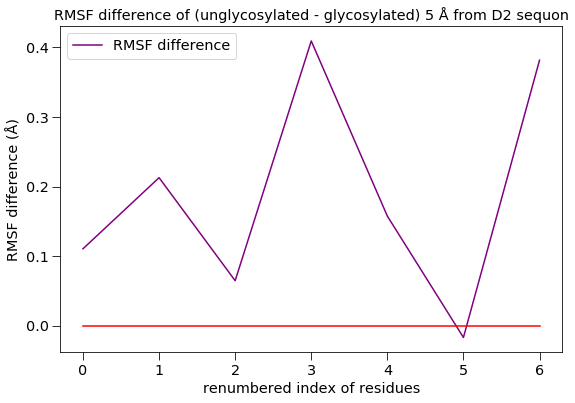

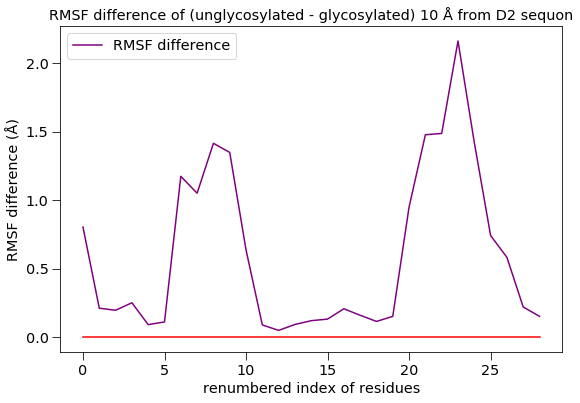

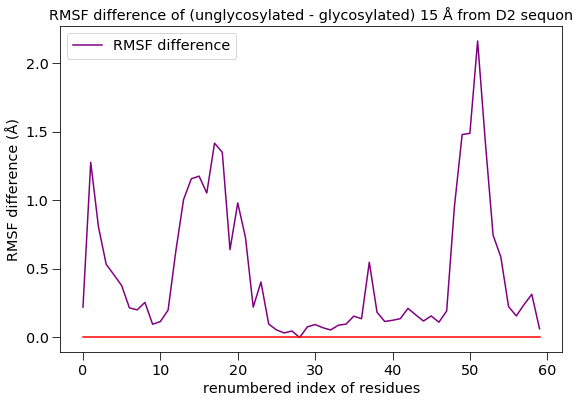

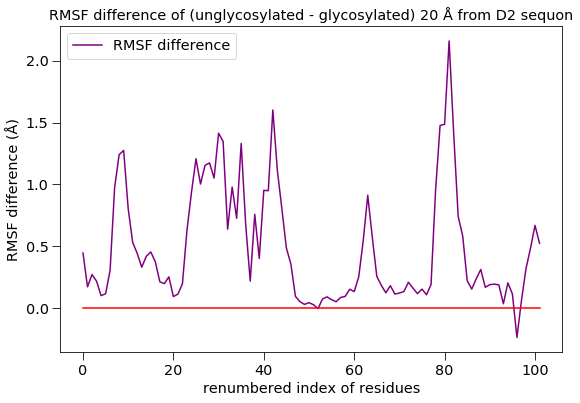

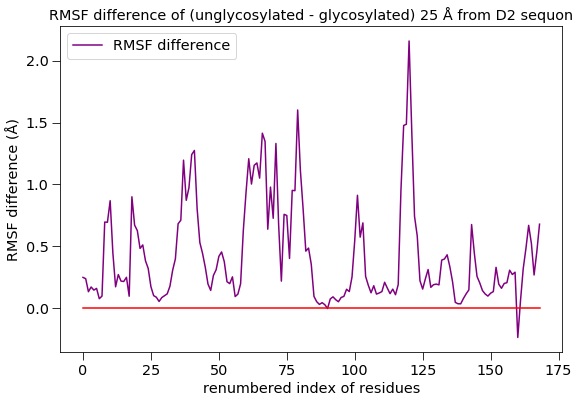

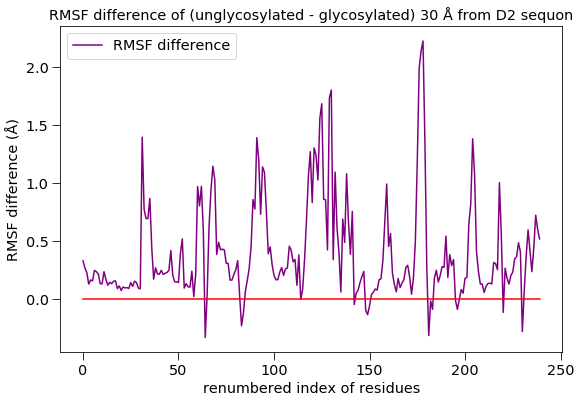

In [5]:
#RMSF difference plots from the figures above
##A1
#5 A away
diffwithin5A1 = np.subtract(meanrmsfwithin5UA1[:], meanrmsfwithin5GA1[:])
diffwithin5A1zero = np.full((len(diffwithin5A1), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin5A1)), diffwithin5A1, color='purple')
plt.plot(range(len(diffwithin5A1zero)), diffwithin5A1zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 5 Å from A1 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within5A1.png')

abovezerowithin5A1 = (diffwithin5A1 > 0).sum()
percentwithin5A1 = np.divide(abovezerowithin5A1, len(diffwithin5A1))
print("The percentage of unglycosylated residues within 5 Å of the A1 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin5A1*100, "%")

integratewithin5A1 = np.trapz(diffwithin5A1, axis=0)
meanintegratewithin5A1 = np.divide(integratewithin5A1, len(diffwithin5A1))
print("The area under the curve per residue is", meanintegratewithin5A1, "Å")

avgdiffwithin5A1 = np.mean(diffwithin5A1, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin5A1, "Å")

#10 A away
diffwithin10A1 = np.subtract(meanrmsfwithin10UA1[:], meanrmsfwithin10GA1[:])
diffwithin10A1zero = np.full((len(diffwithin10A1), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin10A1)), diffwithin10A1, color='purple')
plt.plot(range(len(diffwithin10A1zero)), diffwithin10A1zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 10 Å from A1 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within10A1.png')

abovezerowithin10A1 = (diffwithin10A1 > 0).sum()
percentwithin10A1 = np.divide(abovezerowithin10A1, len(diffwithin10A1))
print("The percentage of unglycosylated residues within 10 Å of the A1 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin10A1*100, "%")

integratewithin10A1 = np.trapz(diffwithin10A1, axis=0)
meanintegratewithin10A1 = np.divide(integratewithin10A1, len(diffwithin10A1))
print("The area under the curve per residue is", meanintegratewithin10A1, "Å")

avgdiffwithin10A1 = np.mean(diffwithin10A1, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin10A1, "Å")

#15 A away
diffwithin15A1 = np.subtract(meanrmsfwithin15UA1[:], meanrmsfwithin15GA1[:])
diffwithin15A1zero = np.full((len(diffwithin15A1), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin15A1)), diffwithin15A1, color='purple')
plt.plot(range(len(diffwithin15A1zero)), diffwithin15A1zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 15 Å from A1 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within15A1.png')

abovezerowithin15A1 = (diffwithin15A1 > 0).sum()
percentwithin15A1 = np.divide(abovezerowithin15A1, len(diffwithin15A1))
print("The percentage of unglycosylated residues within 15 Å of the A1 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin15A1*100, "%")

integratewithin15A1 = np.trapz(diffwithin10A1, axis=0)
meanintegratewithin15A1 = np.divide(integratewithin15A1, len(diffwithin15A1))
print("The area under the curve per residue is", meanintegratewithin15A1, "Å")

avgdiffwithin15A1 = np.mean(diffwithin15A1, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin15A1, "Å")

#20 A away
diffwithin20A1 = np.subtract(meanrmsfwithin20UA1[:], meanrmsfwithin20GA1[:])
diffwithin20A1zero = np.full((len(diffwithin20A1), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin20A1)), diffwithin20A1, color='purple')
plt.plot(range(len(diffwithin20A1zero)), diffwithin20A1zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 20 Å from A1 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within20A1.png')

abovezerowithin20A1 = (diffwithin20A1 > 0).sum()
percentwithin20A1 = np.divide(abovezerowithin20A1, len(diffwithin20A1))
print("The percentage of unglycosylated residues within 20 Å of the A1 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin20A1*100, "%")

integratewithin20A1 = np.trapz(diffwithin20A1, axis=0)
meanintegratewithin20A1 = np.divide(integratewithin20A1, len(diffwithin20A1))
print("The area under the curve per residue is", meanintegratewithin20A1, "Å")

avgdiffwithin20A1 = np.mean(diffwithin20A1, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin20A1, "Å")

#25 A away
diffwithin25A1 = np.subtract(meanrmsfwithin25UA1[:], meanrmsfwithin25GA1[:])
diffwithin25A1zero = np.full((len(diffwithin25A1), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin25A1)), diffwithin25A1, color='purple')
plt.plot(range(len(diffwithin25A1zero)), diffwithin25A1zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 25 Å from A1 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within25A1.png')

abovezerowithin25A1 = (diffwithin25A1 > 0).sum()
percentwithin25A1 = np.divide(abovezerowithin25A1, len(diffwithin25A1))
print("The percentage of unglycosylated residues within 25 Å of the A1 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin25A1*100, "%")

integratewithin25A1 = np.trapz(diffwithin25A1, axis=0)
meanintegratewithin25A1 = np.divide(integratewithin25A1, len(diffwithin25A1))
print("The area under the curve per residue is", meanintegratewithin25A1, "Å")

avgdiffwithin25A1 = np.mean(diffwithin25A1, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin25A1, "Å")

#30 A away
diffwithin30A1 = np.subtract(meanrmsfwithin30UA1[:], meanrmsfwithin30GA1[:])
diffwithin30A1zero = np.full((len(diffwithin30A1), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin30A1)), diffwithin30A1, color='purple')
plt.plot(range(len(diffwithin30A1zero)), diffwithin30A1zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 30 Å from A1 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within30A1.png')

abovezerowithin30A1 = (diffwithin30A1 > 0).sum()
percentwithin30A1 = np.divide(abovezerowithin30A1, len(diffwithin30A1))
print("The percentage of unglycosylated residues within 30 Å of the A1 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin30A1*100, "%")

integratewithin30A1 = np.trapz(diffwithin30A1, axis=0)
meanintegratewithin30A1 = np.divide(integratewithin30A1, len(diffwithin30A1))
print("The area under the curve per residue is", meanintegratewithin30A1, "Å")

avgdiffwithin30A1 = np.mean(diffwithin30A1, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin30A1, "Å")

##B4
#5 A away
diffwithin5B4 = np.subtract(meanrmsfwithin5UB4[:], meanrmsfwithin5GB4[:])
diffwithin5B4zero = np.full((len(diffwithin5B4), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin5B4)), diffwithin5B4, color='purple')
plt.plot(range(len(diffwithin5B4zero)), diffwithin5B4zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 5 Å from B4 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within5B4.png')

abovezerowithin5B4 = (diffwithin5B4 > 0).sum()
percentwithin5B4 = np.divide(abovezerowithin5B4, len(diffwithin5B4))
print("The percentage of unglycosylated residues within 5 Å of the B4 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin5B4*100, "%")

integratewithin5B4 = np.trapz(diffwithin5B4, axis=0)
meanintegratewithin5B4 = np.divide(integratewithin5B4, len(diffwithin5B4))
print("The area under the curve per residue is", meanintegratewithin5B4, "Å")

avgdiffwithin5B4 = np.mean(diffwithin5B4, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin5B4, "Å")

#10 A away
diffwithin10B4 = np.subtract(meanrmsfwithin10UB4[:], meanrmsfwithin10GB4[:])
diffwithin10B4zero = np.full((len(diffwithin10B4), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin10B4)), diffwithin10B4, color='purple')
plt.plot(range(len(diffwithin10B4zero)), diffwithin10B4zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 10 Å from B4 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within10B4.png')

abovezerowithin10B4 = (diffwithin10B4 > 0).sum()
percentwithin10B4 = np.divide(abovezerowithin10B4, len(diffwithin10B4))
print("The percentage of unglycosylated residues within 10 Å of the B4 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin10B4*100, "%")

integratewithin10B4 = np.trapz(diffwithin10B4, axis=0)
meanintegratewithin10B4 = np.divide(integratewithin10B4, len(diffwithin10B4))
print("The area under the curve per residue is", meanintegratewithin10B4, "Å")

avgdiffwithin10B4 = np.mean(diffwithin10B4, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin10B4, "Å")

#15 A away
diffwithin15B4 = np.subtract(meanrmsfwithin15UB4[:], meanrmsfwithin15GB4[:])
diffwithin15B4zero = np.full((len(diffwithin15B4), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin15B4)), diffwithin15B4, color='purple')
plt.plot(range(len(diffwithin15B4zero)), diffwithin15B4zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 15 Å from B4 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within15B4.png')

abovezerowithin15B4 = (diffwithin15B4 > 0).sum()
percentwithin15B4 = np.divide(abovezerowithin15B4, len(diffwithin15B4))
print("The percentage of unglycosylated residues within 15 Å of the B4 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin15B4*100, "%")

integratewithin15B4 = np.trapz(diffwithin15B4, axis=0)
meanintegratewithin15B4 = np.divide(integratewithin15B4, len(diffwithin15B4))
print("The area under the curve per residue is", meanintegratewithin15B4, "Å")

avgdiffwithin15B4 = np.mean(diffwithin15B4, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin15B4, "Å")

#20 A away
diffwithin20B4 = np.subtract(meanrmsfwithin20UB4[:], meanrmsfwithin20GB4[:])
diffwithin20B4zero = np.full((len(diffwithin20B4), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin20B4)), diffwithin20B4, color='purple')
plt.plot(range(len(diffwithin20B4zero)), diffwithin20B4zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 20 Å from B4 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within20B4.png')

abovezerowithin20B4 = (diffwithin20B4 > 0).sum()
percentwithin20B4 = np.divide(abovezerowithin20B4, len(diffwithin20B4))
print("The percentage of unglycosylated residues within 20 Å of the B4 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin20B4*100, "%")

integratewithin20B4 = np.trapz(diffwithin20B4, axis=0)
meanintegratewithin20B4 = np.divide(integratewithin20B4, len(diffwithin20B4))
print("The area under the curve per residue is", meanintegratewithin20B4, "Å")

avgdiffwithin20B4 = np.mean(diffwithin20B4, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin20B4, "Å")

#25 A away
diffwithin25B4 = np.subtract(meanrmsfwithin25UB4[:], meanrmsfwithin25GB4[:])
diffwithin25B4zero = np.full((len(diffwithin25B4), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin25B4)), diffwithin25B4, color='purple')
plt.plot(range(len(diffwithin25B4zero)), diffwithin25B4zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 25 Å from B4 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within25B4.png')

abovezerowithin25B4 = (diffwithin25B4 > 0).sum()
percentwithin25B4 = np.divide(abovezerowithin25B4, len(diffwithin25B4))
print("The percentage of unglycosylated residues within 25 Å of the B4 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin25B4*100, "%")

integratewithin25B4 = np.trapz(diffwithin25B4, axis=0)
meanintegratewithin25B4 = np.divide(integratewithin25B4, len(diffwithin25B4))
print("The area under the curve per residue is", meanintegratewithin25B4, "Å")

avgdiffwithin25B4 = np.mean(diffwithin25B4, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin25B4, "Å")

#30 A away
diffwithin30B4 = np.subtract(meanrmsfwithin30UB4[:], meanrmsfwithin30GB4[:])
diffwithin30B4zero = np.full((len(diffwithin30B4), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin30B4)), diffwithin30B4, color='purple')
plt.plot(range(len(diffwithin30B4zero)), diffwithin30B4zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 30 Å from B4 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within30B4.png')

abovezerowithin30B4 = (diffwithin30B4 > 0).sum()
percentwithin30B4 = np.divide(abovezerowithin30B4, len(diffwithin30B4))
print("The percentage of unglycosylated residues within 30 Å of the B4 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin30B4*100, "%")

integratewithin30B4 = np.trapz(diffwithin30B4, axis=0)
meanintegratewithin30B4 = np.divide(integratewithin30B4, len(diffwithin30B4))
print("The area under the curve per residue is", meanintegratewithin30B4, "Å")

avgdiffwithin30B4 = np.mean(diffwithin30B4, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin30B4, "Å")

##C1
#5 A away
diffwithin5C1 = np.subtract(meanrmsfwithin5UC1[:], meanrmsfwithin5GC1[:])
diffwithin5C1zero = np.full((len(diffwithin5C1), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin5C1)), diffwithin5C1, color='purple')
plt.plot(range(len(diffwithin5C1zero)), diffwithin5C1zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 5 Å from C1 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within5C1.png')

abovezerowithin5C1 = (diffwithin5C1 > 0).sum()
percentwithin5C1 = np.divide(abovezerowithin5C1, len(diffwithin5C1))
print("The percentage of unglycosylated residues within 5 Å of the C1 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin5C1*100, "%")

integratewithin5C1 = np.trapz(diffwithin5C1, axis=0)
meanintegratewithin5C1 = np.divide(integratewithin5C1, len(diffwithin5C1))
print("The area under the curve per residue is", meanintegratewithin5C1, "Å")

avgdiffwithin5C1 = np.mean(diffwithin5C1, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin5C1, "Å")

#10 A away
diffwithin10C1 = np.subtract(meanrmsfwithin10UC1[:27], meanrmsfwithin10GC1[:27])
diffwithin10C1zero = np.full((len(diffwithin10C1), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin10C1)), diffwithin10C1, color='purple')
plt.plot(range(len(diffwithin10C1zero)), diffwithin10C1zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 10 Å from C1 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within10C1.png')

abovezerowithin10C1 = (diffwithin10C1 > 0).sum()
percentwithin10C1 = np.divide(abovezerowithin10C1, len(diffwithin10C1))
print("The percentage of unglycosylated residues within 10 Å of the C1 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin10C1*100, "%")

integratewithin10C1 = np.trapz(diffwithin10C1, axis=0)
meanintegratewithin10C1 = np.divide(integratewithin10C1, len(diffwithin10C1))
print("The area under the curve per residue is", meanintegratewithin10C1, "Å")

avgdiffwithin10C1 = np.mean(diffwithin10C1, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin10C1, "Å")

#15 A away
diffwithin15C1 = np.subtract(meanrmsfwithin15UC1[:], meanrmsfwithin15GC1[:])
diffwithin15C1zero = np.full((len(diffwithin15C1), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin15C1)), diffwithin15C1, color='purple')
plt.plot(range(len(diffwithin15C1zero)), diffwithin15C1zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 15 Å from C1 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within15C1.png')

abovezerowithin15C1 = (diffwithin15C1 > 0).sum()
percentwithin15C1 = np.divide(abovezerowithin15C1, len(diffwithin15C1))
print("The percentage of unglycosylated residues within 15 Å of the C1 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin15C1*100, "%")

integratewithin15C1 = np.trapz(diffwithin15C1, axis=0)
meanintegratewithin15C1 = np.divide(integratewithin15C1, len(diffwithin15C1))
print("The area under the curve per residue is", meanintegratewithin15C1, "Å")

avgdiffwithin15C1 = np.mean(diffwithin15C1, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin15C1, "Å")

#20 A away
diffwithin20C1 = np.subtract(meanrmsfwithin20UC1[:], meanrmsfwithin20GC1[:])
diffwithin20C1zero = np.full((len(diffwithin20C1), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin20C1)), diffwithin20C1, color='purple')
plt.plot(range(len(diffwithin20C1zero)), diffwithin20C1zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 20 Å from C1 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within20C1.png')

abovezerowithin20C1 = (diffwithin20C1 > 0).sum()
percentwithin20C1 = np.divide(abovezerowithin20C1, len(diffwithin20C1))
print("The percentage of unglycosylated residues within 20 Å of the C1 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin20C1*100, "%")

integratewithin20C1 = np.trapz(diffwithin20C1, axis=0)
meanintegratewithin20C1 = np.divide(integratewithin20C1, len(diffwithin20C1))
print("The area under the curve per residue is", meanintegratewithin20C1, "Å")

avgdiffwithin20C1 = np.mean(diffwithin20C1, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin20C1, "Å")

#25 A away
diffwithin25C1 = np.subtract(meanrmsfwithin25UC1[:], meanrmsfwithin25GC1[:])
diffwithin25C1zero = np.full((len(diffwithin25C1), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin25C1)), diffwithin25C1, color='purple')
plt.plot(range(len(diffwithin25C1zero)), diffwithin25C1zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 25 Å from C1 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within25C1.png')

abovezerowithin25C1 = (diffwithin25C1 > 0).sum()
percentwithin25C1 = np.divide(abovezerowithin25C1, len(diffwithin25C1))
print("The percentage of unglycosylated residues within 25 Å of the C1 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin25C1*100, "%")

integratewithin25C1 = np.trapz(diffwithin25C1, axis=0)
meanintegratewithin25C1 = np.divide(integratewithin25C1, len(diffwithin25C1))
print("The area under the curve per residue is", meanintegratewithin25C1, "Å")

avgdiffwithin25C1 = np.mean(diffwithin25C1, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin25C1, "Å")

#30 A away
diffwithin30C1 = np.subtract(meanrmsfwithin30UC1[:], meanrmsfwithin30GC1[:])
diffwithin30C1zero = np.full((len(diffwithin30C1), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin30C1)), diffwithin30C1, color='purple')
plt.plot(range(len(diffwithin30C1zero)), diffwithin30C1zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 30 Å from C1 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within30C1.png')

abovezerowithin30C1 = (diffwithin30C1 > 0).sum()
percentwithin30C1 = np.divide(abovezerowithin30C1, len(diffwithin30C1))
print("The percentage of unglycosylated residues within 30 Å of the C1 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin30C1*100, "%")

integratewithin30C1 = np.trapz(diffwithin30C1, axis=0)
meanintegratewithin30C1 = np.divide(integratewithin30C1, len(diffwithin30C1))
print("The area under the curve per residue is", meanintegratewithin30C1, "Å")

avgdiffwithin30C1 = np.mean(diffwithin30C1, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin30C1, "Å")

##D2
#5 A away
diffwithin5D2 = np.subtract(meanrmsfwithin5UD2[:], meanrmsfwithin5GD2[:])
diffwithin5D2zero = np.full((len(diffwithin5D2), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin5D2)), diffwithin5D2, color='purple')
plt.plot(range(len(diffwithin5D2zero)), diffwithin5D2zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 5 Å from D2 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within5D2.png')

abovezerowithin5D2 = (diffwithin5D2 > 0).sum()
percentwithin5D2 = np.divide(abovezerowithin5D2, len(diffwithin5D2))
print("The percentage of unglycosylated residues within 5 Å of the D2 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin5D2*100, "%")

integratewithin5D2 = np.trapz(diffwithin5D2, axis=0)
meanintegratewithin5D2 = np.divide(integratewithin5D2, len(diffwithin5D2))
print("The area under the curve per residue is", meanintegratewithin5D2, "Å")

avgdiffwithin5D2 = np.mean(diffwithin5D2, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin5D2, "Å")

#10 A away
diffwithin10D2 = np.subtract(meanrmsfwithin10UD2[:], meanrmsfwithin10GD2[:])
diffwithin10D2zero = np.full((len(diffwithin10D2), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin10D2)), diffwithin10D2, color='purple')
plt.plot(range(len(diffwithin10D2zero)), diffwithin10D2zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 10 Å from D2 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within10D2.png')

abovezerowithin10D2 = (diffwithin10D2 > 0).sum()
percentwithin10D2 = np.divide(abovezerowithin10D2, len(diffwithin10D2))
print("The percentage of unglycosylated residues within 10 Å of the D2 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin10D2*100, "%")

integratewithin10D2 = np.trapz(diffwithin10D2, axis=0)
meanintegratewithin10D2 = np.divide(integratewithin10D2, len(diffwithin10D2))
print("The area under the curve per residue is", meanintegratewithin10D2, "Å")

avgdiffwithin10D2 = np.mean(diffwithin10D2, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin10D2, "Å")

#15 A away
diffwithin15D2 = np.subtract(meanrmsfwithin15UD2[:], meanrmsfwithin15GD2[:])
diffwithin15D2zero = np.full((len(diffwithin15D2), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin15D2)), diffwithin15D2, color='purple')
plt.plot(range(len(diffwithin15D2zero)), diffwithin15D2zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 15 Å from D2 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within15D2.png')

abovezerowithin15D2 = (diffwithin15D2 > 0).sum()
percentwithin15D2 = np.divide(abovezerowithin15D2, len(diffwithin15D2))
print("The percentage of unglycosylated residues within 15 Å of the D2 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin15D2*100, "%")

integratewithin15D2 = np.trapz(diffwithin15D2, axis=0)
meanintegratewithin15D2 = np.divide(integratewithin15D2, len(diffwithin15D2))
print("The area under the curve per residue is", meanintegratewithin15D2, "Å")

avgdiffwithin15D2 = np.mean(diffwithin15D2, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin15D2, "Å")

#20 A away
diffwithin20D2 = np.subtract(meanrmsfwithin20UD2[:], meanrmsfwithin20GD2[:])
diffwithin20D2zero = np.full((len(diffwithin20D2), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin20D2)), diffwithin20D2, color='purple')
plt.plot(range(len(diffwithin20D2zero)), diffwithin20D2zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 20 Å from D2 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within20D2.png')

abovezerowithin20D2 = (diffwithin20D2 > 0).sum()
percentwithin20D2 = np.divide(abovezerowithin20D2, len(diffwithin20D2))
print("The percentage of unglycosylated residues within 20 Å of the D2 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin20D2*100, "%")

integratewithin20D2 = np.trapz(diffwithin20D2, axis=0)
meanintegratewithin20D2 = np.divide(integratewithin20D2, len(diffwithin20D2))
print("The area under the curve per residue is", meanintegratewithin20D2, "Å")

avgdiffwithin20D2 = np.mean(diffwithin20D2, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin20D2, "Å")

#25 A away
diffwithin25D2 = np.subtract(meanrmsfwithin25UD2[:], meanrmsfwithin25GD2[:])
diffwithin25D2zero = np.full((len(diffwithin25D2), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin25D2)), diffwithin25D2, color='purple')
plt.plot(range(len(diffwithin25D2zero)), diffwithin25D2zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 25 Å from D2 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within25D2.png')

abovezerowithin25D2 = (diffwithin25D2 > 0).sum()
percentwithin25D2 = np.divide(abovezerowithin25D2, len(diffwithin25D2))
print("The percentage of unglycosylated residues within 25 Å of the D2 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin25D2*100, "%")

integratewithin25D2 = np.trapz(diffwithin25D2, axis=0)
meanintegratewithin25D2 = np.divide(integratewithin25D2, len(diffwithin25D2))
print("The area under the curve per residue is", meanintegratewithin25D2, "Å")

avgdiffwithin25D2 = np.mean(diffwithin25D2, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin25D2, "Å")

#30 A away
diffwithin30D2 = np.subtract(meanrmsfwithin30UD2[:240], meanrmsfwithin30GD2[:240])
diffwithin30D2zero = np.full((len(diffwithin30D2), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffwithin30D2)), diffwithin30D2, color='purple')
plt.plot(range(len(diffwithin30D2zero)), diffwithin30D2zero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) 30 Å from D2 sequon')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_within30D2.png')

abovezerowithin30D2 = (diffwithin30D2 > 0).sum()
percentwithin30D2 = np.divide(abovezerowithin30D2, len(diffwithin30D2))
print("The percentage of unglycosylated residues within 30 Å of the D2 sequon that have a higher RMSF than the corresponding glycosylated residues is", percentwithin30D2*100, "%")

integratewithin30D2 = np.trapz(diffwithin30D2, axis=0)
meanintegratewithin30D2 = np.divide(integratewithin30D2, len(diffwithin30D2))
print("The area under the curve per residue is", meanintegratewithin30D2, "Å")

avgdiffwithin30D2 = np.mean(diffwithin30D2, axis=0)
print("The average RMSF difference per residue is", avgdiffwithin30D2, "Å")

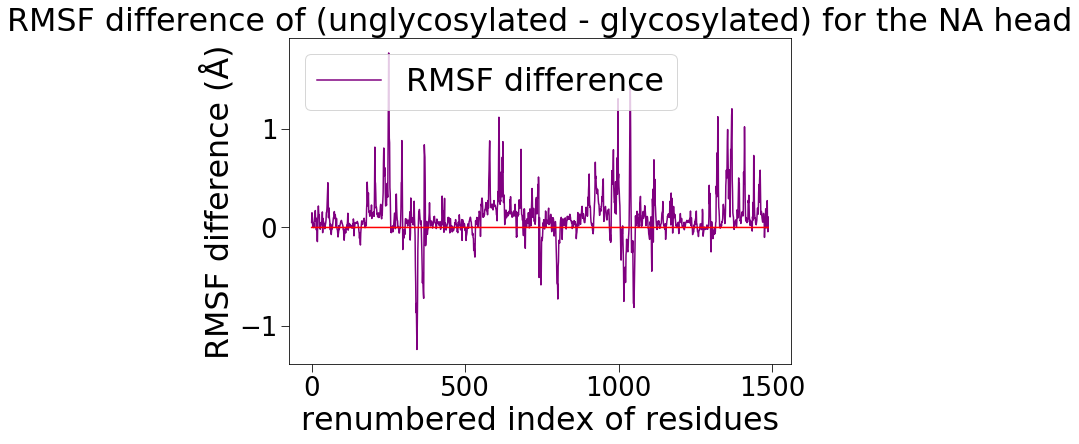

The percentage of unglycosylated residues in the head that have a higher RMSF than the corresponding glycosylated residues is 77.68817204301075 %
The area under the curve per residue is [0.10251408] Å
The average RMSF difference per residue is [0.10256671] Å


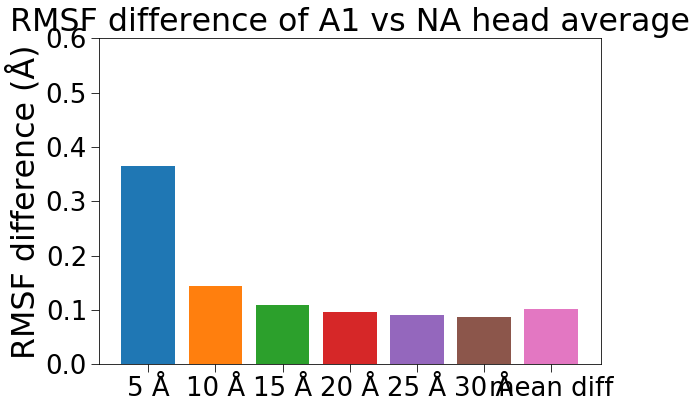

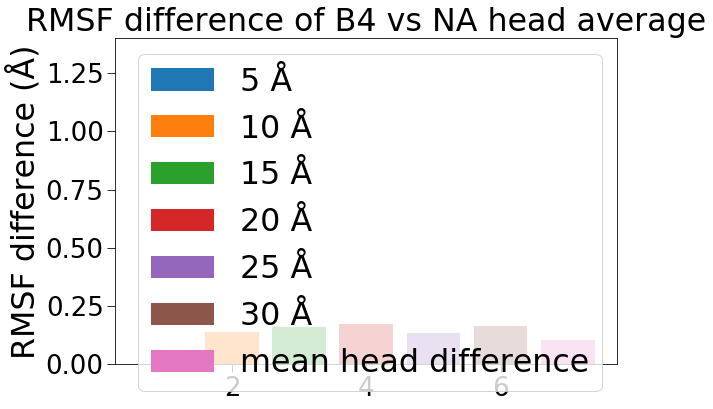

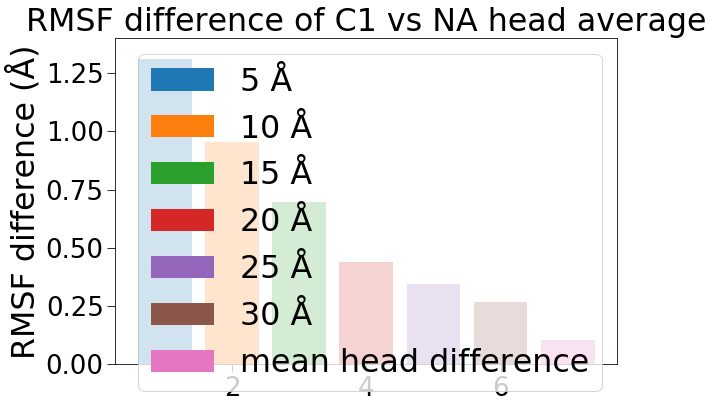

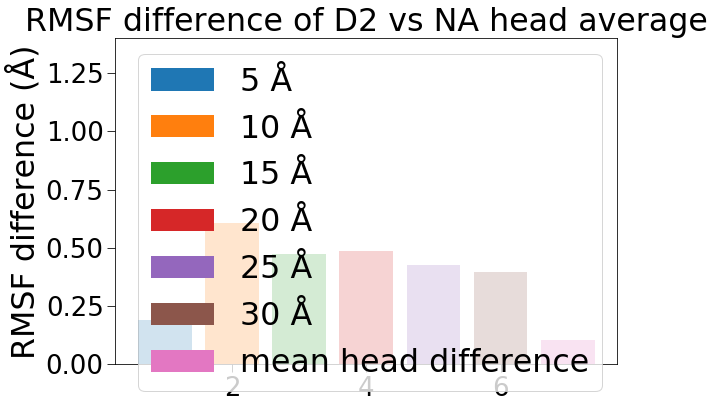

/software/repo/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:245: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
/software/repo/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:248: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
/software/repo/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:251: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
/software/repo/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:254: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since 

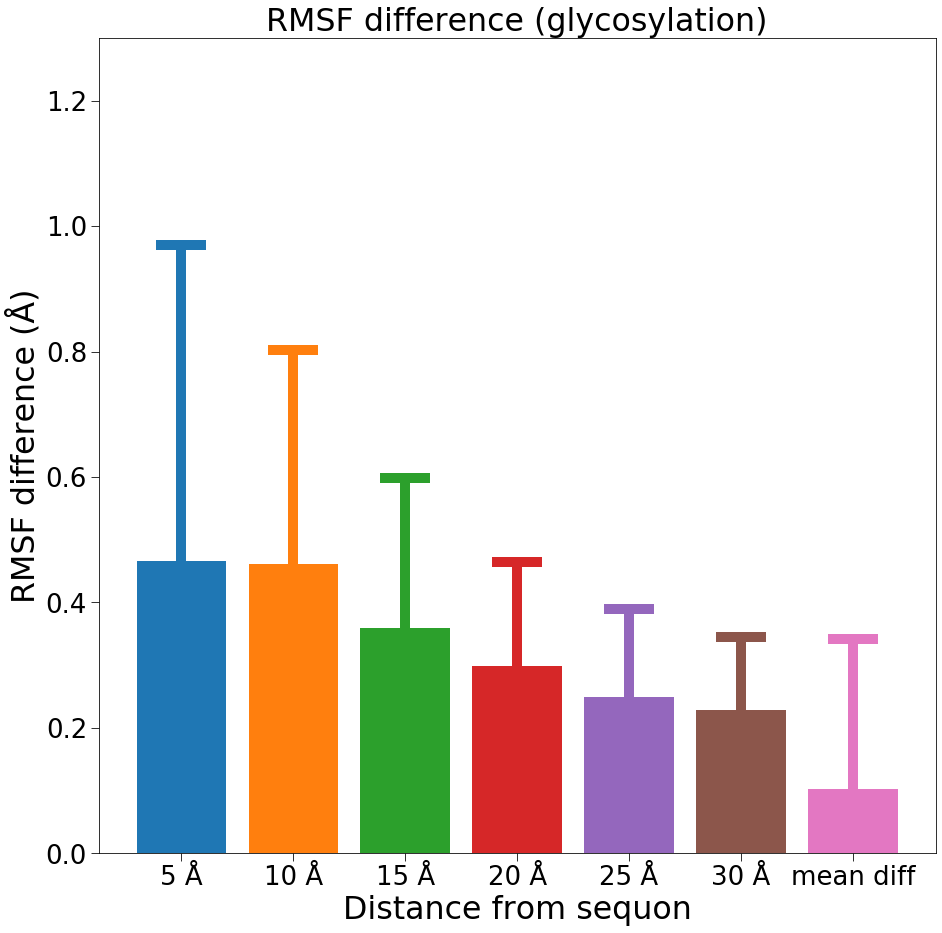

In [85]:
#RMSF difference of the whole head
diffhead = np.subtract(meanrmsfheadunglycosylated2, meanrmsfheadglycosylated2)
np.savetxt('analysis_rmsf/meandiffhead.txt', diffhead)
diffheadzero = np.full((len(diffhead), 1), 0)
plt.figure(figsize=(9,6))
plt.plot(range(len(diffhead)), diffhead, color='purple')
plt.plot(range(len(diffheadzero)), diffheadzero, color='red')
plt.legend(['RMSF difference'], loc='upper left')
plt.xlabel('renumbered index of residues')
plt.ylabel('RMSF difference (Å)')
plt.title('RMSF difference of (unglycosylated - glycosylated) for the NA head')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_head.png')
plt.show()

abovezerohead = (diffhead > 0).sum()
percenthead = np.divide(abovezerohead, len(diffhead))
print("The percentage of unglycosylated residues in the head that have a higher RMSF than the corresponding glycosylated residues is", percenthead*100, "%")

integratehead = np.trapz(diffhead, axis=0)
meanintegratehead = np.divide(integratehead, len(diffhead))
print("The area under the curve per residue is", meanintegratehead, "Å")

avgdiffhead = np.mean(diffhead, axis=0)
print("The average RMSF difference per residue is", avgdiffhead, "Å")

#A1, plot average RMSF change vs intervals away from A1 sequon
#abovezerolinehead = np.full((len(diffhead), 1), avgdiffhead)
#abovezeroline5A1 = np.full((len(diffhead), 1), avgdiffwithin5A1)
#abovezeroline10A1 = np.full((len(diffhead), 1), avgdiffwithin10A1)
#abovezeroline15A1 = np.full((len(diffhead), 1), avgdiffwithin15A1)
#abovezeroline20A1 = np.full((len(diffhead), 1), avgdiffwithin20A1)
#abovezeroline25A1 = np.full((len(diffhead), 1), avgdiffwithin25A1)
#abovezeroline30A1 = np.full((len(diffhead), 1), avgdiffwithin30A1)
#plt.figure(figsize=(9,6))
#plt.plot(range(len(abovezerolinehead)), abovezerolinehead, linewidth=5)
#plt.plot(range(len(abovezerolinehead)), abovezeroline5A1)
#plt.plot(range(len(abovezerolinehead)), abovezeroline10A1)
#plt.plot(range(len(abovezerolinehead)), abovezeroline15A1)
#plt.plot(range(len(abovezerolinehead)), abovezeroline20A1)
#plt.plot(range(len(abovezerolinehead)), abovezeroline25A1)
#plt.plot(range(len(abovezerolinehead)), abovezeroline30A1)
#plt.legend(['mean head difference', 'A1 5 Å', 'A1 10 Å', 'A1 15 Å', 'A1 20 Å', 'A1 25 Å', 'A1 30 Å'], loc='upper right')
#plt.xlabel('arbitrary units')
#plt.ylabel('RMSF difference (Å)')
#plt.title('RMSF difference of A1 vs NA head average')
#plt.savefig('analysis_rmsf/rmsf_difference_bysystem_headA1.png')
#plt.show()
plt.figure(figsize=(9,6))
plt.bar("5 Å", avgdiffwithin5A1)
plt.bar("10 Å", avgdiffwithin10A1)
plt.bar("15 Å", avgdiffwithin15A1)
plt.bar("20 Å", avgdiffwithin20A1)
plt.bar("25 Å", avgdiffwithin25A1)
plt.bar("30 Å", avgdiffwithin30A1)
plt.bar("mean diff", avgdiffhead)
plt.gca().set(title='RMSF difference of A1 vs NA head average')
plt.ylim(0, 0.6)
#plt.legend(['5 Å', '10 Å', '15 Å', '20 Å', '25 Å', '30 Å', 'mean head difference'], loc='upper right')
plt.ylabel('RMSF difference (Å)')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_headA1.png', dpi=300)
plt.show()

#B4, plot average RMSF change vs intervals away from B4 sequon
plt.figure(figsize=(9,6))
plt.bar(1, avgdiffwithin5B4)
plt.bar(2, avgdiffwithin10B4)
plt.bar(3, avgdiffwithin15B4)
plt.bar(4, avgdiffwithin20B4)
plt.bar(5, avgdiffwithin25B4)
plt.bar(6, avgdiffwithin30B4)
plt.bar(7, avgdiffhead)
plt.gca().set(title='RMSF difference of B4 vs NA head average')
plt.ylim(0, 1.4)
plt.legend(['5 Å', '10 Å', '15 Å', '20 Å', '25 Å', '30 Å', 'mean head difference'], loc='upper right')
plt.ylabel('RMSF difference (Å)')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_headB4.png', dpi=300)
plt.show()
#abovezeroline5B4 = np.full((len(diffhead), 1), avgdiffwithin5B4)
#abovezeroline10B4 = np.full((len(diffhead), 1), avgdiffwithin10B4)
#abovezeroline15B4 = np.full((len(diffhead), 1), avgdiffwithin15B4)
#abovezeroline20B4 = np.full((len(diffhead), 1), avgdiffwithin20B4)
#abovezeroline25B4 = np.full((len(diffhead), 1), avgdiffwithin25B4)
#abovezeroline30B4 = np.full((len(diffhead), 1), avgdiffwithin30B4)
#plt.figure(figsize=(9,6))
#plt.plot(range(len(abovezerolinehead)), abovezerolinehead, linewidth=5)
#plt.plot(range(len(abovezerolinehead)), abovezeroline5B4)
#plt.plot(range(len(abovezerolinehead)), abovezeroline10B4)
#plt.plot(range(len(abovezerolinehead)), abovezeroline15B4)
#plt.plot(range(len(abovezerolinehead)), abovezeroline20B4)
#plt.plot(range(len(abovezerolinehead)), abovezeroline25B4)
#plt.plot(range(len(abovezerolinehead)), abovezeroline30B4)
#plt.legend(['mean head difference', 'B4 5 Å', 'B4 10 Å', 'B4 15 Å', 'B4 20 Å', 'B4 25 Å', 'B4 30 Å'], loc='upper right')
#plt.xlabel('renumbered index of residues')
#plt.ylabel('RMSF difference (Å)')
#plt.title('RMSF difference of B4 vs NA head average')
#plt.savefig('analysis_rmsf/rmsf_difference_bysystem_headB4.png')
#plt.show()

#C1, plot average RMSF change vs intervals away from C1 sequon
plt.figure(figsize=(9,6))
plt.bar(1, avgdiffwithin5C1)
plt.bar(2, avgdiffwithin10C1)
plt.bar(3, avgdiffwithin15C1)
plt.bar(4, avgdiffwithin20C1)
plt.bar(5, avgdiffwithin25C1)
plt.bar(6, avgdiffwithin30C1)
plt.bar(7, avgdiffhead)
plt.gca().set(title='RMSF difference of C1 vs NA head average')
plt.ylim(0, 1.4)
plt.legend(['5 Å', '10 Å', '15 Å', '20 Å', '25 Å', '30 Å', 'mean head difference'], loc='upper right')
plt.ylabel('RMSF difference (Å)')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_headC1.png', dpi=300)
plt.show()
#abovezeroline5C1 = np.full((len(diffhead), 1), avgdiffwithin5C1)
#abovezeroline10C1 = np.full((len(diffhead), 1), avgdiffwithin10C1)
#abovezeroline15C1 = np.full((len(diffhead), 1), avgdiffwithin15C1)
#abovezeroline20C1 = np.full((len(diffhead), 1), avgdiffwithin20C1)
#abovezeroline25C1 = np.full((len(diffhead), 1), avgdiffwithin25C1)
#abovezeroline30C1 = np.full((len(diffhead), 1), avgdiffwithin30C1)
#plt.figure(figsize=(9,6))
#plt.plot(range(len(abovezerolinehead)), abovezerolinehead, linewidth=5)
#plt.plot(range(len(abovezerolinehead)), abovezeroline5C1)
#plt.plot(range(len(abovezerolinehead)), abovezeroline10C1)
#plt.plot(range(len(abovezerolinehead)), abovezeroline15C1)
#plt.plot(range(len(abovezerolinehead)), abovezeroline20C1)
#plt.plot(range(len(abovezerolinehead)), abovezeroline25C1)
#plt.plot(range(len(abovezerolinehead)), abovezeroline30C1)
#plt.legend(['mean head difference', 'C1 5 Å', 'C1 10 Å', 'C1 15 Å', 'C1 20 Å', 'C1 25 Å', 'C1 30 Å'], loc='upper right')
#plt.xlabel('renumbered index of residues')
#plt.ylabel('RMSF difference (Å)')
#plt.title('RMSF difference of C1 vs NA head average')
#plt.savefig('analysis_rmsf/rmsf_difference_bysystem_headC1.png')
#plt.show()

#D2, plot average RMSF change vs intervals away from D2 sequon
plt.figure(figsize=(9,6))
plt.bar(1, avgdiffwithin5D2)
plt.bar(2, avgdiffwithin10D2)
plt.bar(3, avgdiffwithin15D2)
plt.bar(4, avgdiffwithin20D2)
plt.bar(5, avgdiffwithin25D2)
plt.bar(6, avgdiffwithin30D2)
plt.bar(7, avgdiffhead)
plt.gca().set(title='RMSF difference of D2 vs NA head average')
plt.ylim(0, 1.4)
plt.legend(['5 Å', '10 Å', '15 Å', '20 Å', '25 Å', '30 Å', 'mean head difference'], loc='upper right')
plt.ylabel('RMSF difference (Å)')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_headD2.png', dpi=300)
plt.show()
#abovezeroline5D2 = np.full((len(diffhead), 1), avgdiffwithin5D2)
#abovezeroline10D2 = np.full((len(diffhead), 1), avgdiffwithin10D2)
#abovezeroline15D2 = np.full((len(diffhead), 1), avgdiffwithin15D2)
#abovezeroline20D2 = np.full((len(diffhead), 1), avgdiffwithin20D2)
#abovezeroline25D2 = np.full((len(diffhead), 1), avgdiffwithin25D2)
#abovezeroline30D2 = np.full((len(diffhead), 1), avgdiffwithin30D2)
#plt.figure(figsize=(9,6))
#plt.plot(range(len(abovezerolinehead)), abovezerolinehead, linewidth=5)
#plt.plot(range(len(abovezerolinehead)), abovezeroline5D2)
#plt.plot(range(len(abovezerolinehead)), abovezeroline10D2)
#plt.plot(range(len(abovezerolinehead)), abovezeroline15D2)
#plt.plot(range(len(abovezerolinehead)), abovezeroline20D2)
#plt.plot(range(len(abovezerolinehead)), abovezeroline25D2)
#plt.plot(range(len(abovezerolinehead)), abovezeroline30D2)
#plt.legend(['mean head difference', 'D2 5 Å', 'D2 10 Å', 'D2 15 Å', 'D2 20 Å', 'D2 25 Å', 'D2 30 Å'], loc='upper right')
#plt.xlabel('renumbered index of residues')
#plt.ylabel('RMSF difference (Å)')
#plt.title('RMSF difference of D2 vs NA head average')
#plt.savefig('analysis_rmsf/rmsf_difference_bysystem_headD2.png')
#plt.show()

#average the sequons
arraydiffwithin5 = np.array([[avgdiffwithin5A1], [avgdiffwithin5B4], [avgdiffwithin5C1], [avgdiffwithin5D2]])
arraydiffwithin10 = np.array([[avgdiffwithin10A1], [avgdiffwithin10B4], [avgdiffwithin10C1], [avgdiffwithin10D2]])
arraydiffwithin15 = np.array([[avgdiffwithin15A1], [avgdiffwithin15B4], [avgdiffwithin15C1], [avgdiffwithin15D2]])
arraydiffwithin20 = np.array([[avgdiffwithin20A1], [avgdiffwithin20B4], [avgdiffwithin20C1], [avgdiffwithin20D2]])
arraydiffwithin25 = np.array([[avgdiffwithin25A1], [avgdiffwithin25B4], [avgdiffwithin25C1], [avgdiffwithin25D2]])
arraydiffwithin30 = np.array([[avgdiffwithin30A1], [avgdiffwithin30B4], [avgdiffwithin30C1], [avgdiffwithin30D2]])
meandiffwithin5 = np.mean(arraydiffwithin5, axis=0)
meandiffwithin10 = np.mean(arraydiffwithin10, axis=0)
meandiffwithin15 = np.mean(arraydiffwithin15, axis=0)
meandiffwithin20 = np.mean(arraydiffwithin20, axis=0)
meandiffwithin25 = np.mean(arraydiffwithin25, axis=0)
meandiffwithin30 = np.mean(arraydiffwithin30, axis=0)
meandiffwithin5 = np.reshape(meandiffwithin5, (-1, 1))
meandiffwithin10 = np.reshape(meandiffwithin10, (-1, 1))
meandiffwithin15 = np.reshape(meandiffwithin15, (-1, 1))
meandiffwithin20 = np.reshape(meandiffwithin20, (-1, 1))
meandiffwithin25 = np.reshape(meandiffwithin25, (-1, 1))
meandiffwithin30 = np.reshape(meandiffwithin30, (-1, 1))
meandiffwithin5 = meandiffwithin5.flatten()
meandiffwithin10 = meandiffwithin10.flatten()
meandiffwithin15 = meandiffwithin15.flatten()
meandiffwithin20 = meandiffwithin20.flatten()
meandiffwithin25 = meandiffwithin25.flatten()
meandiffwithin30 = meandiffwithin30.flatten()

stddiffhead = np.std(diffhead, axis=0)
stdplusdiffhead = avgdiffhead + stddiffhead
stdplusdiffhead = stdplusdiffhead.flatten()
stdminusdiffhead = avgdiffhead - stddiffhead
stdminusdiffhead = stdminusdiffhead.flatten()
stddiffwithin5 = np.std(arraydiffwithin5, axis=0)
stdplusdiffwithin5 = meandiffwithin5 + stddiffwithin5
stdplusdiffwithin5 = stdplusdiffwithin5.flatten()
stdminusdiffwithin5 = meandiffwithin5 - stddiffwithin5
stdminusdiffwithin5 = stdminusdiffwithin5.flatten()
stddiffwithin10 = np.std(arraydiffwithin10, axis=0)
stdplusdiffwithin10 = meandiffwithin10 + stddiffwithin10
stdplusdiffwithin10 = stdplusdiffwithin10.flatten()
stdminusdiffwithin10 = meandiffwithin10 - stddiffwithin10
stdminusdiffwithin10 = stdminusdiffwithin10.flatten()
stddiffwithin15 = np.std(arraydiffwithin15, axis=0)
stdplusdiffwithin15 = meandiffwithin15 + stddiffwithin15
stdplusdiffwithin15 = stdplusdiffwithin15.flatten()
stdminusdiffwithin15 = meandiffwithin15 - stddiffwithin15
stdminusdiffwithin15 = stdminusdiffwithin15.flatten()
stddiffwithin20 = np.std(arraydiffwithin20, axis=0)
stdplusdiffwithin20 = meandiffwithin20 + stddiffwithin20
stdplusdiffwithin20 = stdplusdiffwithin20.flatten()
stdminusdiffwithin20 = meandiffwithin20 - stddiffwithin20
stdminusdiffwithin20 = stdminusdiffwithin20.flatten()
stddiffwithin25 = np.std(arraydiffwithin25, axis=0)
stdplusdiffwithin25 = meandiffwithin25 + stddiffwithin25
stdplusdiffwithin25 = stdplusdiffwithin25.flatten()
stdminusdiffwithin25 = meandiffwithin25 - stddiffwithin25
stdminusdiffwithin25 = stdminusdiffwithin25.flatten()
stddiffwithin30 = np.std(arraydiffwithin30, axis=0)
stdplusdiffwithin30 = meandiffwithin30 + stddiffwithin30
stdplusdiffwithin30 = stdplusdiffwithin30.flatten()
stdminusdiffwithin30 = meandiffwithin30 - stddiffwithin30
stdminusdiffwithin30 = stdminusdiffwithin30.flatten()

x = np.arange(0, 5)
plt.figure()
plt.rc('xtick', labelsize=26)
plt.rc('ytick', labelsize=26)
plt.rcParams.update({'font.size': 22})
plt.bar("5 Å", meandiffwithin5)
plt.bar("10 Å", meandiffwithin10)
plt.bar("15 Å", meandiffwithin15)
plt.bar("20 Å", meandiffwithin20)
plt.bar("25 Å", meandiffwithin25)
plt.bar("30 Å", meandiffwithin30)
plt.bar("mean diff", avgdiffhead)
(_, caplines, _,) = plt.errorbar(0, meandiffwithin5, yerr=stddiffwithin5, elinewidth=10, markeredgewidth='10', lolims=True)
caplines[0].set_marker('_')
caplines[0].set_markersize(50)
(_, caplines, _,) = plt.errorbar(1, meandiffwithin10, yerr=stddiffwithin10, elinewidth=10, markeredgewidth='10', lolims=True)
caplines[0].set_marker('_')
caplines[0].set_markersize(50)
(_, caplines, _,) = plt.errorbar(2, meandiffwithin15, yerr=stddiffwithin15, elinewidth=10, markeredgewidth='10', lolims=True)
caplines[0].set_marker('_')
caplines[0].set_markersize(50)
(_, caplines, _,) = plt.errorbar(3, meandiffwithin20, yerr=stddiffwithin20, elinewidth=10, markeredgewidth='10', lolims=True)
caplines[0].set_marker('_')
caplines[0].set_markersize(50)
(_, caplines, _,) = plt.errorbar(4, meandiffwithin25, yerr=stddiffwithin25, elinewidth=10, markeredgewidth='10', lolims=True)
caplines[0].set_marker('_')
caplines[0].set_markersize(50)
(_, caplines, _,) = plt.errorbar(5, meandiffwithin30, yerr=stddiffwithin30, elinewidth=10, markeredgewidth='10', lolims=True)
caplines[0].set_marker('_')
caplines[0].set_markersize(50)
(_, caplines, _,) = plt.errorbar(6, avgdiffhead, yerr=stddiffhead, elinewidth=10, markeredgewidth='10', lolims=True)
caplines[0].set_marker('_')
caplines[0].set_markersize(50)
plt.gca().set(title='RMSF difference (glycosylation)')
plt.ylim(0, 1.3)
#plt.legend(['5 Å', '10 Å', '15 Å', '20 Å', '25 Å', '30 Å', 'mean head difference'], loc='upper right')
plt.xlabel('Distance from sequon')
plt.ylabel('RMSF difference (Å)')
plt.savefig('analysis_rmsf/rmsf_difference_bysystem_headaverage.png', dpi=300)
plt.show()
#arrayabovezeroline5 = np.array([[abovezeroline5A1], [abovezeroline5B4], [abovezeroline5C1], [abovezeroline5D2]])
#arrayabovezeroline10 = np.array([[abovezeroline10A1], [abovezeroline10B4], [abovezeroline10C1], [abovezeroline10D2]])
#arrayabovezeroline15 = np.array([[abovezeroline15A1], [abovezeroline15B4], [abovezeroline15C1], [abovezeroline15D2]])
#arrayabovezeroline20 = np.array([[abovezeroline20A1], [abovezeroline20B4], [abovezeroline20C1], [abovezeroline20D2]])
#arrayabovezeroline25 = np.array([[abovezeroline25A1], [abovezeroline25B4], [abovezeroline25C1], [abovezeroline25D2]])
#arrayabovezeroline30 = np.array([[abovezeroline30A1], [abovezeroline30B4], [abovezeroline30C1], [abovezeroline30D2]])
#meanabovezeroline5 = np.mean(arrayabovezeroline5, axis=0)
#meanabovezeroline10 = np.mean(arrayabovezeroline10, axis=0)
#meanabovezeroline15 = np.mean(arrayabovezeroline15, axis=0)
#meanabovezeroline20 = np.mean(arrayabovezeroline20, axis=0)
#meanabovezeroline25 = np.mean(arrayabovezeroline25, axis=0)
#meanabovezeroline30 = np.mean(arrayabovezeroline30, axis=0)
#meanabovezeroline5 = np.reshape(meanabovezeroline5, (-1, 1))
#meanabovezeroline10 = np.reshape(meanabovezeroline10, (-1, 1))
#meanabovezeroline15 = np.reshape(meanabovezeroline15, (-1, 1))
#meanabovezeroline20 = np.reshape(meanabovezeroline20, (-1, 1))
#meanabovezeroline25 = np.reshape(meanabovezeroline25, (-1, 1))
#meanabovezeroline30 = np.reshape(meanabovezeroline30, (-1, 1))
#abovezeroline5 = np.full((len(diffhead), 1), meanabovezeroline5)
#abovezeroline10 = np.full((len(diffhead), 1), meanabovezeroline10)
#abovezeroline15 = np.full((len(diffhead), 1), meanabovezeroline15)
#abovezeroline20 = np.full((len(diffhead), 1), meanabovezeroline20)
#abovezeroline25 = np.full((len(diffhead), 1), meanabovezeroline25)
#abovezeroline30 = np.full((len(diffhead), 1), meanabovezeroline30)
#plt.figure(figsize=(9,6))
#plt.plot(range(len(abovezerolinehead)), abovezerolinehead, linewidth=5)
#plt.plot(range(len(abovezerolinehead)), abovezeroline5)
#plt.plot(range(len(abovezerolinehead)), abovezeroline10)
#plt.plot(range(len(abovezerolinehead)), abovezeroline15)
#plt.plot(range(len(abovezerolinehead)), abovezeroline20)
#plt.plot(range(len(abovezerolinehead)), abovezeroline25)
#plt.plot(range(len(abovezerolinehead)), abovezeroline30)
#plt.legend(['mean head difference', '5 Å', '10 Å', '15 Å', '20 Å', '25 Å', '30 Å'], loc='upper right')
#plt.xlabel('renumbered index of residues')
#plt.ylabel('RMSF difference (Å)')
#plt.title('RMSF difference vs NA head average')
#plt.savefig('analysis_rmsf/rmsf_difference_bysystem_headaverage.png')
#plt.show()

# Head tilt

In [68]:
#load in the tilt angles
tiltangleglycosylatedrep1 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/partial_glycosylation/trajectories/replicate1/no_lipids/headtilt_angle.dat')
tiltangleglycosylatedrep2 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/partial_glycosylation/trajectories/replicate2/no_lipids/headtilt_angle.dat')
tiltangleglycosylatedrep3 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/partial_glycosylation/trajectories/replicate3/no_lipids/headtilt_angle.dat')
tiltangleunglycosylatedrep1 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/no_glycosylation/replicate1/no_lipids/headtilt_angle.dat')
tiltangleunglycosylatedrep2 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/no_glycosylation/replicate2/no_lipids/headtilt_angle.dat')
tiltangleunglycosylatedrep3 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/no_glycosylation/replicate3/no_lipids/headtilt_angle.dat')
tiltanglevirion = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/whole_virion/headtilt_angle.dat')
tiltanglejacob1 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/from_jacob/headtilt1_angle.dat')
tiltanglejacob2 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/from_jacob/headtilt2_angle.dat')
tiltanglejacob3 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/from_jacob/headtilt3_angle.dat')
tiltanglejacob4 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/from_jacob/headtilt4_angle.dat')
tiltanglejacob5 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/from_jacob/headtilt5_angle.dat')
#load in the tilt times
tilttimeglycosylatedrep1 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/partial_glycosylation/trajectories/replicate1/no_lipids/headtilt_time.dat')
tilttimeglycosylatedrep2 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/partial_glycosylation/trajectories/replicate2/no_lipids/headtilt_time.dat')
tilttimeglycosylatedrep3 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/partial_glycosylation/trajectories/replicate3/no_lipids/headtilt_time.dat')
tilttimeunglycosylatedrep1 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/no_glycosylation/replicate1/no_lipids/headtilt_time.dat')
tilttimeunglycosylatedrep2 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/no_glycosylation/replicate2/no_lipids/headtilt_time.dat')
tilttimeunglycosylatedrep3 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/no_glycosylation/replicate3/no_lipids/headtilt_time.dat')
tilttimevirion = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/whole_virion/headtilt_time.dat')
tilttimejacob1 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/from_jacob/headtilt1_time.dat')
tilttimejacob2 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/from_jacob/headtilt2_time.dat')
tilttimejacob3 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/from_jacob/headtilt3_time.dat')
tilttimejacob4 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/from_jacob/headtilt4_time.dat')
tilttimejacob5 = np.loadtxt('/net/gpfs-amarolab/cseitz/from_jam/projects/influenza/neuraminidase/md/2009/from_jacob/headtilt5_time.dat')

In [87]:
print(len(meantiltjacob))
print(len(tilttimejacob1))

1001
1001


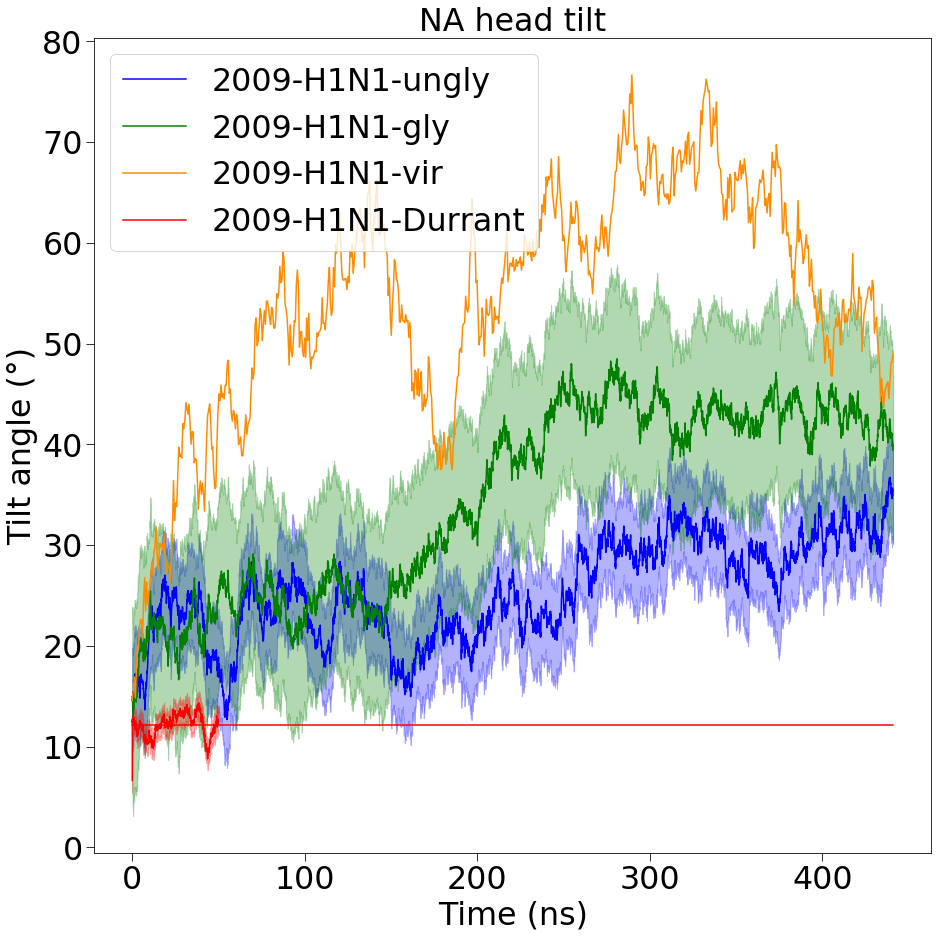

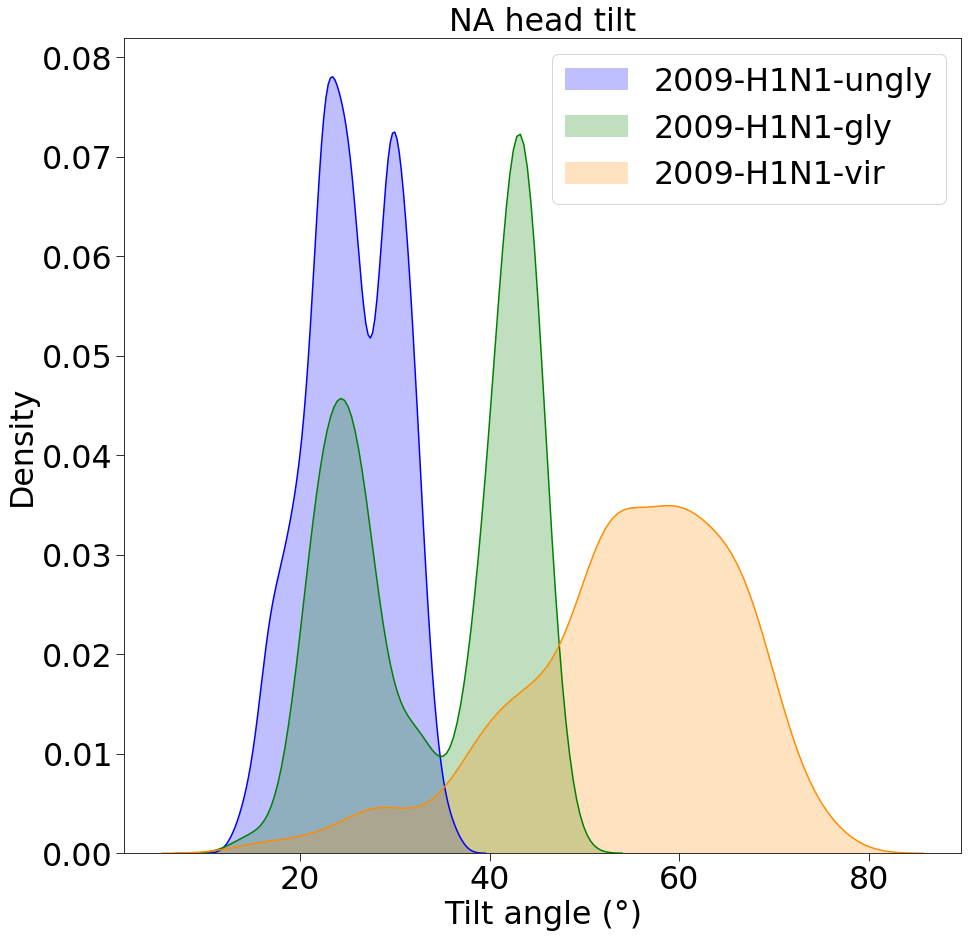

In [97]:
#plot the head tilt
x = np.arange(0, 441.1, 0.1)
y = np.arange(0, 441.2, 0.1)
z = np.arange(0, 50.05, 0.05)
arraytiltglycosylated = np.array([[tiltangleglycosylatedrep1], [tiltangleglycosylatedrep2], [tiltangleglycosylatedrep3]])
arraytiltunglycosylated = np.array([[tiltangleunglycosylatedrep1], [tiltangleunglycosylatedrep2], [tiltangleunglycosylatedrep3]])
arraytiltjacob = np.array([[tiltanglejacob1], [tiltanglejacob2], [tiltanglejacob3], [tiltanglejacob4], [tiltanglejacob5]])
meantiltglycosylated = np.mean(arraytiltglycosylated, axis=0)
meantiltunglycosylated = np.mean(arraytiltunglycosylated, axis=0)
meantiltjacob = np.mean(arraytiltjacob, axis=0)
meantiltglycosylated = np.reshape(meantiltglycosylated, (-1, 1))
meantiltunglycosylated = np.reshape(meantiltunglycosylated, (-1, 1))
meantiltjacob = np.reshape(meantiltjacob, (-1, 1))
averagetiltjacob = np.average(arraytiltjacob)
stdtiltglycosylated = np.std(meantiltglycosylated, axis=0)
stdplustiltglycosylated = meantiltglycosylated + stdtiltglycosylated
stdplustiltglycosylated = stdplustiltglycosylated.flatten()
stdminustiltglycosylated = meantiltglycosylated - stdtiltglycosylated
stdminustiltglycosylated = stdminustiltglycosylated.flatten()
stdtiltunglycosylated = np.std(meantiltunglycosylated, axis=0)
stdplustiltunglycosylated = meantiltunglycosylated + stdtiltunglycosylated
stdplustiltunglycosylated = stdplustiltunglycosylated.flatten()
stdminustiltunglycosylated = meantiltunglycosylated - stdtiltunglycosylated
stdminustiltunglycosylated = stdminustiltunglycosylated.flatten()
stdtiltjacob = np.std(meantiltjacob, axis=0)
stdplustiltjacob = meantiltjacob + stdtiltjacob
stdplustiltjacob = stdplustiltjacob.flatten()
stdminustiltjacob = meantiltjacob - stdtiltjacob
stdminustiltjacob = stdminustiltjacob.flatten()
#maxtiltjacob = np.max(arraytiltjacob)
#mintiltjacob = np.min(arraytiltjacob)

#bindingdistance = np.full((len(minvaluearrayC19)), 4)
plt.figure()
averagejacob = np.full((len(tilttimevirion)), averagetiltjacob)
#maxjacob = np.full((len(tilttimevirion)), maxtiltjacob)
#minjacob = np.full((len(tilttimevirion)), mintiltjacob)
plt.plot((tilttimeunglycosylatedrep1), meantiltunglycosylated, color='blue')
plt.fill_between(x, stdplustiltunglycosylated, stdminustiltunglycosylated, color='blue', alpha=0.3)
plt.plot((tilttimeglycosylatedrep1), meantiltglycosylated, color='green')
plt.fill_between(y, stdplustiltglycosylated, stdminustiltglycosylated, color='green', alpha=0.3)
plt.plot((tilttimevirion), tiltanglevirion, color='darkorange')
#plt.plot((tilttimevirion), maxjacob, color='maroon')
plt.plot((tilttimevirion), averagejacob, color='red')
#plt.plot((tilttimevirion), minjacob, color='pink')
plt.plot((tilttimejacob1), meantiltjacob, color='red')
plt.fill_between(z, stdplustiltjacob, stdminustiltjacob, color='red', alpha=0.3)
plt.xlabel('Time (ns)')
plt.ylabel('Tilt angle (°)')
plt.title('NA head tilt')
plt.legend(['2009-H1N1-ungly', '2009-H1N1-gly', '2009-H1N1-vir', '2009-H1N1-Durrant'], loc='upper left')
plt.savefig('analysis_tilt/tilt_averaged_bysystem.png', dpi=300)
plt.show()

#meanrglycosylatedflattened = meanrmsdstalkunglycosylated.flatten()
#meanrmsdstalkglycosylatedflattened = meanrmsdstalkglycosylated.flatten()
#rmsdstalkvirionflattened = rmsdstalkvirion.flatten()
meantiltunglycosylatedflattened = meantiltunglycosylated.flatten()
meantiltglycosylatedflattened = meantiltglycosylated.flatten()
tiltanglevirionflattened = tiltanglevirion.flatten()
sns.kdeplot(meantiltunglycosylatedflattened, color='blue', shade=True)
sns.kdeplot(meantiltglycosylatedflattened, color='green', shade=True)
sns.kdeplot(tiltanglevirionflattened, color='darkorange', shade=True)
plt.legend(['2009-H1N1-ungly', '2009-H1N1-gly', '2009-H1N1-vir'], loc='upper right')
plt.xlabel('Tilt angle (°)')
plt.ylabel('Density')
plt.title('NA head tilt')
plt.savefig('analysis_tilt/tilt_averaged_bysystem_density.png')
plt.show()

#by replicate
#plt.figure(figsize=(9,6))
#plt.plot((tilttimeglycosylatedrep1), tiltangleglycosylatedrep1, color='skyblue')
#plt.plot((tilttimeglycosylatedrep2), tiltangleglycosylatedrep2, color='yellow')
#plt.plot((tilttimeglycosylatedrep3), tiltangleglycosylatedrep3, color='lime')
#plt.plot((tilttimeunglycosylatedrep1), tiltangleunglycosylatedrep1, color='black')
#plt.plot((tilttimeunglycosylatedrep2), tiltangleunglycosylatedrep2, color='maroon')
#plt.plot((tilttimeunglycosylatedrep3), tiltangleunglycosylatedrep3, color='navy')
#plt.plot((tilttimevirion), tiltanglevirion, color='darkorange')
#plt.plot((tilttimejacob1), meantiltjacob, color='red')
#plt.xlabel('time in [ns]')
#plt.ylabel('tilt angle in degrees')
#plt.title('head tilt by replicate')
#plt.legend(['glycosylated rep1', 'glycosylated rep2', 'glycosylated rep3', 'unglycosylated rep1', 'unglycosylated rep2', 'unglycosylated rep3', 'virion', 'jacob'], loc='upper left')
#plt.savefig('analysis_tilt/tilt_averaged_byreplicate.png', dpi=300)
#plt.show()

#jacob's data
#plt.figure(figsize=(9,6))
#plt.plot((tilttimejacob1), tiltanglejacob1)
#plt.plot((tilttimejacob2), tiltanglejacob2)
#plt.plot((tilttimejacob3), tiltanglejacob3)
#plt.plot((tilttimejacob4), tiltanglejacob4)
#plt.plot((tilttimejacob5), tiltanglejacob5)
#plt.xlabel('time in [ns]')
#plt.ylabel('tilt angle in degrees')
#plt.title('Jacobs head tilt by replicate')
#plt.legend(['rep 1', 'rep 2', 'rep 3', 'rep 4', 'rep 5'], loc='upper left')
#plt.savefig('analysis_tilt/tilt_jacob_byreplicate.png', dpi=300)
#plt.show()